In [1]:
from mxnet import nd, autograd, gluon
from mxnet.gluon import nn, rnn
import mxnet as mx
import datetime
import seaborn as sns
import time

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

import math


from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score


# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, MultiTaskLassoCV, LassoLarsCV, LassoLarsIC 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

# Other packages
import numpy as np
import pandas as pd
import re
import scipy as sp
import xgboost as xgb
import matplotlib.pyplot as plt
from numpy import concatenate
from pandas import DataFrame, Series, read_csv, scatter_matrix

import warnings
warnings.filterwarnings("ignore")

import quandl
quandl.ApiConfig.api_key = '4rXnmHqzy9AuBuWVdy9e'
quandl.ApiConfig.api_version = '2015-04-09'

In [2]:
Activision_Blizzard = quandl.get("WIKI/ATVI",start_date="2013-12-31", end_date="2018-12-31") #Communication Services
Alphabet_Inc_Class_C = quandl.get("WIKI/GOOG",start_date="2013-12-31", end_date="2018-12-31")
Alphabet_Inc_Class_A = quandl.get("WIKI/GOOGL",start_date="2013-12-31", end_date="2018-12-31")
ATT  = quandl.get("WIKI/T",start_date="2013-12-31", end_date="2018-12-31")
CBS = quandl.get("WIKI/CBS",start_date="2013-12-31", end_date="2018-12-31")
CenturyLink = quandl.get("WIKI/CTL",start_date="2013-12-31", end_date="2018-12-31")
Charter_Communications = quandl.get("WIKI/CHTR",start_date="2013-12-31", end_date="2018-12-31")
Comcast = quandl.get("WIKI/CMCSA",start_date="2013-12-31", end_date="2018-12-31")
Discovery_Class_A = quandl.get("WIKI/DISCA",start_date="2013-12-31", end_date="2018-12-31")
Discovery_Class_C = quandl.get("WIKI/DISCK",start_date="2013-12-31", end_date="2018-12-31")


#indexing

CBS.reset_index(inplace=True)
Activision_Blizzard.reset_index(inplace=True)
Alphabet_Inc_Class_C.reset_index(inplace=True)
Alphabet_Inc_Class_A.reset_index(inplace=True)
ATT.reset_index(inplace=True)
CenturyLink.reset_index(inplace=True)
Charter_Communications.reset_index(inplace=True)
Comcast.reset_index(inplace=True)
Discovery_Class_A.reset_index(inplace=True)
Discovery_Class_C.reset_index(inplace=True)

#Data Management
Activision_Blizzard = Activision_Blizzard [['Date','Open','Close']]
Activision_Blizzard.rename(columns={'Open': 'Activision_Blizzard_Open'},inplace=True)
Activision_Blizzard.rename(columns={'Close': 'Activision_Blizzard_Close'},inplace=True)

CBS = CBS [['Date','Open','Close']]
CBS.rename(columns={'Open': 'CBS_Open'},inplace=True)
CBS.rename(columns={'Close': 'CBS_Close'},inplace=True)

Alphabet_Inc_Class_C = Alphabet_Inc_Class_C [['Date','Open','Close']]
Alphabet_Inc_Class_C.rename(columns={'Open': 'Alphabet_Inc_Class_C_Open'},inplace=True)
Alphabet_Inc_Class_C.rename(columns={'Close': 'Alphabet_Inc_Class_C_Close'},inplace=True)

Alphabet_Inc_Class_A = Alphabet_Inc_Class_A [['Date','Open','Close']]
Alphabet_Inc_Class_A.rename(columns={'Open': 'Alphabet_Inc_Class_A_Open'},inplace=True)
Alphabet_Inc_Class_A.rename(columns={'Close': 'Alphabet_Inc_Class_A_Close'},inplace=True)

ATT = ATT [['Date','Open','Close']]
ATT.rename(columns={'Open': 'ATT_Open'},inplace=True)
ATT.rename(columns={'Close': 'ATT_Close'},inplace=True)

CenturyLink = CenturyLink [['Date','Open','Close']]
CenturyLink.rename(columns={'Open': 'CenturyLink_Open'},inplace=True)
CenturyLink.rename(columns={'Close': 'CenturyLink_Close'},inplace=True)

Charter_Communications = Charter_Communications [['Date','Open','Close']]
Charter_Communications.rename(columns={'Open': 'Charter_Communications_Open'},inplace=True)
Charter_Communications.rename(columns={'Close': 'Charter_Communications_Close'},inplace=True)


Comcast = Comcast [['Date','Open','Close']]
Comcast.rename(columns={'Open': 'Comcast_Open'},inplace=True)
Comcast.rename(columns={'Close': 'Comcast_Close'},inplace=True)


Discovery_Class_A = Discovery_Class_A [['Date','Open','Close']]
Discovery_Class_A.rename(columns={'Open': 'Discovery_Class_A_Open'},inplace=True)
Discovery_Class_A.rename(columns={'Close': 'Discovery_Class_A_Close'},inplace=True)


Discovery_Class_C = Discovery_Class_C [['Date','Open','Close']]
Discovery_Class_C.rename(columns={'Open': 'Discovery_Class_C_Open'},inplace=True)
Discovery_Class_C.rename(columns={'Close': 'Discovery_Class_C_Close'},inplace=True)



In [7]:

Communication_Services = pd.concat([Activision_Blizzard, CBS[['CBS_Open','CBS_Close']], Alphabet_Inc_Class_C[['Alphabet_Inc_Class_C_Open', 'Alphabet_Inc_Class_C_Close']], Alphabet_Inc_Class_A[['Alphabet_Inc_Class_A_Open','Alphabet_Inc_Class_A_Close']],ATT[['ATT_Open','ATT_Close']],CenturyLink[['CenturyLink_Open','CenturyLink_Close']],Charter_Communications[['Charter_Communications_Open','Charter_Communications_Close']],Comcast[['Comcast_Open','Comcast_Close']],Discovery_Class_A[['Discovery_Class_A_Open','Discovery_Class_A_Close']],Discovery_Class_C[['Discovery_Class_C_Open','Discovery_Class_C_Close']],Dish[['Dish_Open','Dish_Close']],Electronic_Arts[['Electronic_Arts_Open','Electronic_Arts_Close']],Facebook[['Facebook_Open','Facebook_Close']],Interpublic_Group[['Interpublic_Group_Open','Interpublic_Group_Close']],Netflix[['Netflix_Open','Netflix_Close']],News_Corp_Class_A[['News_Corp_Class_A_Open','News_Corp_Class_A_Close']], News_Corp_Class_B[['News_Corp_Class_B_Open','News_Corp_Class_B_Close']],Omnicom_Group[['Omnicom_Group_Open','Omnicom_Group_Close']],Take_Two_Interactive[['Take_Two_Interactive_Open','Take_Two_Interactive_Close']],Twitter[['Twitter_Open','Twitter_Close']],
                             TripAdvisor[['TripAdvisor_Open','TripAdvisor_Close']],TwentyFirst_Century_Fox_B[['TwentyFirst_Century_Fox_B_Open','TwentyFirst_Century_Fox_B_Close']], TwentyFirst_Century_Fox_A[['TwentyFirst_Century_Fox_A_Open','TwentyFirst_Century_Fox_A_Close']],Verizon_Communications[['Verizon_Communications_Open','Verizon_Communications_Close']],Viacom[['Viacom_Open','Viacom_Close']],The_Walt_Disney[['The_Walt_Disney_Open','The_Walt_Disney_Close']]],axis=1)


Communication_Services

NameError: name 'pd' is not defined

In [23]:
Dish = quandl.get("WIKI/DISH",start_date="2013-12-31", end_date="2018-12-31") #Communication Services
Electronic_Arts = quandl.get("WIKI/EA",start_date="2013-12-31", end_date="2018-12-31")
Facebook = quandl.get("WIKI/FB",start_date="2013-12-31", end_date="2018-12-31")
Interpublic_Group = quandl.get("WIKI/IPG",start_date="2013-12-31", end_date="2018-12-31")
Netflix = quandl.get("WIKI/NFLX",start_date="2013-12-31", end_date="2018-12-31")
News_Corp_Class_A = quandl.get("WIKI/NWSA",start_date="2013-12-31", end_date="2018-12-31")
News_Corp_Class_B = quandl.get("WIKI/NWS",start_date="2013-12-31", end_date="2018-12-31")
Omnicom_Group = quandl.get("WIKI/OMC",start_date="2013-12-31", end_date="2018-12-31")
Take_Two_Interactive = quandl.get("WIKI/TTWO",start_date="2013-12-31", end_date="2018-12-31")
Twitter = quandl.get("WIKI/TWTR",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Dish.reset_index(inplace=True) ##Communication Services
Electronic_Arts.reset_index(inplace=True)
Facebook.reset_index(inplace=True)
Interpublic_Group.reset_index(inplace=True)
Netflix.reset_index(inplace=True)
News_Corp_Class_A.reset_index(inplace=True)
News_Corp_Class_B.reset_index(inplace=True)
Omnicom_Group.reset_index(inplace=True)
Take_Two_Interactive.reset_index(inplace=True)
Twitter.reset_index(inplace=True)

#Data Management
Dish = Dish [['Date','Open','Close']]
Dish.rename(columns={'Open': 'Dish_Open'},inplace=True)
Dish.rename(columns={'Close': 'Dish_Close'},inplace=True)


Electronic_Arts = Electronic_Arts [['Date','Open','Close']]
Electronic_Arts.rename(columns={'Open': 'Electronic_Arts_Open'},inplace=True)
Electronic_Arts.rename(columns={'Close': 'Electronic_Arts_Close'},inplace=True)

Facebook = Facebook [['Date','Open','Close']]
Facebook.rename(columns={'Open': 'Facebook_Open'},inplace=True)
Facebook.rename(columns={'Close': 'Facebook_Close'},inplace=True)

Interpublic_Group = Interpublic_Group [['Date','Open','Close']]
Interpublic_Group.rename(columns={'Open': 'Interpublic_Group_Open'},inplace=True)
Interpublic_Group.rename(columns={'Close': 'Interpublic_Group_Close'},inplace=True)

Netflix = Netflix [['Date','Open','Close']]
Netflix.rename(columns={'Open': 'Netflix_Open'},inplace=True)
Netflix.rename(columns={'Close': 'Netflix_Close'},inplace=True)

News_Corp_Class_A = News_Corp_Class_A [['Date','Open','Close']]
News_Corp_Class_A.rename(columns={'Open': 'News_Corp_Class_A_Open'},inplace=True)
News_Corp_Class_A.rename(columns={'Close': 'News_Corp_Class_A_Close'},inplace=True)

News_Corp_Class_B = News_Corp_Class_B [['Date','Open','Close']]
News_Corp_Class_B.rename(columns={'Open': 'News_Corp_Class_B_Open'},inplace=True)
News_Corp_Class_B.rename(columns={'Close': 'News_Corp_Class_B_Close'},inplace=True)

Omnicom_Group = Omnicom_Group [['Date','Open','Close']]
Omnicom_Group.rename(columns={'Open': 'Omnicom_Group_Open'},inplace=True)
Omnicom_Group.rename(columns={'Close': 'Omnicom_Group_Close'},inplace=True)


Take_Two_Interactive = Take_Two_Interactive [['Date','Open','Close']]
Take_Two_Interactive.rename(columns={'Open': 'Take_Two_Interactive_Open'},inplace=True)
Take_Two_Interactive.rename(columns={'Close': 'Take_Two_Interactive_Close'},inplace=True)


Twitter = Twitter [['Date','Open','Close']]
Twitter.rename(columns={'Open': 'Twitter_Open'},inplace=True)
Twitter.rename(columns={'Close': 'Twitter_Close'},inplace=True)




In [24]:
TripAdvisor = quandl.get("WIKI/TRIP",start_date="2013-12-31", end_date="2018-12-31") #Communication Services
TwentyFirst_Century_Fox_A  = quandl.get("WIKI/FOXA",start_date="2013-12-31", end_date="2018-12-31")
TwentyFirst_Century_Fox_B  = quandl.get("WIKI/FOX",start_date="2013-12-31", end_date="2018-12-31")
Verizon_Communications = quandl.get("WIKI/VZ",start_date="2013-12-31", end_date="2018-12-31")
Viacom  = quandl.get("WIKI/VIAB",start_date="2013-12-31", end_date="2018-12-31")
The_Walt_Disney = quandl.get("WIKI/DIS",start_date="2013-12-31", end_date="2018-12-31")




#indexing
TripAdvisor.reset_index(inplace=True)
TwentyFirst_Century_Fox_B.reset_index(inplace=True)
TwentyFirst_Century_Fox_A.reset_index(inplace=True)
Verizon_Communications.reset_index(inplace=True)
Viacom.reset_index(inplace=True)
The_Walt_Disney.reset_index(inplace=True)

#Data Management
TripAdvisor = TripAdvisor [['Date','Open','Close']]
TripAdvisor.rename(columns={'Open': 'TripAdvisor_Open'},inplace=True)
TripAdvisor.rename(columns={'Close': 'TripAdvisor_Close'},inplace=True)


TwentyFirst_Century_Fox_B.reset_index(inplace=True)
TwentyFirst_Century_Fox_B = TwentyFirst_Century_Fox_B [['Date','Open','Close']]
TwentyFirst_Century_Fox_B.rename(columns={'Open': 'TwentyFirst_Century_Fox_B_Open'},inplace=True)
TwentyFirst_Century_Fox_B.rename(columns={'Close': 'TwentyFirst_Century_Fox_B_Close'},inplace=True)

TwentyFirst_Century_Fox_A.reset_index(inplace=True)
TwentyFirst_Century_Fox_A = TwentyFirst_Century_Fox_A [['Date','Open','Close']]
TwentyFirst_Century_Fox_A.rename(columns={'Open': 'TwentyFirst_Century_Fox_A_Open'},inplace=True)
TwentyFirst_Century_Fox_A.rename(columns={'Close': 'TwentyFirst_Century_Fox_A_Close'},inplace=True)

Verizon_Communications.reset_index(inplace=True)
Verizon_Communications = Verizon_Communications [['Date','Open','Close']]
Verizon_Communications.rename(columns={'Open': 'Verizon_Communications_Open'},inplace=True)
Verizon_Communications.rename(columns={'Close': 'Verizon_Communications_Close'},inplace=True)

Viacom.reset_index(inplace=True)
Viacom = Viacom [['Date','Open','Close']]
Viacom.rename(columns={'Open': 'Viacom_Open'},inplace=True)
Viacom.rename(columns={'Close': 'Viacom_Close'},inplace=True)

The_Walt_Disney.reset_index(inplace=True)
The_Walt_Disney = The_Walt_Disney [['Date','Open','Close']]
The_Walt_Disney.rename(columns={'Open': 'The_Walt_Disney_Open'},inplace=True)
The_Walt_Disney.rename(columns={'Close': 'The_Walt_Disney_Close'},inplace=True)






In [27]:
#Communication_Services = pd.merge([Activision_Blizzard[['Date','Close']],CBS[['Close']],Alphabet_Inc_Class_C[['Close']],Alphabet_Inc_Class_A[['Close']]], )
#,ATT[['Close']],CenturyLink[['Close']],Charter_Communications[['Close']],Comcast[['Close']],Discovery_Class_A[['Close']],Discovery_Class_C[['Close']]], axis = 1, keys = 'Date')
#Communication_Services


Communication_Services = pd.concat([Activision_Blizzard [['Date','Activision_Blizzard_Close']], CBS['CBS_Close'],Alphabet_Inc_Class_C['Alphabet_Inc_Class_C_Close'],Alphabet_Inc_Class_A['Alphabet_Inc_Class_A_Close'],ATT ['ATT_Close'],CenturyLink['CenturyLink_Close'],Charter_Communications['Charter_Communications_Close'],Comcast['Comcast_Close'],Discovery_Class_A['Discovery_Class_A_Close'],Discovery_Class_C['Discovery_Class_C_Close'],Dish['Dish_Close'],Electronic_Arts['Electronic_Arts_Close'],Facebook['Facebook_Close'],Interpublic_Group['Interpublic_Group_Close'],Netflix['Netflix_Close'],News_Corp_Class_A['News_Corp_Class_A_Close'], News_Corp_Class_B['News_Corp_Class_B_Close'],Omnicom_Group['Omnicom_Group_Close'],Take_Two_Interactive['Take_Two_Interactive_Close'],Twitter['Twitter_Close'],
                             TripAdvisor['TripAdvisor_Close'],TwentyFirst_Century_Fox_B['TwentyFirst_Century_Fox_B_Close'], TwentyFirst_Century_Fox_A['TwentyFirst_Century_Fox_A_Close'],Verizon_Communications['Verizon_Communications_Close'],Viacom['Viacom_Close'],The_Walt_Disney['The_Walt_Disney_Close']], axis=1)
#Alphabet_Inc_Class_C[['Close']],Alphabet_Inc_Class_A[['Close']]])
Communication_Services



,Date,Activision_Blizzard_Close,CBS_Close,Alphabet_Inc_Class_C_Close,Alphabet_Inc_Class_A_Close,ATT_Close,CenturyLink_Close,Charter_Communications_Close,Comcast_Close,Discovery_Class_A_Close,...,News_Corp_Class_B_Close,Omnicom_Group_Close,Take_Two_Interactive_Close,Twitter_Close,TripAdvisor_Close,TwentyFirst_Century_Fox_B_Close,TwentyFirst_Century_Fox_A_Close,Verizon_Communications_Close,Viacom_Close,The_Walt_Disney_Close
0,2013-12-31,17.830,63.74,558.46,1120.71,35.16,31.85,136.760,51.965,90.420,...,17.83,74.37,17.370,63.65,82.83,34.60,35.17,49.14,87.34,76.40
1,2014-01-02,18.070,63.25,559.99,1113.12,34.95,31.65,134.755,51.450,89.100,...,17.89,74.00,17.530,67.50,80.48,35.04,35.63,49.00,86.95,76.27
2,2014-01-03,18.290,63.14,556.97,1105.00,34.80,31.60,133.370,51.070,88.580,...,17.73,73.78,17.630,69.00,80.92,34.66,35.20,48.42,86.60,76.11
3,2014-01-06,18.080,63.01,567.16,1117.32,34.96,31.67,135.000,51.020,87.470,...,17.55,72.00,17.600,66.29,80.38,34.27,34.80,48.69,85.73,75.82
4,2014-01-07,18.315,63.38,567.00,1138.86,34.95,31.41,138.080,52.830,86.940,...,17.32,72.75,18.110,61.46,84.91,34.37,34.97,49.30,86.33,76.34
5,2014-01-08,18.340,62.74,569.74,1141.23,34.24,31.24,136.090,52.750,84.610,...,17.24,71.51,17.800,59.29,85.15,33.80,34.39,48.50,86.67,75.22
6,2014-01-09,18.300,62.49,543.14,1130.24,33.54,30.79,136.010,52.880,84.730,...,17.30,72.24,17.670,57.05,85.17,32.59,33.50,47.50,86.00,74.90
7,2014-01-10,18.180,62.99,538.15,1130.18,33.62,31.02,136.420,53.540,84.020,...,17.34,73.22,17.640,57.00,86.80,32.84,33.46,47.75,85.40,75.39
8,2014-01-13,17.870,60.94,554.90,1122.98,33.30,30.87,134.220,52.160,81.440,...,17.08,71.51,17.460,57.82,84.45,31.93,32.35,47.03,84.42,73.27
9,2014-01-14,17.490,60.65,564.14,1149.40,33.48,30.69,137.340,52.810,82.640,...,17.24,73.91,17.170,58.21,84.31,31.83,32.30,47.08,84.63,74.45


In [30]:
Advance_Auto_Parts = quandl.get("WIKI/AAP",start_date="2013-12-31", end_date="2018-12-31") #Consumer Discretionary
Amazon = quandl.get("WIKI/AMZN",start_date="2013-12-31", end_date="2018-12-31")
Aptiv = quandl.get("WIKI/APTV",start_date="2013-12-31", end_date="2018-12-31")
AutoZone = quandl.get("WIKI/AZO",start_date="2013-12-31", end_date="2018-12-31")
Best_Buy_Co  = quandl.get("WIKI/BBY",start_date="2013-12-31", end_date="2018-12-31")
BlockHR = quandl.get("WIKI/HRB",start_date="2013-12-31", end_date="2018-12-31")
Booking_Holdings = quandl.get("WIKI/BKNG",start_date="2013-12-31", end_date="2018-12-31")
BorgWarner = quandl.get("WIKI/BWA",start_date="2013-12-31", end_date="2018-12-31")
#Capri_Holdings = quandl.get("WIKI/CPRI",start_date="2013-12-31", end_date="2018-12-31")
Carmax  = quandl.get("WIKI/KMX",start_date="2013-12-31", end_date="2018-12-31")


#indexing
Advance_Auto_Parts.reset_index(inplace=True)
Amazon.reset_index(inplace=True)
Aptiv.reset_index(inplace=True)
AutoZone.reset_index(inplace=True)
Best_Buy_Co.reset_index(inplace=True)
BlockHR.reset_index(inplace=True)
Booking_Holdings.reset_index(inplace=True)
BorgWarner.reset_index(inplace=True)
#Capri_Holdings.reset_index(inplace=True)
Carmax.reset_index(inplace= True)


#Data Management
Advance_Auto_Parts = Advance_Auto_Parts [['Date','Open','Close']]
Advance_Auto_Parts.rename(columns={'Open': 'Advance_Auto_Parts_Open'},inplace=True)
Advance_Auto_Parts.rename(columns={'Close': 'Advance_Auto_Parts_Close'},inplace=True)

Amazon = Amazon [['Date','Open','Close']]
Amazon.rename(columns={'Open': 'Amazon_Open'},inplace=True)
Amazon.rename(columns={'Close': 'Amazon_Close'},inplace=True)

Aptiv = Aptiv [['Date','Open','Close']]
Aptiv.rename(columns={'Open': 'Aptiv_Open'},inplace=True)
Aptiv.rename(columns={'Close': 'Aptiv_Close'},inplace=True)


AutoZone = AutoZone [['Date','Open','Close']]
AutoZone.rename(columns={'Open': 'AutoZone_Open'},inplace=True)
AutoZone.rename(columns={'Close': 'AutoZone_Close'},inplace=True)


Best_Buy_Co = Best_Buy_Co [['Date','Open','Close']]
Best_Buy_Co.rename(columns={'Open': 'Best_Buy_Co_Open'},inplace=True)
Best_Buy_Co.rename(columns={'Close': 'Best_Buy_Co_Close'},inplace=True)


BlockHR = BlockHR [['Date','Open','Close']]
BlockHR.rename(columns={'Open': 'BlockHR_Open'},inplace=True)
BlockHR.rename(columns={'Close': 'BlockHR_Close'},inplace=True)


Booking_Holdings = Booking_Holdings [['Date','Open','Close']]
Booking_Holdings.rename(columns={'Open': 'Booking_Holdings_Open'},inplace=True)
Booking_Holdings.rename(columns={'Close': 'Booking_Holdings_Close'},inplace=True)


BorgWarner = BorgWarner [['Date','Open','Close']]
BorgWarner.rename(columns={'Open': 'BorgWarner_Open'},inplace=True)
BorgWarner.rename(columns={'Close': 'BorgWarner_Close'},inplace=True)

#Capri_Holdings.reset_index(inplace=True)
#Aptiv = Aptiv [['Date','Open','Close']]
#Aptiv.rename(columns={'Open': 'Aptiv_Open'},inplace=True)
#Aptiv.rename(columns={'Close': 'Aptiv_Close'},inplace=True)

Carmax = Carmax [['Date','Open','Close']]
Carmax.rename(columns={'Open': 'Carmax_Open'},inplace=True)
Carmax.rename(columns={'Close': 'Carmax_Close'},inplace= True)




In [6]:
Carnival = quandl.get("WIKI/CCL",start_date="2013-12-31", end_date="2018-12-31") #Consumer Discretionary
Chipotle_Mexican_Grill  = quandl.get("WIKI/CMG",start_date="2013-12-31", end_date="2018-12-31")
D_R_Horton  = quandl.get("WIKI/DHI",start_date="2013-12-31", end_date="2018-12-31")
Darden_Restaurants  = quandl.get("WIKI/DRI",start_date="2013-12-31", end_date="2018-12-31")
Dollar_General = quandl.get("WIKI/DG",start_date="2013-12-31", end_date="2018-12-31")
Dollar_Tree = quandl.get("WIKI/DLTR",start_date="2013-12-31", end_date="2018-12-31")
eBay = quandl.get("WIKI/EBAY",start_date="2013-12-31", end_date="2018-12-31")
Expedia_Group = quandl.get("WIKI/EXPE",start_date="2013-12-31", end_date="2018-12-31")
Foot_Locker = quandl.get("WIKI/FL",start_date="2013-12-31", end_date="2018-12-31")
Ford_Motor = quandl.get("WIKI/F",start_date="2013-12-31", end_date="2018-12-31")


#indexing
Carnival.reset_index(inplace=True)
Chipotle_Mexican_Grill.reset_index(inplace=True)
D_R_Horton.reset_index(inplace=True)
Darden_Restaurants.reset_index(inplace=True)
Dollar_General.reset_index(inplace=True)
Dollar_Tree.reset_index(inplace=True)
eBay.reset_index(inplace=True)
Expedia_Group.reset_index(inplace=True)
Foot_Locker.reset_index(inplace=True)
Ford_Motor.reset_index(inplace=True)


#Removing/Renaming columns

Carnival = Carnival [['Date','Open','Close']]
Carnival.rename(columns={'Open': 'Carnival_Open'},inplace=True)
Carnival.rename(columns={'Close': 'Carnival_Close'},inplace=True)

Chipotle_Mexican_Grill = Chipotle_Mexican_Grill [['Date','Open','Close']]
Chipotle_Mexican_Grill.rename(columns={'Open': 'Chipotle_Mexican_Grill_Open'},inplace=True)
Chipotle_Mexican_Grill.rename(columns={'Close': 'Chipotle_Mexican_Grill_Close'},inplace=True)


D_R_Horton = D_R_Horton [['Date','Open','Close']]
D_R_Horton.rename(columns={'Open': 'D_R_Horton_Open'},inplace=True)
D_R_Horton.rename(columns={'Close': 'D_R_Horton_Close'},inplace=True)

Darden_Restaurants = Darden_Restaurants [['Date','Open','Close']]
Darden_Restaurants.rename(columns={'Open': 'Darden_Restaurants_Open'},inplace=True)
Darden_Restaurants.rename(columns={'Close': 'Darden_Restaurants_Close'},inplace=True)

Dollar_General = Dollar_General [['Date','Open','Close']]
Dollar_General.rename(columns={'Open': 'Dollar_General_Open'},inplace=True)
Dollar_General.rename(columns={'Close': 'Dollar_General_Close'},inplace=True)


Dollar_Tree = Dollar_Tree [['Date','Open','Close']]
Dollar_Tree.rename(columns={'Open': 'Dollar_Tree_Open'},inplace=True)
Dollar_Tree.rename(columns={'Close': 'Dollar_Tree_Close'},inplace=True)

eBay = eBay [['Date','Open','Close']]
eBay.rename(columns={'Open': 'eBay_Open'},inplace=True)
eBay.rename(columns={'Close': 'eBay_Close'},inplace=True)

Expedia_Group = Expedia_Group [['Date','Open','Close']]
Expedia_Group.rename(columns={'Open': 'Expedia_Group_Open'},inplace=True)
Expedia_Group.rename(columns={'Close': 'Expedia_Group_Close'},inplace=True)


Foot_Locker = Foot_Locker [['Date','Open','Close']]
Foot_Locker.rename(columns={'Open': 'Foot_Locker_Open'},inplace=True)
Foot_Locker.rename(columns={'Close': 'Foot_Locker_Close'},inplace=True)


Ford_Motor = Ford_Motor [['Date','Open','Close']]
Ford_Motor.rename(columns={'Open': 'Ford_Motor_Open'},inplace=True)
Ford_Motor.rename(columns={'Close': 'Ford_Motor_Close'},inplace=True)



In [7]:
Gap = quandl.get("WIKI/GPS",start_date="2013-12-31", end_date="2018-12-31") #Consumer Discretionary
Garmin = quandl.get("WIKI/GRMN",start_date="2013-12-31", end_date="2018-12-31")
General_Motors = quandl.get("WIKI/GM",start_date="2013-12-31", end_date="2018-12-31")
Genuine_Parts = quandl.get("WIKI/GPC",start_date="2013-12-31", end_date="2018-12-31")
Goodyear_Tire_Rubber = quandl.get("WIKI/GT",start_date="2013-12-31", end_date="2018-12-31")
Hanesbrands = quandl.get("WIKI/HBI",start_date="2013-12-31", end_date="2018-12-31")
Harley_Davidson = quandl.get("WIKI/HOG",start_date="2013-12-31", end_date="2018-12-31")
Hasbro = quandl.get("WIKI/HAS",start_date="2013-12-31", end_date="2018-12-31")
Hilton_Worldwide_Holdings = quandl.get("WIKI/HLT",start_date="2013-12-31", end_date="2018-12-31")
Home_Depot = quandl.get("WIKI/HD",start_date="2013-12-31", end_date="2018-12-31")





#indexing
Gap.reset_index(inplace=True) #Consumer Discretionary
Garmin.reset_index(inplace=True)
General_Motors.reset_index(inplace=True)
Genuine_Parts.reset_index(inplace=True)
Goodyear_Tire_Rubber.reset_index(inplace=True)
Hanesbrands.reset_index(inplace=True)
Harley_Davidson.reset_index(inplace=True)
Hasbro.reset_index(inplace=True)
Hilton_Worldwide_Holdings.reset_index(inplace=True)
Home_Depot.reset_index(inplace=True)

#Removing/Renaming columns
Gap = Gap [['Date','Open','Close']]
Gap.rename(columns={'Open': 'Gap_Open'},inplace=True)
Gap.rename(columns={'Close': 'Gap_Close'},inplace=True)

Garmin = Garmin [['Date','Open','Close']]
Garmin.rename(columns={'Open': 'Garmin_Open'},inplace=True)
Garmin.rename(columns={'Close': 'Garmin_Close'},inplace=True)

General_Motors = General_Motors [['Date','Open','Close']]
General_Motors.rename(columns={'Open': 'General_Motors_Open'},inplace=True)
General_Motors.rename(columns={'Close': 'General_Motors_Close'},inplace=True)

Genuine_Parts = Genuine_Parts [['Date','Open','Close']]
Genuine_Parts.rename(columns={'Open': 'Genuine_Parts_Open'},inplace=True)
Genuine_Parts.rename(columns={'Close': 'Genuine_Parts_Close'},inplace=True)

Goodyear_Tire_Rubber = Goodyear_Tire_Rubber [['Date','Open','Close']]
Goodyear_Tire_Rubber.rename(columns={'Open': 'Goodyear_Tire_Rubber_Open'},inplace=True)
Goodyear_Tire_Rubber.rename(columns={'Close': 'Goodyear_Tire_Rubber_Close'},inplace=True)

Hanesbrands = Hanesbrands [['Date','Open','Close']]
Hanesbrands.rename(columns={'Open': 'Hanesbrands_Open'},inplace=True)
Hanesbrands.rename(columns={'Close': 'Hanesbrands_Close'},inplace=True)

Harley_Davidson = Harley_Davidson [['Date','Open','Close']]
Harley_Davidson.rename(columns={'Open': 'Harley_Davidson_Open'},inplace=True)
Harley_Davidson.rename(columns={'Close': 'Harley_Davidson_Close'},inplace=True)

Hasbro = Hasbro [['Date','Open','Close']]
Hasbro.rename(columns={'Open': 'Hasbro_Open'},inplace=True)
Hasbro.rename(columns={'Close': 'Hasbro_Close'},inplace=True)

Hilton_Worldwide_Holdings = Hilton_Worldwide_Holdings [['Date','Open','Close']]
Hilton_Worldwide_Holdings.rename(columns={'Open': 'Hilton_Worldwide_Holdings_Open'},inplace=True)
Hilton_Worldwide_Holdings.rename(columns={'Close': 'Hilton_Worldwide_Holdings_Close'},inplace=True)

Home_Depot = Home_Depot [['Date','Open','Close']]
Home_Depot.rename(columns={'Open': 'Home_Depot_Open'},inplace=True)
Home_Depot.rename(columns={'Close': 'Home_Depot_Close'},inplace=True)



In [8]:
Kohls = quandl.get("WIKI/KSS",start_date="2013-12-31", end_date="2018-12-31") #Consumer Discretionary
L_Brands = quandl.get("WIKI/LB",start_date="2013-12-31", end_date="2018-12-31")
Leggett_Platt  = quandl.get("WIKI/LEG",start_date="2013-12-31", end_date="2018-12-31")
Lennar = quandl.get("WIKI/LEN",start_date="2013-12-31", end_date="2018-12-31")
LKQ = quandl.get("WIKI/LKQ",start_date="2013-12-31", end_date="2018-12-31")
Lowes_Cos  = quandl.get("WIKI/LOW",start_date="2013-12-31", end_date="2018-12-31")
Macys = quandl.get("WIKI/M",start_date="2013-12-31", end_date="2018-12-31")
Marriott_Int = quandl.get("WIKI/MAR",start_date="2013-12-31", end_date="2018-12-31")
Mattel  = quandl.get("WIKI/MAT",start_date="2013-12-31", end_date="2018-12-31")
McDonalds  = quandl.get("WIKI/MCD",start_date="2013-12-31", end_date="2018-12-31")




#indexing
Kohls.reset_index(inplace=True)
L_Brands.reset_index(inplace=True)
Leggett_Platt.reset_index(inplace=True)
Lennar.reset_index(inplace=True)
LKQ.reset_index(inplace=True)
Lowes_Cos.reset_index(inplace=True)
Macys.reset_index(inplace=True)
Marriott_Int.reset_index(inplace=True)
Mattel.reset_index(inplace=True)
McDonalds.reset_index(inplace=True)

#Removing/Renaming columns
Kohls = Kohls [['Date','Open','Close']]
Kohls.rename(columns={'Open': 'Kohls_Open'},inplace=True)
Kohls.rename(columns={'Close': 'Kohls_Close'},inplace=True)

L_Brands = L_Brands [['Date','Open','Close']]
L_Brands.rename(columns={'Open': 'L_Brands_Open'},inplace=True)
L_Brands.rename(columns={'Close': 'L_Brands_Close'},inplace=True)

Leggett_Platt = Leggett_Platt [['Date','Open','Close']]
Leggett_Platt.rename(columns={'Open': 'Leggett_Platt_Open'},inplace=True)
Leggett_Platt.rename(columns={'Close': 'Leggett_Platt_Close'},inplace=True)

Lennar = Lennar [['Date','Open','Close']]
Lennar.rename(columns={'Open': 'Lennar_Open'},inplace=True)
Lennar.rename(columns={'Close': 'Lennar_Close'},inplace=True)

LKQ = LKQ [['Date','Open','Close']]
LKQ.rename(columns={'Open': 'LKQ_Open'},inplace=True)
LKQ.rename(columns={'Close': 'LKQ_Close'},inplace=True)

Lowes_Cos = Lowes_Cos [['Date','Open','Close']]
Lowes_Cos.rename(columns={'Open': 'Lowes_Cos_Open'},inplace=True)
Lowes_Cos.rename(columns={'Close': 'Lowes_Cos_Close'},inplace=True)

Macys = Macys [['Date','Open','Close']]
Macys.rename(columns={'Open': 'Macys_Open'},inplace=True)
Macys.rename(columns={'Close': 'Macys_Close'},inplace=True)

Marriott_Int = Marriott_Int [['Date','Open','Close']]
Marriott_Int.rename(columns={'Open': 'Marriott_Int_Open'},inplace=True)
Marriott_Int.rename(columns={'Close': 'Marriott_Int_Close'},inplace=True)

Mattel = Mattel [['Date','Open','Close']]
Mattel.rename(columns={'Open': 'Mattel_Open'},inplace=True)
Mattel.rename(columns={'Close': 'Mattel_Close'},inplace=True)


McDonalds = McDonalds [['Date','Open','Close']]
McDonalds.rename(columns={'Open': 'McDonalds_Open'},inplace=True)
McDonalds.rename(columns={'Close': 'McDonalds_Close'},inplace=True)



In [9]:
MGM_Resorts_International  = quandl.get("WIKI/MGM",start_date="2013-12-31", end_date="2018-12-31") #Consumer Discretionary
Mohawk_Industries  = quandl.get("WIKI/MHK",start_date="2013-12-31", end_date="2018-12-31")
Newell_Brands  = quandl.get("WIKI/NWL",start_date="2013-12-31", end_date="2018-12-31")
Nike = quandl.get("WIKI/NKE",start_date="2013-12-31", end_date="2018-12-31")
Nordstrom = quandl.get("WIKI/JWN",start_date="2013-12-31", end_date="2018-12-31")
Norwegian_Cruise_Line = quandl.get("WIKI/NCLH",start_date="2013-12-31", end_date="2018-12-31")
OReilly_Automotive = quandl.get("WIKI/ORLY",start_date="2013-12-31", end_date="2018-12-31")
Polo_Ralph_Lauren = quandl.get("WIKI/RL",start_date="2013-12-31", end_date="2018-12-31")
Pulte_Homes  = quandl.get("WIKI/PHM",start_date="2013-12-31", end_date="2018-12-31")
PVH_Corp  = quandl.get("WIKI/PVH",start_date="2013-12-31", end_date="2018-12-31")


#indexing
MGM_Resorts_International.reset_index(inplace=True)
Mohawk_Industries.reset_index(inplace=True)
Newell_Brands.reset_index(inplace=True)
Nike.reset_index(inplace=True)
Nordstrom.reset_index(inplace=True)
Norwegian_Cruise_Line.reset_index(inplace=True)
OReilly_Automotive.reset_index(inplace=True)
Polo_Ralph_Lauren.reset_index(inplace=True)
Pulte_Homes.reset_index(inplace=True)
PVH_Corp.reset_index(inplace=True)


#Removing/Renaming columns
MGM_Resorts_International = MGM_Resorts_International [['Date','Open','Close']]
MGM_Resorts_International.rename(columns={'Open': 'MGM_Resorts_International_Open'},inplace=True)
MGM_Resorts_International.rename(columns={'Close': 'MGM_Resorts_International_Close'},inplace=True)

Mohawk_Industries.reset_index(inplace=True)
Mohawk_Industries = Mohawk_Industries [['Date','Open','Close']]
Mohawk_Industries.rename(columns={'Open': 'Mohawk_Industries_Open'},inplace=True)
Mohawk_Industries.rename(columns={'Close': 'Mohawk_Industries_Close'},inplace=True)


Newell_Brands.reset_index(inplace=True)
Newell_Brands = Newell_Brands [['Date','Open','Close']]
Newell_Brands.rename(columns={'Open': 'Newell_Brands_Open'},inplace=True)
Newell_Brands.rename(columns={'Close': 'Newell_Brands_Close'},inplace=True)


Nike.reset_index(inplace=True)
Nike = Nike [['Date','Open','Close']]
Nike.rename(columns={'Open': 'Nike_Open'},inplace=True)
Nike.rename(columns={'Close': 'Nike_Close'},inplace=True)


Nordstrom.reset_index(inplace=True)
Nordstrom = Nordstrom [['Date','Open','Close']]
Nordstrom.rename(columns={'Open': 'Nordstrom_Open'},inplace=True)
Nordstrom.rename(columns={'Close': 'Nordstrom_Close'},inplace=True)


Norwegian_Cruise_Line.reset_index(inplace=True)
Norwegian_Cruise_Line = Norwegian_Cruise_Line [['Date','Open','Close']]
Norwegian_Cruise_Line.rename(columns={'Open': 'Norwegian_Cruise_Line_Open'},inplace=True)
Norwegian_Cruise_Line.rename(columns={'Close': 'Norwegian_Cruise_Line_Close'},inplace=True)


OReilly_Automotive.reset_index(inplace=True)
OReilly_Automotive = OReilly_Automotive [['Date','Open','Close']]
OReilly_Automotive.rename(columns={'Open': 'OReilly_Automotive_Open'},inplace=True)
OReilly_Automotive.rename(columns={'Close': 'OReilly_Automotive_Close'},inplace=True)

Polo_Ralph_Lauren.reset_index(inplace=True)
Polo_Ralph_Lauren = Polo_Ralph_Lauren [['Date','Open','Close']]
Polo_Ralph_Lauren.rename(columns={'Open': 'Polo_Ralph_Lauren_Open'},inplace=True)
Polo_Ralph_Lauren.rename(columns={'Close': 'Polo_Ralph_Lauren_Close'},inplace=True)


Pulte_Homes.reset_index(inplace=True)
Pulte_Homes = Pulte_Homes [['Date','Open','Close']]
Pulte_Homes.rename(columns={'Open': 'Pulte_Homes_Open'},inplace=True)
Pulte_Homes.rename(columns={'Close': 'Pulte_Homes_Close'},inplace=True)


PVH_Corp.reset_index(inplace=True)
PVH_Corp = PVH_Corp [['Date','Open','Close']]
PVH_Corp.rename(columns={'Open': 'PVH_Corp_Open'},inplace=True)
PVH_Corp.rename(columns={'Close': 'PVH_Corp_Close'},inplace=True)




In [10]:
Ross_Stores  = quandl.get("WIKI/ROST",start_date="2013-12-31", end_date="2018-12-31")  #Consumer Discretionary
Royal_Caribbean_Cruises = quandl.get("WIKI/RCL",start_date="2013-12-31", end_date="2018-12-31")
Starbucks = quandl.get("WIKI/SBUX",start_date="2013-12-31", end_date="2018-12-31")
Tapestry  = quandl.get("WIKI/TPR",start_date="2013-12-31", end_date="2018-12-31")
Target = quandl.get("WIKI/TGT",start_date="2013-12-31", end_date="2018-12-31")
Tiffany = quandl.get("WIKI/TIF",start_date="2013-12-31", end_date="2018-12-31")
TJX_Companies = quandl.get("WIKI/TJX",start_date="2013-12-31", end_date="2018-12-31")
Tractor_Supply_Company = quandl.get("WIKI/TSCO",start_date="2013-12-31", end_date="2018-12-31")
Ulta_Beauty = quandl.get("WIKI/ULTA",start_date="2013-12-31", end_date="2018-12-31")
Under_Armour_Class_C = quandl.get("WIKI/UA",start_date="2013-12-31", end_date="2018-12-31")




#indexing
Ross_Stores.reset_index(inplace=True)
Royal_Caribbean_Cruises.reset_index(inplace=True)
Starbucks.reset_index(inplace=True)
Tapestry.reset_index(inplace=True)
Target.reset_index(inplace=True)
Tiffany.reset_index(inplace=True)
TJX_Companies.reset_index(inplace=True)
Tractor_Supply_Company.reset_index(inplace=True)
Ulta_Beauty.reset_index(inplace=True)
Under_Armour_Class_C.reset_index(inplace=True)

#Removing/Renaming columns
Ross_Stores = Ross_Stores [['Date','Open','Close']]
Ross_Stores.rename(columns={'Open': 'Ross_Stores_Open'},inplace=True)
Ross_Stores.rename(columns={'Close': 'Ross_Stores_Close'},inplace=True)

Royal_Caribbean_Cruises = Royal_Caribbean_Cruises [['Date','Open','Close']]
Royal_Caribbean_Cruises.rename(columns={'Open': 'Royal_Caribbean_Cruises_Open'},inplace=True)
Royal_Caribbean_Cruises.rename(columns={'Close': 'Royal_Caribbean_Cruises_Close'},inplace=True)

Starbucks = Starbucks [['Date','Open','Close']]
Starbucks.rename(columns={'Open': 'Starbucks_Open'},inplace=True)
Starbucks.rename(columns={'Close': 'Starbucks_Close'},inplace=True)

Tapestry = Tapestry [['Date','Open','Close']]
Tapestry.rename(columns={'Open': 'Tapestry_Open'},inplace=True)
Tapestry.rename(columns={'Close': 'Tapestry_Close'},inplace=True)

Target = Target [['Date','Open','Close']]
Target.rename(columns={'Open': 'Target_Open'},inplace=True)
Target.rename(columns={'Close': 'Target_Close'},inplace=True)

Tiffany = Tiffany [['Date','Open','Close']]
Tiffany.rename(columns={'Open': 'Tiffany_Open'},inplace=True)
Tiffany.rename(columns={'Close': 'Tiffany_Close'},inplace=True)

TJX_Companies = TJX_Companies [['Date','Open','Close']]
TJX_Companies.rename(columns={'Open': 'TJX_Companies_Open'},inplace=True)
TJX_Companies.rename(columns={'Close': 'TJX_Companies_Close'},inplace=True)

Tractor_Supply_Company = Tractor_Supply_Company [['Date','Open','Close']]
Tractor_Supply_Company.rename(columns={'Open': 'Tractor_Supply_Company_Open'},inplace=True)
Tractor_Supply_Company.rename(columns={'Close': 'Tractor_Supply_Company_Close'},inplace=True)

Ulta_Beauty = Ulta_Beauty [['Date','Open','Close']]
Ulta_Beauty.rename(columns={'Open': 'Ulta_Beauty_Open'},inplace=True)
Ulta_Beauty.rename(columns={'Close': 'Ulta_Beauty_Close'},inplace=True)

Under_Armour_Class_C = Under_Armour_Class_C [['Date','Open','Close']]
Under_Armour_Class_C.rename(columns={'Open': 'Under_Armour_Class_C_Open'},inplace=True)
Under_Armour_Class_C.rename(columns={'Close': 'Under_Armour_Class_C_Close'},inplace=True)



In [11]:
Under_Armour_Class_A  = quandl.get("WIKI/UAA",start_date="2013-12-31", end_date="2018-12-31") #Consumer Discretionary
V_F_Corp = quandl.get("WIKI/VFC",start_date="2013-12-31", end_date="2018-12-31")
Whirlpool = quandl.get("WIKI/WHR",start_date="2013-12-31", end_date="2018-12-31")
Wynn_Resorts = quandl.get("WIKI/WYNN",start_date="2013-12-31", end_date="2018-12-31")
Yum_Brands  = quandl.get("WIKI/YUM",start_date="2013-12-31", end_date="2018-12-31")


#indexing
Under_Armour_Class_A.reset_index(inplace=True)
V_F_Corp.reset_index(inplace=True)
Whirlpool.reset_index(inplace=True)
Wynn_Resorts.reset_index(inplace=True)
Yum_Brands.reset_index(inplace=True)

#Removing/Renaming columns
Under_Armour_Class_A = Under_Armour_Class_A [['Date','Open','Close']]
Under_Armour_Class_A.rename(columns={'Open': 'Under_Armour_Class_A_Open'},inplace=True)
Under_Armour_Class_A.rename(columns={'Close': 'Under_Armour_Class_A_Close'},inplace=True)


V_F_Corp = V_F_Corp [['Date','Open','Close']]
V_F_Corp.rename(columns={'Open': 'V_F_Corp_Open'},inplace=True)
V_F_Corp.rename(columns={'Close': 'V_F_Corp_Close'},inplace=True)

Whirlpool = Whirlpool [['Date','Open','Close']]
Whirlpool.rename(columns={'Open': 'Whirlpool_Open'},inplace=True)
Whirlpool.rename(columns={'Close': 'Whirlpool_Close'},inplace=True)

Wynn_Resorts = Wynn_Resorts [['Date','Open','Close']]
Wynn_Resorts.rename(columns={'Open': 'Wynn_Resorts_Open'},inplace=True)
Wynn_Resorts.rename(columns={'Close': 'Wynn_Resorts_Close'},inplace=True)


Yum_Brands = Yum_Brands [['Date','Open','Close']]
Yum_Brands.rename(columns={'Open': 'Yum_Brands_Open'},inplace=True)
Yum_Brands.rename(columns={'Close': 'Yum_Brands_Close'},inplace=True)




In [1]:
Consumer_Discretionary = pd.concat([Activision_Blizzard, CBS[['CBS_Open','CBS_Close']], Alphabet_Inc_Class_C[['Alphabet_Inc_Class_C_Open', 'Alphabet_Inc_Class_C_Close']], Alphabet_Inc_Class_A[['Alphabet_Inc_Class_A_Open','Alphabet_Inc_Class_A_Close']],ATT[['ATT_Open','ATT_Close']],CenturyLink[['CenturyLink_Open','CenturyLink_Close']],Charter_Communications[['Charter_Communications_Open','Charter_Communications_Close']],Comcast[['Comcast_Open','Comcast_Close']],Discovery_Class_A[['Discovery_Class_A_Open','Discovery_Class_A_Close']],Discovery_Class_C[['Discovery_Class_C_Open','Discovery_Class_C_Close']],Dish[['Dish_Open','Dish_Close']],Electronic_Arts[['Electronic_Arts_Open','Electronic_Arts_Close']],Facebook[['Facebook_Open','Facebook_Close']],Interpublic_Group[['Interpublic_Group_Open','Interpublic_Group_Close']],Netflix[['Netflix_Open','Netflix_Close']],News_Corp_Class_A[['News_Corp_Class_A_Open','News_Corp_Class_A_Close']], News_Corp_Class_B[['News_Corp_Class_B_Open','News_Corp_Class_B_Close']],Omnicom_Group[['Omnicom_Group_Open','Omnicom_Group_Close']],Take_Two_Interactive[['Take_Two_Interactive_Open','Take_Two_Interactive_Close']],Twitter[['Twitter_Open','Twitter_Close']],
                             TripAdvisor[['TripAdvisor_Open','TripAdvisor_Close']],TwentyFirst_Century_Fox_B[['TwentyFirst_Century_Fox_B_Open','TwentyFirst_Century_Fox_B_Close']], TwentyFirst_Century_Fox_A[['TwentyFirst_Century_Fox_A_Open','TwentyFirst_Century_Fox_A_Close']],Verizon_Communications[['Verizon_Communications_Open','Verizon_Communications_Close']],Viacom[['Viacom_Open','Viacom_Close']],The_Walt_Disney[['The_Walt_Disney_Open','The_Walt_Disney_Close']]],axis=1)


Communication_Services

Communication_Services.shape()



NameError: name 'pd' is not defined

In [12]:
Altria_Group  = quandl.get("WIKI/MO",start_date="2013-12-31", end_date="2018-12-31") #Consumer Staples
Archer_Daniels_Midland_Co = quandl.get("WIKI/ADM",start_date="2013-12-31", end_date="2018-12-31")
Brown_Forman = quandl.get("WIKI/BF_B",start_date="2013-12-31", end_date="2018-12-31")
Campbell_Soup = quandl.get("WIKI/CPB",start_date="2013-12-31", end_date="2018-12-31")
Church_Dwight  = quandl.get("WIKI/CHD",start_date="2013-12-31", end_date="2018-12-31")
The_Clorox_Company = quandl.get("WIKI/CLX",start_date="2013-12-31", end_date="2018-12-31") 
Coca_Cola_Company = quandl.get("WIKI/KO",start_date="2013-12-31", end_date="2018-12-31")
Colgate_Palmolive = quandl.get("WIKI/CL",start_date="2013-12-31", end_date="2018-12-31")
Conagra_Brands = quandl.get("WIKI/CAG",start_date="2013-12-31", end_date="2018-12-31")
Constellation_Brands  = quandl.get("WIKI/STZ",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Altria_Group.reset_index(inplace=True)
Archer_Daniels_Midland_Co.reset_index(inplace=True)
Brown_Forman.reset_index(inplace=True)
Campbell_Soup.reset_index(inplace=True)
Church_Dwight.reset_index(inplace=True)
The_Clorox_Company.reset_index(inplace=True)
Coca_Cola_Company.reset_index(inplace=True)
Colgate_Palmolive.reset_index(inplace=True)
Conagra_Brands.reset_index(inplace=True)
Constellation_Brands.reset_index(inplace=True)

#Removing/Renaming columns
Altria_Group = Altria_Group [['Date','Open','Close']]
Altria_Group.rename(columns={'Open': 'Altria_Group_Open'},inplace=True)
Altria_Group.rename(columns={'Close': 'Altria_Group_Close'},inplace=True)

Archer_Daniels_Midland_Co = Archer_Daniels_Midland_Co [['Date','Open','Close']]
Archer_Daniels_Midland_Co.rename(columns={'Open': 'Archer_Daniels_Midland_Co_Open'},inplace=True)
Archer_Daniels_Midland_Co.rename(columns={'Close': 'Archer_Daniels_Midland_Co_Close'},inplace=True)

Brown_Forman = Brown_Forman [['Date','Open','Close']]
Brown_Forman.rename(columns={'Open': 'Brown_Forman_Open'},inplace=True)
Brown_Forman.rename(columns={'Close': 'Brown_Forman_Close'},inplace=True)

Campbell_Soup = Campbell_Soup [['Date','Open','Close']]
Campbell_Soup.rename(columns={'Open': 'Campbell_Soup_Open'},inplace=True)
Campbell_Soup.rename(columns={'Close': 'Campbell_Soup_Close'},inplace=True)

Church_Dwight = Church_Dwight [['Date','Open','Close']]
Church_Dwight.rename(columns={'Open': 'Church_Dwight_Open'},inplace=True)
Church_Dwight.rename(columns={'Close': 'Church_Dwight_Close'},inplace=True)

The_Clorox_Company = The_Clorox_Company [['Date','Open','Close']]
The_Clorox_Company.rename(columns={'Open': 'The_Clorox_Company_Open'},inplace=True)
The_Clorox_Company.rename(columns={'Close': 'The_Clorox_Company_Close'},inplace=True)

Coca_Cola_Company = Coca_Cola_Company [['Date','Open','Close']]
Coca_Cola_Company.rename(columns={'Open': 'Coca_Cola_Company_Open'},inplace=True)
Coca_Cola_Company.rename(columns={'Close': 'Coca_Cola_Company_Close'},inplace=True)

Colgate_Palmolive = Colgate_Palmolive [['Date','Open','Close']]
Colgate_Palmolive.rename(columns={'Open': 'Colgate_Palmolive_Open'},inplace=True)
Colgate_Palmolive.rename(columns={'Close': 'Colgate_Palmolive_Close'},inplace=True)

Conagra_Brands = Conagra_Brands [['Date','Open','Close']]
Conagra_Brands.rename(columns={'Open': 'Conagra_Brands_Open'},inplace=True)
Conagra_Brands.rename(columns={'Close': 'Conagra_Brands_Close'},inplace=True)

Constellation_Brands = Constellation_Brands [['Date','Open','Close']]
Constellation_Brands.rename(columns={'Open': 'Constellation_Brands_Open'},inplace=True)
Constellation_Brands.rename(columns={'Close': 'Constellation_Brands_Close'},inplace=True)


In [13]:
Costco_Wholesale = quandl.get("WIKI/COST",start_date="2013-12-31", end_date="2018-12-31") #Consumer Staples
Coty  = quandl.get("WIKI/COTY",start_date="2013-12-31", end_date="2018-12-31")
Estee_Lauder = quandl.get("WIKI/EL",start_date="2013-12-31", end_date="2018-12-31")
General_Mills = quandl.get("WIKI/GIS",start_date="2013-12-31", end_date="2018-12-31")
The_Hershey_Company = quandl.get("WIKI/HSY",start_date="2013-12-31", end_date="2018-12-31")
Hormel_Foods = quandl.get("WIKI/HRL",start_date="2013-12-31", end_date="2018-12-31") 
JM_Smucker  = quandl.get("WIKI/SJM",start_date="2013-12-31", end_date="2018-12-31")
Kellogg = quandl.get("WIKI/K",start_date="2013-12-31", end_date="2018-12-31")
Kimberly_Clark = quandl.get("WIKI/KMB",start_date="2013-12-31", end_date="2018-12-31")
Kraft_Heinz= quandl.get("WIKI/KHC",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Costco_Wholesale.reset_index(inplace=True)
Coty.reset_index(inplace=True)
Estee_Lauder.reset_index(inplace=True)
General_Mills.reset_index(inplace=True)
The_Hershey_Company.reset_index(inplace=True)
Hormel_Foods.reset_index(inplace=True)
JM_Smucker.reset_index(inplace=True)
Kellogg.reset_index(inplace=True)
Kimberly_Clark.reset_index(inplace=True)
Kraft_Heinz.reset_index(inplace=True)

#Removing/Renaming columns
Costco_Wholesale = Costco_Wholesale [['Date','Open','Close']]
Costco_Wholesale.rename(columns={'Open': 'Costco_Wholesale_Open'},inplace=True)
Costco_Wholesale.rename(columns={'Close': 'Costco_Wholesale_Close'},inplace=True)

Coty = Coty [['Date','Open','Close']]
Coty.rename(columns={'Open': 'Coty_Open'},inplace=True)
Coty.rename(columns={'Close': 'Coty_Close'},inplace=True)

Estee_Lauder = Estee_Lauder [['Date','Open','Close']]
Estee_Lauder.rename(columns={'Open': 'Estee_Lauder_Open'},inplace=True)
Estee_Lauder.rename(columns={'Close': 'Estee_Lauder_Close'},inplace=True)

General_Mills = General_Mills [['Date','Open','Close']]
General_Mills.rename(columns={'Open': 'General_Mills_Open'},inplace=True)
General_Mills.rename(columns={'Close': 'General_Mills_Close'},inplace=True)

The_Hershey_Company = The_Hershey_Company [['Date','Open','Close']]
The_Hershey_Company.rename(columns={'Open': 'The_Hershey_Company_Open'},inplace=True)
The_Hershey_Company.rename(columns={'Close': 'The_Hershey_Company_Close'},inplace=True)

Hormel_Foods = Hormel_Foods [['Date','Open','Close']]
Hormel_Foods.rename(columns={'Open': 'Hormel_Foods_Open'},inplace=True)
Hormel_Foods.rename(columns={'Close': 'Hormel_Foods_Close'},inplace=True)

JM_Smucker = JM_Smucker [['Date','Open','Close']]
JM_Smucker.rename(columns={'Open': 'JM_Smucker_Open'},inplace=True)
JM_Smucker.rename(columns={'Close': 'JM_Smucker_Close'},inplace=True)

Kellogg = Kellogg [['Date','Open','Close']]
Kellogg.rename(columns={'Open': 'Kellogg_Open'},inplace=True)
Kellogg.rename(columns={'Close': 'Kellogg_Close'},inplace=True)

Kimberly_Clark = Kimberly_Clark [['Date','Open','Close']]
Kimberly_Clark.rename(columns={'Open': 'Kimberly_Clark_Open'},inplace=True)
Kimberly_Clark.rename(columns={'Close': 'Kimberly_Clark_Close'},inplace=True)

Kraft_Heinz = Kraft_Heinz [['Date','Open','Close']]
Kraft_Heinz.rename(columns={'Open': 'Kraft_Heinz_Open'},inplace=True)
Kraft_Heinz.rename(columns={'Close': 'Kraft_Heinz_Close'},inplace=True)


In [14]:
Kroger = quandl.get("WIKI/KR",start_date="2013-12-31", end_date="2018-12-31")#Consumer Staples
#Lamb_Weston_Holdings = quandl.get("WIKI/LW",start_date="2013-12-31", end_date="2018-12-31")
McCormick   = quandl.get("WIKI/MKC",start_date="2013-12-31", end_date="2018-12-31")
Molson_Coors_Brewing_Company = quandl.get("WIKI/TAP",start_date="2013-12-31", end_date="2018-12-31")
Mondelez_International = quandl.get("WIKI/MDLZ",start_date="2013-12-31", end_date="2018-12-31")
Monster_Beverage = quandl.get("WIKI/MNST",start_date="2013-12-31", end_date="2018-12-31")
PepsiCo  = quandl.get("WIKI/PEP",start_date="2013-12-31", end_date="2018-12-31")
Philip_Morris_International  = quandl.get("WIKI/PM",start_date="2013-12-31", end_date="2018-12-31")
Procter_Gamble = quandl.get("WIKI/PG",start_date="2013-12-31", end_date="2018-12-31")
Sysco = quandl.get("WIKI/SYY",start_date="2013-12-31", end_date="2018-12-31")




#indexing
Kroger.reset_index(inplace=True)
#Lamb_Weston_Holdings.reset_index(inplace=True)
McCormick.reset_index(inplace=True)
Molson_Coors_Brewing_Company.reset_index(inplace=True)
Mondelez_International.reset_index(inplace=True)
Monster_Beverage.reset_index(inplace=True)
PepsiCo.reset_index(inplace=True)
Philip_Morris_International.reset_index(inplace=True)
Procter_Gamble.reset_index(inplace=True)
Sysco.reset_index(inplace=True)

#Removing/Renaming columns
Kroger = Kroger [['Date','Open','Close']]
Kroger.rename(columns={'Open': 'Kroger_Open'},inplace=True)
Kroger.rename(columns={'Close': 'Kroger_Close'},inplace=True)

#Lamb_Weston_Holdings = Lamb_Weston_Holdings [['Date','Open','Close']]
#Lamb_Weston_Holdings.rename(columns={'Open': 'Lamb_Weston_Holdings_Open'},inplace=True)
#Lamb_Weston_Holdings.rename(columns={'Close': 'Lamb_Weston_Holdings_Close'},inplace=True)

McCormick = McCormick [['Date','Open','Close']]
McCormick.rename(columns={'Open': 'McCormick_Open'},inplace=True)
McCormick.rename(columns={'Close': 'McCormick_Close'},inplace=True)

Molson_Coors_Brewing_Company = Molson_Coors_Brewing_Company [['Date','Open','Close']]
Molson_Coors_Brewing_Company.rename(columns={'Open': 'Molson_Coors_Brewing_Company_Open'},inplace=True)
Molson_Coors_Brewing_Company.rename(columns={'Close': 'Molson_Coors_Brewing_Company_Close'},inplace=True)

Mondelez_International = Mondelez_International [['Date','Open','Close']]
Mondelez_International.rename(columns={'Open': 'Mondelez_International_Open'},inplace=True)
Mondelez_International.rename(columns={'Close': 'Mondelez_International_Close'},inplace=True)

Monster_Beverage = Monster_Beverage [['Date','Open','Close']]
Monster_Beverage.rename(columns={'Open': 'Monster_Beverage_Open'},inplace=True)
Monster_Beverage.rename(columns={'Close': 'Monster_Beverage_Close'},inplace=True)

PepsiCo = PepsiCo [['Date','Open','Close']]
PepsiCo.rename(columns={'Open': 'PepsiCo_Open'},inplace=True)
PepsiCo.rename(columns={'Close': 'PepsiCo_Close'},inplace=True)

Philip_Morris_International = Philip_Morris_International [['Date','Open','Close']]
Philip_Morris_International.rename(columns={'Open': 'Philip_Morris_International_Open'},inplace=True)
Philip_Morris_International.rename(columns={'Close': 'Philip_Morris_International_Close'},inplace=True)

Procter_Gamble = Procter_Gamble [['Date','Open','Close']]
Procter_Gamble.rename(columns={'Open': 'Procter_Gamble_Open'},inplace=True)
Procter_Gamble.rename(columns={'Close': 'Procter_Gamble_Close'},inplace=True)

Sysco = Sysco [['Date','Open','Close']]
Sysco.rename(columns={'Open': 'Sysco_Open'},inplace=True)
Sysco.rename(columns={'Close': 'Sysco_Close'},inplace=True)



In [15]:
Tyson_Foods = quandl.get("WIKI/TSN",start_date="2013-12-31", end_date="2018-12-31")#Consumer Staples
Walmart = quandl.get("WIKI/WMT",start_date="2013-12-31", end_date="2018-12-31")
Walgreens_Boots_Alliance = quandl.get("WIKI/WBA",start_date="2013-12-31", end_date="2018-12-31")




#indexing
Tyson_Foods.reset_index(inplace=True)
Walmart.reset_index(inplace=True)
Walgreens_Boots_Alliance.reset_index(inplace=True)

#Removing/Renaming columns
Tyson_Foods = Tyson_Foods [['Date','Open','Close']]
Tyson_Foods.rename(columns={'Open': 'Tyson_Foods_Open'},inplace=True)
Tyson_Foods.rename(columns={'Close': 'Tyson_Foods_Close'},inplace=True)

Walmart = Walmart [['Date','Open','Close']]
Walmart.rename(columns={'Open': 'Walmart_Open'},inplace=True)
Walmart.rename(columns={'Close': 'Walmart_Close'},inplace=True)

Walgreens_Boots_Alliance = Walgreens_Boots_Alliance [['Date','Open','Close']]
Walgreens_Boots_Alliance.rename(columns={'Open': 'Walgreens_Boots_Alliance_Open'},inplace=True)
Walgreens_Boots_Alliance.rename(columns={'Close': 'Walgreens_Boots_Alliance_Close'},inplace=True)



In [16]:
Anadarko_Petroleum = quandl.get("WIKI/APC",start_date="2013-12-31", end_date="2018-12-31") #Energy
Apache_Corporation = quandl.get("WIKI/APA",start_date="2013-12-31", end_date="2018-12-31")
Baker_Hughes = quandl.get("WIKI/BHGE",start_date="2013-12-31", end_date="2018-12-31")
Cabot_Oil_Gas = quandl.get("WIKI/COG",start_date="2013-12-31", end_date="2018-12-31")
Chevron = quandl.get("WIKI/CVX",start_date="2013-12-31", end_date="2018-12-31")
Cimarex_Energy   = quandl.get("WIKI/XEC",start_date="2013-12-31", end_date="2018-12-31")
Concho_Resources = quandl.get("WIKI/CXO",start_date="2013-12-31", end_date="2018-12-31")
ConocoPhillips = quandl.get("WIKI/COP",start_date="2013-12-31", end_date="2018-12-31")
Devon_Energy = quandl.get("WIKI/DVN",start_date="2013-12-31", end_date="2018-12-31")
Diamondback_Energy = quandl.get("WIKI/FANG",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Anadarko_Petroleum.reset_index(inplace=True)
Apache_Corporation.reset_index(inplace=True)
Baker_Hughes.reset_index(inplace=True)
Cabot_Oil_Gas.reset_index(inplace=True)
Devon_Energy.reset_index(inplace=True)
Chevron.reset_index(inplace=True)
ConocoPhillips.reset_index(inplace=True)
Concho_Resources.reset_index(inplace=True)
Diamondback_Energy.reset_index(inplace=True)
Cimarex_Energy.reset_index(inplace=True)

#Removing/Renaming columns
Anadarko_Petroleum = Anadarko_Petroleum [['Date','Open','Close']]
Anadarko_Petroleum.rename(columns={'Open': 'Anadarko_Petroleum_Open'},inplace=True)
Anadarko_Petroleum.rename(columns={'Close': 'Anadarko_Petroleum_Close'},inplace=True)

Apache_Corporation = Apache_Corporation [['Date','Open','Close']]
Apache_Corporation.rename(columns={'Open': 'Apache_Corporation_Open'},inplace=True)
Apache_Corporation.rename(columns={'Close': 'Apache_Corporation_Close'},inplace=True)

Baker_Hughes = Baker_Hughes [['Date','Open','Close']]
Baker_Hughes.rename(columns={'Open': 'Baker_Hughes_Open'},inplace=True)
Baker_Hughes.rename(columns={'Close': 'Baker_Hughes_Close'},inplace=True)

Cabot_Oil_Gas = Cabot_Oil_Gas [['Date','Open','Close']]
Cabot_Oil_Gas.rename(columns={'Open': 'Cabot_Oil_Gas_Open'},inplace=True)
Cabot_Oil_Gas.rename(columns={'Close': 'Cabot_Oil_Gas_Close'},inplace=True)

Devon_Energy = Devon_Energy [['Date','Open','Close']]
Devon_Energy.rename(columns={'Open': 'Devon_Energy_Open'},inplace=True)
Devon_Energy.rename(columns={'Close': 'Devon_Energy_Close'},inplace=True)

Chevron = Chevron [['Date','Open','Close']]
Chevron.rename(columns={'Open': 'Chevron_Open'},inplace=True)
Chevron.rename(columns={'Close': 'Chevron_Close'},inplace=True)

ConocoPhillips = ConocoPhillips [['Date','Open','Close']]
ConocoPhillips.rename(columns={'Open': 'ConocoPhillips_Open'},inplace=True)
ConocoPhillips.rename(columns={'Close': 'ConocoPhillips_Close'},inplace=True)

Concho_Resources = Concho_Resources [['Date','Open','Close']]
Concho_Resources.rename(columns={'Open': 'Concho_Resources_Open'},inplace=True)
Concho_Resources.rename(columns={'Close': 'Concho_Resources_Close'},inplace=True)

Diamondback_Energy = Diamondback_Energy [['Date','Open','Close']]
Diamondback_Energy.rename(columns={'Open': 'Diamondback_Energy_Open'},inplace=True)
Diamondback_Energy.rename(columns={'Close': 'Diamondback_Energy_Close'},inplace=True)

Cimarex_Energy = Cimarex_Energy [['Date','Open','Close']]
Cimarex_Energy.rename(columns={'Open': 'Cimarex_Energy_Open'},inplace=True)
Cimarex_Energy.rename(columns={'Close': 'Cimarex_Energy_Close'},inplace=True)


In [17]:
EOG_Resources = quandl.get("WIKI/EOG",start_date="2013-12-31", end_date="2018-12-31") #Energy
Exxon_Mobil = quandl.get("WIKI/XOM",start_date="2013-12-31", end_date="2018-12-31")
Halliburton = quandl.get("WIKI/HAL",start_date="2013-12-31", end_date="2018-12-31")
Helmerich_Payne = quandl.get("WIKI/HP",start_date="2013-12-31", end_date="2018-12-31")
Hess_Corporation = quandl.get("WIKI/HES",start_date="2013-12-31", end_date="2018-12-31")
Kinder_Morgan = quandl.get("WIKI/KMI",start_date="2013-12-31", end_date="2018-12-31")
Marathon_Oil= quandl.get("WIKI/MRO",start_date="2013-12-31", end_date="2018-12-31")
Marathon_Petroleum = quandl.get("WIKI/MPC",start_date="2013-12-31", end_date="2018-12-31")
National_Oilwell_Varco = quandl.get("WIKI/NOV",start_date="2013-12-31", end_date="2018-12-31")
Newfield_Exploration = quandl.get("WIKI/NFX",start_date="2013-12-31", end_date="2018-12-31")


#indexing
EOG_Resources.reset_index(inplace=True)
Exxon_Mobil.reset_index(inplace=True)
Halliburton.reset_index(inplace=True)
Hess_Corporation.reset_index(inplace=True)
Kinder_Morgan.reset_index(inplace=True)
Marathon_Oil.reset_index(inplace=True)
Marathon_Petroleum.reset_index(inplace=True)
National_Oilwell_Varco.reset_index(inplace=True)
Newfield_Exploration.reset_index(inplace=True)
Helmerich_Payne.reset_index(inplace=True)


#Removing/Renaming columns
EOG_Resources = EOG_Resources [['Date','Open','Close']]
EOG_Resources.rename(columns={'Open': 'EOG_Resources_Open'},inplace=True)
EOG_Resources.rename(columns={'Close': 'EOG_Resources_Close'},inplace=True)

Exxon_Mobil = Exxon_Mobil [['Date','Open','Close']]
Exxon_Mobil.rename(columns={'Open': 'Exxon_Mobil_Open'},inplace=True)
Exxon_Mobil.rename(columns={'Close': 'Exxon_Mobil_Close'},inplace=True)

Halliburton = Halliburton [['Date','Open','Close']]
Halliburton.rename(columns={'Open': 'Halliburton_Open'},inplace=True)
Halliburton.rename(columns={'Close': 'Halliburton_Close'},inplace=True)

Hess_Corporation = Hess_Corporation [['Date','Open','Close']]
Hess_Corporation.rename(columns={'Open': 'Hess_Corporation_Open'},inplace=True)
Hess_Corporation.rename(columns={'Close': 'Hess_Corporation_Close'},inplace=True)

Kinder_Morgan = Kinder_Morgan [['Date','Open','Close']]
Kinder_Morgan.rename(columns={'Open': 'Kinder_Morgan_Open'},inplace=True)
Kinder_Morgan.rename(columns={'Close': 'Kinder_Morgan_Close'},inplace=True)

Marathon_Oil = Marathon_Oil [['Date','Open','Close']]
Marathon_Oil.rename(columns={'Open': 'Marathon_Oil_Open'},inplace=True)
Marathon_Oil.rename(columns={'Close': 'Marathon_Oil_Close'},inplace=True)

Marathon_Petroleum = Marathon_Petroleum [['Date','Open','Close']]
Marathon_Petroleum.rename(columns={'Open': 'Marathon_Petroleum_Open'},inplace=True)
Marathon_Petroleum.rename(columns={'Close': 'Marathon_Petroleum_Close'},inplace=True)

National_Oilwell_Varco = National_Oilwell_Varco [['Date','Open','Close']]
National_Oilwell_Varco.rename(columns={'Open': 'National_Oilwell_Varco_Open'},inplace=True)
National_Oilwell_Varco.rename(columns={'Close': 'National_Oilwell_Varco_Close'},inplace=True)

Newfield_Exploration = Newfield_Exploration [['Date','Open','Close']]
Newfield_Exploration.rename(columns={'Open': 'Newfield_Exploration_Open'},inplace=True)
Newfield_Exploration.rename(columns={'Close': 'Newfield_Exploration_Close'},inplace=True)

Helmerich_Payne = Helmerich_Payne [['Date','Open','Close']]
Helmerich_Payne.rename(columns={'Open': 'Helmerich_Payne_Open'},inplace=True)
Helmerich_Payne.rename(columns={'Close': 'Helmerich_Payne_Close'},inplace=True)


In [18]:
Noble_Energy = quandl.get("WIKI/NBL",start_date="2013-12-31", end_date="2018-12-31") #Energy
Occidental_Petroleum = quandl.get("WIKI/OXY",start_date="2013-12-31", end_date="2018-12-31")
ONEOK  = quandl.get("WIKI/OKE",start_date="2013-12-31", end_date="2018-12-31")
Phillips_SixtySix = quandl.get("WIKI/PSX",start_date="2013-12-31", end_date="2018-12-31")
Pioneer_Natural_Resources  = quandl.get("WIKI/PXD",start_date="2013-12-31", end_date="2018-12-31")
Schlumberger = quandl.get("WIKI/SLB",start_date="2013-12-31", end_date="2018-12-31")
TechnipFMC = quandl.get("WIKI/FTI",start_date="2013-12-31", end_date="2018-12-31")
Valero_Energy = quandl.get("WIKI/VLO",start_date="2013-12-31", end_date="2018-12-31")
Williams_Cos  = quandl.get("WIKI/WMB",start_date="2013-12-31", end_date="2018-12-31")

#indexing
Noble_Energy.reset_index(inplace=True)
Occidental_Petroleum.reset_index(inplace=True)
ONEOK.reset_index(inplace=True)
Phillips_SixtySix.reset_index(inplace=True)
Pioneer_Natural_Resources.reset_index(inplace=True)
Schlumberger.reset_index(inplace=True)
TechnipFMC.reset_index(inplace=True)
Valero_Energy.reset_index(inplace=True)
Williams_Cos.reset_index(inplace=True)


#Removing/Renaming columns
Noble_Energy = Noble_Energy [['Date','Open','Close']]
Noble_Energy.rename(columns={'Open': 'Noble_Energy_Open'},inplace=True)
Noble_Energy.rename(columns={'Close': 'Noble_Energy_Close'},inplace=True)

Occidental_Petroleum = Occidental_Petroleum [['Date','Open','Close']]
Occidental_Petroleum.rename(columns={'Open': 'Occidental_Petroleum_Open'},inplace=True)
Occidental_Petroleum.rename(columns={'Close': 'Occidental_Petroleum_Close'},inplace=True)

ONEOK = ONEOK [['Date','Open','Close']]
ONEOK.rename(columns={'Open': 'ONEOK_Open'},inplace=True)
ONEOK.rename(columns={'Close': 'ONEOK_Close'},inplace=True)

Phillips_SixtySix = Phillips_SixtySix [['Date','Open','Close']]
Phillips_SixtySix.rename(columns={'Open': 'Phillips_SixtySix_Open'},inplace=True)
Phillips_SixtySix.rename(columns={'Close': 'Phillips_SixtySix_Close'},inplace=True)

Pioneer_Natural_Resources = Pioneer_Natural_Resources [['Date','Open','Close']]
Pioneer_Natural_Resources.rename(columns={'Open': 'Pioneer_Natural_Resources_Open'},inplace=True)
Pioneer_Natural_Resources.rename(columns={'Close': 'Pioneer_Natural_Resources_Close'},inplace=True)

Schlumberger = Schlumberger [['Date','Open','Close']]
Schlumberger.rename(columns={'Open': 'Schlumberger_Open'},inplace=True)
Schlumberger.rename(columns={'Close': 'Schlumberger_Close'},inplace=True)

TechnipFMC = TechnipFMC [['Date','Open','Close']]
TechnipFMC.rename(columns={'Open': 'TechnipFMC_Open'},inplace=True)
TechnipFMC.rename(columns={'Close': 'TechnipFMC_Close'},inplace=True)

Valero_Energy = Valero_Energy [['Date','Open','Close']]
Valero_Energy.rename(columns={'Open': 'Valero_Energy_Open'},inplace=True)
Valero_Energy.rename(columns={'Close': 'Valero_Energy_Close'},inplace=True)

Williams_Cos = Williams_Cos [['Date','Open','Close']]
Williams_Cos.rename(columns={'Open': 'Williams_Cos_Open'},inplace=True)
Williams_Cos.rename(columns={'Close': 'Williams_Cos_Close'},inplace=True)



In [19]:
Affiliated_Managers_Group = quandl.get("WIKI/AMG",start_date="2013-12-31", end_date="2018-12-31") #Financials
AFLAC = quandl.get("WIKI/AFL",start_date="2013-12-31", end_date="2018-12-31")
Allstate_Corp = quandl.get("WIKI/ALL",start_date="2013-12-31", end_date="2018-12-31")
American_Express = quandl.get("WIKI/AXP",start_date="2013-12-31", end_date="2018-12-31")
American_International_Group = quandl.get("WIKI/AIG",start_date="2013-12-31", end_date="2018-12-31")
Ameriprise_Financial = quandl.get("WIKI/AMP",start_date="2013-12-31", end_date="2018-12-31")
Aon = quandl.get("WIKI/AON",start_date="2013-12-31", end_date="2018-12-31")
Arthur_J_Gallagher= quandl.get("WIKI/AJG",start_date="2013-12-31", end_date="2018-12-31")
Assurant = quandl.get("WIKI/AIZ",start_date="2013-12-31", end_date="2018-12-31")
Bank_of_America = quandl.get("WIKI/BAC",start_date="2013-12-31", end_date="2018-12-31")


#indexing
Affiliated_Managers_Group.reset_index(inplace=True)
AFLAC.reset_index(inplace=True)
Allstate_Corp.reset_index(inplace=True)
American_International_Group.reset_index(inplace=True)
American_Express.reset_index(inplace=True)
Ameriprise_Financial.reset_index(inplace=True)
Aon.reset_index(inplace=True)
Arthur_J_Gallagher.reset_index(inplace=True)
Assurant.reset_index(inplace=True)
Bank_of_America.reset_index(inplace=True)


#Removing/Renaming columns
Affiliated_Managers_Group = Affiliated_Managers_Group [['Date','Open','Close']]
Affiliated_Managers_Group.rename(columns={'Open': 'Affiliated_Managers_Group_Open'},inplace=True)
Affiliated_Managers_Group.rename(columns={'Close': 'Affiliated_Managers_Group_Close'},inplace=True)

AFLAC = AFLAC [['Date','Open','Close']]
AFLAC.rename(columns={'Open': 'AFLAC_Open'},inplace=True)
AFLAC.rename(columns={'Close': 'AFLAC_Close'},inplace=True)

Allstate_Corp = Allstate_Corp [['Date','Open','Close']]
Allstate_Corp.rename(columns={'Open': 'Allstate_Corp_Open'},inplace=True)
Allstate_Corp.rename(columns={'Close': 'Allstate_Corp_Close'},inplace=True)

American_International_Group = American_International_Group [['Date','Open','Close']]
American_International_Group.rename(columns={'Open': 'American_International_Group_Open'},inplace=True)
American_International_Group.rename(columns={'Close': 'American_International_Group_Close'},inplace=True)

American_Express = American_Express [['Date','Open','Close']]
American_Express.rename(columns={'Open': 'American_Express_Open'},inplace=True)
American_Express.rename(columns={'Close': 'American_Express_Close'},inplace=True)

Ameriprise_Financial = Ameriprise_Financial [['Date','Open','Close']]
Ameriprise_Financial.rename(columns={'Open': 'Ameriprise_Financial_Open'},inplace=True)
Ameriprise_Financial.rename(columns={'Close': 'Ameriprise_Financial_Close'},inplace=True)

Aon = Aon [['Date','Open','Close']]
Aon.rename(columns={'Open': 'Aon_Open'},inplace=True)
Aon.rename(columns={'Close': 'Aon_Close'},inplace=True)

Arthur_J_Gallagher = Arthur_J_Gallagher [['Date','Open','Close']]
Arthur_J_Gallagher.rename(columns={'Open': 'Arthur_J_Gallagher_Open'},inplace=True)
Arthur_J_Gallagher.rename(columns={'Close': 'Arthur_J_Gallagher_Close'},inplace=True)

Assurant = Assurant [['Date','Open','Close']]
Assurant.rename(columns={'Open': 'Assurant_Open'},inplace=True)
Assurant.rename(columns={'Close': 'Assurant_Close'},inplace=True)

Bank_of_America = Bank_of_America [['Date','Open','Close']]
Bank_of_America.rename(columns={'Open': 'Bank_of_America_Open'},inplace=True)
Bank_of_America.rename(columns={'Close': 'Bank_of_America_Close'},inplace=True)

In [20]:
The_Bank_of_NewYork = quandl.get("WIKI/BK",start_date="2013-12-31", end_date="2018-12-31") #Financials
BBT = quandl.get("WIKI/BBT",start_date="2013-12-31", end_date="2018-12-31")
Berkshire_Hathaway = quandl.get("WIKI/BRK_B",start_date="2013-12-31", end_date="2018-12-31")
BlackRock = quandl.get("WIKI/BLK",start_date="2013-12-31", end_date="2018-12-31")
Brighthouse_Financial = quandl.get("WIKI/BHF",start_date="2013-12-31", end_date="2018-12-31")
Capital_One_Financial = quandl.get("WIKI/COF",start_date="2013-12-31", end_date="2018-12-31")
Cboe_Global_Markets = quandl.get("WIKI/CBOE",start_date="2013-12-31", end_date="2018-12-31")
Charles_Schwab_Corporation = quandl.get("WIKI/SCHW",start_date="2013-12-31", end_date="2018-12-31")
Chubb = quandl.get("WIKI/CB",start_date="2013-12-31", end_date="2018-12-31")
Cincinnati_Financial = quandl.get("WIKI/CINF",start_date="2013-12-31", end_date="2018-12-31")




#indexing
The_Bank_of_NewYork.reset_index(inplace=True)
BBT.reset_index(inplace=True)
Berkshire_Hathaway.reset_index(inplace=True)
BlackRock.reset_index(inplace=True)
Brighthouse_Financial.reset_index(inplace=True)
Capital_One_Financial.reset_index(inplace=True)
Cboe_Global_Markets.reset_index(inplace=True)
Charles_Schwab_Corporation.reset_index(inplace=True)
Chubb.reset_index(inplace=True)
Cincinnati_Financial.reset_index(inplace=True)

#Removing/Renaming columns
The_Bank_of_NewYork = The_Bank_of_NewYork [['Date','Open','Close']]
The_Bank_of_NewYork.rename(columns={'Open': 'The_Bank_of_NewYork_Open'},inplace=True)
The_Bank_of_NewYork.rename(columns={'Close': 'The_Bank_of_NewYork_Close'},inplace=True)

BBT = BBT [['Date','Open','Close']]
BBT.rename(columns={'Open': 'BBT_Open'},inplace=True)
BBT.rename(columns={'Close': 'BBT_Close'},inplace=True)

Berkshire_Hathaway = Berkshire_Hathaway [['Date','Open','Close']]
Berkshire_Hathaway.rename(columns={'Open': 'Berkshire_Hathaway_Open'},inplace=True)
Berkshire_Hathaway.rename(columns={'Close': 'Berkshire_Hathaway_Close'},inplace=True)


BlackRock = BlackRock [['Date','Open','Close']]
BlackRock.rename(columns={'Open': 'BlackRock_Open'},inplace=True)
BlackRock.rename(columns={'Close': 'BlackRock_Close'},inplace=True)


Brighthouse_Financial = Brighthouse_Financial [['Date','Open','Close']]
Brighthouse_Financial.rename(columns={'Open': 'Brighthouse_Financial_Open'},inplace=True)
Brighthouse_Financial.rename(columns={'Close': 'Brighthouse_Financial_Close'},inplace=True)


Capital_One_Financial = Capital_One_Financial [['Date','Open','Close']]
Capital_One_Financial.rename(columns={'Open': 'Capital_One_Financial_Open'},inplace=True)
Capital_One_Financial.rename(columns={'Close': 'Capital_One_Financial_Close'},inplace=True)

Cboe_Global_Markets = Cboe_Global_Markets [['Date','Open','Close']]
Cboe_Global_Markets.rename(columns={'Open': 'Cboe_Global_Markets_Open'},inplace=True)
Cboe_Global_Markets.rename(columns={'Close': 'Cboe_Global_Markets_Close'},inplace=True)

Charles_Schwab_Corporation = Charles_Schwab_Corporation [['Date','Open','Close']]
Charles_Schwab_Corporation.rename(columns={'Open': 'Charles_Schwab_Corporation_Open'},inplace=True)
Charles_Schwab_Corporation.rename(columns={'Close': 'Charles_Schwab_Corporation_Close'},inplace=True)


Chubb = Chubb [['Date','Open','Close']]
Chubb.rename(columns={'Open': 'Chubb_Open'},inplace=True)
Chubb.rename(columns={'Close': 'Chubb_Close'},inplace=True)


Cincinnati_Financial = Cincinnati_Financial [['Date','Open','Close']]
Cincinnati_Financial.rename(columns={'Open': 'Cincinnati_Financial_Open'},inplace=True)
Cincinnati_Financial.rename(columns={'Close': 'Cincinnati_Financial_Close'},inplace=True)


In [21]:
Citigroup = quandl.get("WIKI/C",start_date="2013-12-31", end_date="2018-12-31")  #Financials
Citizens_Financial_Group = quandl.get("WIKI/CFG",start_date="2013-12-31", end_date="2018-12-31")
CME_Group = quandl.get("WIKI/CME",start_date="2013-12-31", end_date="2018-12-31")
Comerica = quandl.get("WIKI/CMA",start_date="2013-12-31", end_date="2018-12-31")
Discover_Financial_Services = quandl.get("WIKI/DFS",start_date="2013-12-31", end_date="2018-12-31")
ETrade = quandl.get("WIKI/ETFC",start_date="2013-12-31", end_date="2018-12-31")
Everest_Re_Group = quandl.get("WIKI/RE",start_date="2013-12-31", end_date="2018-12-31")
Fifth_Third_Bancorp = quandl.get("WIKI/FITB",start_date="2013-12-31", end_date="2018-12-31")
First_Republic_Bank = quandl.get("WIKI/FRC",start_date="2013-12-31", end_date="2018-12-31")
Franklin_Resources = quandl.get("WIKI/BEN",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Citigroup.reset_index(inplace=True)
Citizens_Financial_Group.reset_index(inplace=True)
CME_Group.reset_index(inplace=True)
Comerica.reset_index(inplace=True)
Discover_Financial_Services.reset_index(inplace=True)
ETrade.reset_index(inplace=True)
Everest_Re_Group.reset_index(inplace=True)
Fifth_Third_Bancorp.reset_index(inplace=True)
First_Republic_Bank.reset_index(inplace=True)
Franklin_Resources.reset_index(inplace=True)


#Removing/Renaming columns
Citigroup = Citigroup [['Date','Open','Close']]
Citigroup.rename(columns={'Open': 'Citigroup_Open'},inplace=True)
Citigroup.rename(columns={'Close': 'Citigroup_Close'},inplace=True)


Citizens_Financial_Group = Citizens_Financial_Group [['Date','Open','Close']]
Citizens_Financial_Group.rename(columns={'Open': 'Citizens_Financial_Group_Open'},inplace=True)
Citizens_Financial_Group.rename(columns={'Close': 'Citizens_Financial_Group_Close'},inplace=True)

CME_Group = CME_Group [['Date','Open','Close']]
CME_Group.rename(columns={'Open': 'CME_Group_Open'},inplace=True)
CME_Group.rename(columns={'Close': 'CME_Group_Close'},inplace=True)


Comerica = Comerica [['Date','Open','Close']]
Comerica.rename(columns={'Open': 'Comerica_Open'},inplace=True)
Comerica.rename(columns={'Close': 'Comerica_Close'},inplace=True)

Discover_Financial_Services = Discover_Financial_Services [['Date','Open','Close']]
Discover_Financial_Services.rename(columns={'Open': 'Discover_Financial_Services_Open'},inplace=True)
Discover_Financial_Services.rename(columns={'Close': 'Discover_Financial_Services_Close'},inplace=True)


ETrade = ETrade [['Date','Open','Close']]
ETrade.rename(columns={'Open': 'ETrade_Open'},inplace=True)
ETrade.rename(columns={'Close': 'ETrade_Close'},inplace=True)


Everest_Re_Group = Everest_Re_Group [['Date','Open','Close']]
Everest_Re_Group.rename(columns={'Open': 'Everest_Re_Group_Open'},inplace=True)
Everest_Re_Group.rename(columns={'Close': 'Everest_Re_Group_Close'},inplace=True)


Fifth_Third_Bancorp = Fifth_Third_Bancorp [['Date','Open','Close']]
Fifth_Third_Bancorp.rename(columns={'Open': 'Fifth_Third_Bancorp_Open'},inplace=True)
Fifth_Third_Bancorp.rename(columns={'Close': 'Fifth_Third_Bancorp_Close'},inplace=True)

First_Republic_Bank = First_Republic_Bank [['Date','Open','Close']]
First_Republic_Bank.rename(columns={'Open': 'First_Republic_Bank_Open'},inplace=True)
First_Republic_Bank.rename(columns={'Close': 'First_Republic_Bank_Close'},inplace=True)


Franklin_Resources = Franklin_Resources [['Date','Open','Close']]
Franklin_Resources.rename(columns={'Open': 'Franklin_Resources_Open'},inplace=True)
Franklin_Resources.rename(columns={'Close': 'Franklin_Resources_Close'},inplace=True)




In [22]:
Goldman_Sachs_Group = quandl.get("WIKI/GS",start_date="2013-12-31", end_date="2018-12-31") #Financials
Hartford_Financial = quandl.get("WIKI/HIG",start_date="2013-12-31", end_date="2018-12-31")
Huntington_Bancshares = quandl.get("WIKI/HBAN",start_date="2013-12-31", end_date="2018-12-31")
Intercontinental_Exchange = quandl.get("WIKI/ICE",start_date="2013-12-31", end_date="2018-12-31")
Invesco = quandl.get("WIKI/IVZ",start_date="2013-12-31", end_date="2018-12-31")
#Jefferies_Financial_Group = quandl.get("WIKI/JEF",start_date="2013-12-31", end_date="2018-12-31")
JPMorgan_Chase = quandl.get("WIKI/JPM",start_date="2013-12-31", end_date="2018-12-31")
KeyCorp = quandl.get("WIKI/KEY",start_date="2013-12-31", end_date="2018-12-31")
Lincoln_National = quandl.get("WIKI/LNC",start_date="2013-12-31", end_date="2018-12-31")
Loews = quandl.get("WIKI/L",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Goldman_Sachs_Group.reset_index(inplace=True)
Hartford_Financial.reset_index(inplace=True)
Huntington_Bancshares.reset_index(inplace=True)
Intercontinental_Exchange.reset_index(inplace=True)
Invesco.reset_index(inplace=True)
#Jefferies_Financial_Group.reset_index(inplace=True)
JPMorgan_Chase.reset_index(inplace=True)
KeyCorp.reset_index(inplace=True)
Lincoln_National.reset_index(inplace=True)
Loews.reset_index(inplace=True)


#Removing/Renaming columns
Goldman_Sachs_Group = Goldman_Sachs_Group [['Date','Open','Close']]
Goldman_Sachs_Group.rename(columns={'Open': 'Goldman_Sachs_Group_Open'},inplace=True)
Goldman_Sachs_Group.rename(columns={'Close': 'Goldman_Sachs_Group_Close'},inplace=True)


Hartford_Financial = Hartford_Financial [['Date','Open','Close']]
Hartford_Financial.rename(columns={'Open': 'Hartford_Financial_Open'},inplace=True)
Hartford_Financial.rename(columns={'Close': 'Hartford_Financial_Close'},inplace=True)

Huntington_Bancshares = Huntington_Bancshares [['Date','Open','Close']]
Huntington_Bancshares.rename(columns={'Open': 'Huntington_Bancshares_Open'},inplace=True)
Huntington_Bancshares.rename(columns={'Close': 'Huntington_Bancshares_Close'},inplace=True)

Intercontinental_Exchange = Intercontinental_Exchange [['Date','Open','Close']]
Intercontinental_Exchange.rename(columns={'Open': 'Intercontinental_Exchange_Open'},inplace=True)
Intercontinental_Exchange.rename(columns={'Close': 'Intercontinental_Exchange_Close'},inplace=True)

Invesco = Invesco [['Date','Open','Close']]
Invesco.rename(columns={'Open': 'Invesco_Open'},inplace=True)
Invesco.rename(columns={'Close': 'Invesco_Close'},inplace=True)

JPMorgan_Chase = JPMorgan_Chase [['Date','Open','Close']]
JPMorgan_Chase.rename(columns={'Open': 'JPMorgan_Chase_Open'},inplace=True)
JPMorgan_Chase.rename(columns={'Close': 'JPMorgan_Chase_Close'},inplace=True)

KeyCorp = KeyCorp [['Date','Open','Close']]
KeyCorp.rename(columns={'Open': 'KeyCorp_Open'},inplace=True)
KeyCorp.rename(columns={'Close': 'KeyCorp_Close'},inplace=True)

Lincoln_National = Lincoln_National [['Date','Open','Close']]
Lincoln_National.rename(columns={'Open': 'Lincoln_National_Open'},inplace=True)
Lincoln_National.rename(columns={'Close': 'Lincoln_National_Close'},inplace=True)

Loews = Loews [['Date','Open','Close']]
Loews.rename(columns={'Open': 'Loews_Open'},inplace=True)
Loews.rename(columns={'Close': 'Loews_Close'},inplace=True)



In [23]:
MT_Bank = quandl.get("WIKI/MTB",start_date="2013-12-31", end_date="2018-12-31")#Financials
Marsh_McLennan  = quandl.get("WIKI/MMC",start_date="2013-12-31", end_date="2018-12-31")
MetLife = quandl.get("WIKI/MET",start_date="2013-12-31", end_date="2018-12-31")
Moodys  = quandl.get("WIKI/MCO",start_date="2013-12-31", end_date="2018-12-31")
Morgan_Stanley = quandl.get("WIKI/MS",start_date="2013-12-31", end_date="2018-12-31")
MSCI = quandl.get("WIKI/MSCI",start_date="2013-12-31", end_date="2018-12-31")
Nasdaq = quandl.get("WIKI/NDAQ",start_date="2013-12-31", end_date="2018-12-31")
Northern_Trust = quandl.get("WIKI/NTRS",start_date="2013-12-31", end_date="2018-12-31")
Peoples_United_Financial = quandl.get("WIKI/PBCT",start_date="2013-12-31", end_date="2018-12-31")
PNC_Financial_Services = quandl.get("WIKI/PNC",start_date="2013-12-31", end_date="2018-12-31")



#indexing
MT_Bank.reset_index(inplace=True)
Marsh_McLennan.reset_index(inplace=True)
MetLife.reset_index(inplace=True)
Moodys.reset_index(inplace=True)
Morgan_Stanley.reset_index(inplace=True)
MSCI.reset_index(inplace=True)
Nasdaq.reset_index(inplace=True)
Northern_Trust.reset_index(inplace=True)
Peoples_United_Financial.reset_index(inplace=True)
PNC_Financial_Services.reset_index(inplace=True)

#Removing/Renaming columns
MT_Bank = MT_Bank [['Date','Open','Close']]
MT_Bank.rename(columns={'Open': 'MT_Bank_Open'},inplace=True)
MT_Bank.rename(columns={'Close': 'MT_Bank_Close'},inplace=True)

Marsh_McLennan = Marsh_McLennan [['Date','Open','Close']]
Marsh_McLennan.rename(columns={'Open': 'Marsh_McLennan_Open'},inplace=True)
Marsh_McLennan.rename(columns={'Close': 'Marsh_McLennan_Close'},inplace=True)

MetLife = MetLife [['Date','Open','Close']]
MetLife.rename(columns={'Open': 'MetLife_Open'},inplace=True)
MetLife.rename(columns={'Close': 'MetLife_Close'},inplace=True)

Moodys = Moodys [['Date','Open','Close']]
Moodys.rename(columns={'Open': 'Moodys_Open'},inplace=True)
Moodys.rename(columns={'Close': 'Moodys_Close'},inplace=True)

Morgan_Stanley = Morgan_Stanley [['Date','Open','Close']]
Morgan_Stanley.rename(columns={'Open': 'Morgan_Stanley_Open'},inplace=True)
Morgan_Stanley.rename(columns={'Close': 'Morgan_Stanley_Close'},inplace=True)

MSCI = MSCI [['Date','Open','Close']]
MSCI.rename(columns={'Open': 'MSCI_Open'},inplace=True)
MSCI.rename(columns={'Close': 'MSCI_Close'},inplace=True)

Nasdaq = Nasdaq [['Date','Open','Close']]
Nasdaq.rename(columns={'Open': 'Nasdaq_Open'},inplace=True)
Nasdaq.rename(columns={'Close': 'Nasdaq_Close'},inplace=True)

Northern_Trust = Northern_Trust [['Date','Open','Close']]
Northern_Trust.rename(columns={'Open': 'Northern_Trust_Open'},inplace=True)
Northern_Trust.rename(columns={'Close': 'Northern_Trust_Close'},inplace=True)

Peoples_United_Financial = Peoples_United_Financial [['Date','Open','Close']]
Peoples_United_Financial.rename(columns={'Open': 'Peoples_United_Financial_Open'},inplace=True)
Peoples_United_Financial.rename(columns={'Close': 'Peoples_United_Financial_Close'},inplace=True)

PNC_Financial_Services = PNC_Financial_Services [['Date','Open','Close']]
PNC_Financial_Services.rename(columns={'Open': 'PNC_Financial_Services_Open'},inplace=True)
PNC_Financial_Services.rename(columns={'Close': 'PNC_Financial_Services_Close'},inplace=True)



In [24]:
Principal_Financial_Group  = quandl.get("WIKI/PFG",start_date="2013-12-31", end_date="2018-12-31") #Financials
Progressive = quandl.get("WIKI/PGR",start_date="2013-12-31", end_date="2018-12-31")
Prudential_Financial  = quandl.get("WIKI/PRU",start_date="2013-12-31", end_date="2018-12-31")
Raymond_James_Financial  = quandl.get("WIKI/RJF",start_date="2013-12-31", end_date="2018-12-31")
Regions_Financial  = quandl.get("WIKI/RF",start_date="2013-12-31", end_date="2018-12-31")
SP_Global = quandl.get("WIKI/SPGI",start_date="2013-12-31", end_date="2018-12-31")
State_Street  = quandl.get("WIKI/STT",start_date="2013-12-31", end_date="2018-12-31")
SunTrust_Banks = quandl.get("WIKI/STI",start_date="2013-12-31", end_date="2018-12-31")
SVB_Financial = quandl.get("WIKI/SIVB",start_date="2013-12-31", end_date="2018-12-31")
Synchrony_Financial = quandl.get("WIKI/SYF",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Principal_Financial_Group.reset_index(inplace=True)
Progressive.reset_index(inplace=True)
Prudential_Financial.reset_index(inplace=True)
Raymond_James_Financial.reset_index(inplace=True)
Regions_Financial.reset_index(inplace=True)
SP_Global.reset_index(inplace=True)
State_Street.reset_index(inplace=True)
SunTrust_Banks.reset_index(inplace=True)
SVB_Financial.reset_index(inplace=True)
Synchrony_Financial.reset_index(inplace=True)

#Removing/Renaming columns
Principal_Financial_Group = Principal_Financial_Group [['Date','Open','Close']]
Principal_Financial_Group.rename(columns={'Open': 'Principal_Financial_Group_Open'},inplace=True)
Principal_Financial_Group.rename(columns={'Close': 'Principal_Financial_Group_Close'},inplace=True)

Progressive = Progressive [['Date','Open','Close']]
Progressive.rename(columns={'Open': 'Progressive_Open'},inplace=True)
Progressive.rename(columns={'Close': 'Progressive_Close'},inplace=True)

Prudential_Financial = Prudential_Financial [['Date','Open','Close']]
Prudential_Financial.rename(columns={'Open': 'Prudential_Financial_Open'},inplace=True)
Prudential_Financial.rename(columns={'Close': 'Prudential_Financial_Close'},inplace=True)

Raymond_James_Financial = Raymond_James_Financial [['Date','Open','Close']]
Raymond_James_Financial.rename(columns={'Open': 'Raymond_James_Financial_Open'},inplace=True)
Raymond_James_Financial.rename(columns={'Close': 'Raymond_James_Financial_Close'},inplace=True)

Regions_Financial = Regions_Financial [['Date','Open','Close']]
Regions_Financial.rename(columns={'Open': 'Regions_Financial_Open'},inplace=True)
Regions_Financial.rename(columns={'Close': 'Regions_Financial_Close'},inplace=True)

SP_Global = SP_Global [['Date','Open','Close']]
SP_Global.rename(columns={'Open': 'SP_Global_Open'},inplace=True)
SP_Global.rename(columns={'Close': 'SP_Global_Close'},inplace=True)

State_Street = State_Street [['Date','Open','Close']]
State_Street.rename(columns={'Open': 'State_Street_Open'},inplace=True)
State_Street.rename(columns={'Close': 'State_Street_Close'},inplace=True)

SunTrust_Banks = SunTrust_Banks [['Date','Open','Close']]
SunTrust_Banks.rename(columns={'Open': 'SunTrust_Banks_Open'},inplace=True)
SunTrust_Banks.rename(columns={'Close': 'SunTrust_Banks_Close'},inplace=True)

SVB_Financial = SVB_Financial [['Date','Open','Close']]
SVB_Financial.rename(columns={'Open': 'SVB_Financial_Open'},inplace=True)
SVB_Financial.rename(columns={'Close': 'SVB_Financial_Close'},inplace=True)

Synchrony_Financial = Synchrony_Financial [['Date','Open','Close']]
Synchrony_Financial.rename(columns={'Open': 'Synchrony_Financial_Open'},inplace=True)
Synchrony_Financial.rename(columns={'Close': 'Synchrony_Financial_Close'},inplace=True)



In [25]:
T_Rowe_Price_Group  = quandl.get("WIKI/TROW",start_date="2013-12-31", end_date="2018-12-31") #Financials
Torchmark = quandl.get("WIKI/TMK",start_date="2013-12-31", end_date="2018-12-31")
The_Travelers_Companies = quandl.get("WIKI/TRV",start_date="2013-12-31", end_date="2018-12-31")
US_Bancorp  = quandl.get("WIKI/USB",start_date="2013-12-31", end_date="2018-12-31")
Unum_Group = quandl.get("WIKI/UNM",start_date="2013-12-31", end_date="2018-12-31")
Wells_Fargo   = quandl.get("WIKI/WFC",start_date="2013-12-31", end_date="2018-12-31")
Willis_Towers_Watson = quandl.get("WIKI/WLTW",start_date="2013-12-31", end_date="2018-12-31")
Zions_Bancorp = quandl.get("WIKI/ZION",start_date="2013-12-31", end_date="2018-12-31")




#indexing
T_Rowe_Price_Group.reset_index(inplace=True)
Torchmark.reset_index(inplace=True)
The_Travelers_Companies.reset_index(inplace=True)
US_Bancorp.reset_index(inplace=True)
Unum_Group.reset_index(inplace=True)
Wells_Fargo.reset_index(inplace=True)
Willis_Towers_Watson.reset_index(inplace=True)
Zions_Bancorp.reset_index(inplace=True)


#Removing/Renaming columns
T_Rowe_Price_Group = T_Rowe_Price_Group [['Date','Open','Close']]
T_Rowe_Price_Group.rename(columns={'Open': 'T_Rowe_Price_Group_Open'},inplace=True)
T_Rowe_Price_Group.rename(columns={'Close': 'T_Rowe_Price_Group_Close'},inplace=True)

Torchmark = Torchmark [['Date','Open','Close']]
Torchmark.rename(columns={'Open': 'Torchmark_Open'},inplace=True)
Torchmark.rename(columns={'Close': 'Torchmark_Close'},inplace=True)

The_Travelers_Companies = The_Travelers_Companies [['Date','Open','Close']]
The_Travelers_Companies.rename(columns={'Open': 'The_Travelers_Companies_Open'},inplace=True)
The_Travelers_Companies.rename(columns={'Close': 'The_Travelers_Companies_Close'},inplace=True)

US_Bancorp = US_Bancorp [['Date','Open','Close']]
US_Bancorp.rename(columns={'Open': 'US_Bancorp_Open'},inplace=True)
US_Bancorp.rename(columns={'Close': 'US_Bancorp_Close'},inplace=True)

Unum_Group = Unum_Group [['Date','Open','Close']]
Unum_Group.rename(columns={'Open': 'Unum_Group_Open'},inplace=True)
Unum_Group.rename(columns={'Close': 'Unum_Group_Close'},inplace=True)

Wells_Fargo = Wells_Fargo [['Date','Open','Close']]
Wells_Fargo.rename(columns={'Open': 'Wells_Fargo_Open'},inplace=True)
Wells_Fargo.rename(columns={'Close': 'Wells_Fargo_Close'},inplace=True)

Willis_Towers_Watson = Willis_Towers_Watson [['Date','Open','Close']]
Willis_Towers_Watson.rename(columns={'Open': 'Willis_Towers_Watson_Open'},inplace=True)
Willis_Towers_Watson.rename(columns={'Close': 'Willis_Towers_Watson_Close'},inplace=True)

T_Rowe_Price_Group  = quandl.get("WIKI/TROW",start_date="2013-12-31", end_date="2018-12-31") #Financials
Torchmark = quandl.get("WIKI/TMK",start_date="2013-12-31", end_date="2018-12-31")
The_Travelers_Companies = quandl.get("WIKI/TRV",start_date="2013-12-31", end_date="2018-12-31")
US_Bancorp  = quandl.get("WIKI/USB",start_date="2013-12-31", end_date="2018-12-31")
Unum_Group = quandl.get("WIKI/UNM",start_date="2013-12-31", end_date="2018-12-31")
Wells_Fargo   = quandl.get("WIKI/WFC",start_date="2013-12-31", end_date="2018-12-31")
Willis_Towers_Watson = quandl.get("WIKI/WLTW",start_date="2013-12-31", end_date="2018-12-31")
Zions_Bancorp = quandl.get("WIKI/ZION",start_date="2013-12-31", end_date="2018-12-31")




#indexing
T_Rowe_Price_Group.reset_index(inplace=True)
Torchmark.reset_index(inplace=True)
The_Travelers_Companies.reset_index(inplace=True)
US_Bancorp.reset_index(inplace=True)
Unum_Group.reset_index(inplace=True)
Wells_Fargo.reset_index(inplace=True)
Willis_Towers_Watson.reset_index(inplace=True)
Zions_Bancorp.reset_index(inplace=True)


#Removing/Renaming columns
T_Rowe_Price_Group = T_Rowe_Price_Group [['Date','Open','Close']]
T_Rowe_Price_Group.rename(columns={'Open': 'T_Rowe_Price_Group_Open'},inplace=True)
T_Rowe_Price_Group.rename(columns={'Close': 'T_Rowe_Price_Group_Close'},inplace=True)

Torchmark = Torchmark [['Date','Open','Close']]
Torchmark.rename(columns={'Open': 'Torchmark_Open'},inplace=True)
Torchmark.rename(columns={'Close': 'Torchmark_Close'},inplace=True)

The_Travelers_Companies = The_Travelers_Companies [['Date','Open','Close']]
The_Travelers_Companies.rename(columns={'Open': 'The_Travelers_Companies_Open'},inplace=True)
The_Travelers_Companies.rename(columns={'Close': 'The_Travelers_Companies_Close'},inplace=True)

US_Bancorp = US_Bancorp [['Date','Open','Close']]
US_Bancorp.rename(columns={'Open': 'US_Bancorp_Open'},inplace=True)
US_Bancorp.rename(columns={'Close': 'US_Bancorp_Close'},inplace=True)

Unum_Group = Unum_Group [['Date','Open','Close']]
Unum_Group.rename(columns={'Open': 'Unum_Group_Open'},inplace=True)
Unum_Group.rename(columns={'Close': 'Unum_Group_Close'},inplace=True)

Wells_Fargo = Wells_Fargo [['Date','Open','Close']]
Wells_Fargo.rename(columns={'Open': 'Wells_Fargo_Open'},inplace=True)
Wells_Fargo.rename(columns={'Close': 'Wells_Fargo_Close'},inplace=True)

Willis_Towers_Watson = Willis_Towers_Watson [['Date','Open','Close']]
Willis_Towers_Watson.rename(columns={'Open': 'Willis_Towers_Watson_Open'},inplace=True)
Willis_Towers_Watson.rename(columns={'Close': 'Willis_Towers_Watson_Close'},inplace=True)

Zions_Bancorp = Zions_Bancorp [['Date','Open','Close']]
Zions_Bancorp.rename(columns={'Open': 'Zions_Bancorp_Open'},inplace=True)
Zions_Bancorp.rename(columns={'Close': 'Zions_Bancorp_Close'},inplace=True)


In [1]:
Abbott_Laboratories = quandl.get("WIKI/ABT",start_date="2013-12-31", end_date="2018-12-31") #HealthCare
AbbVie = quandl.get("WIKI/ABBV",start_date="2013-12-31", end_date="2018-12-31")
ABIOMED = quandl.get("WIKI/ABMD",start_date="2013-12-31", end_date="2018-12-31")
Agilent = quandl.get("WIKI/A",start_date="2013-12-31", end_date="2018-12-31")
Alexion_Pharmaceuticals = quandl.get("WIKI/ALXN",start_date="2013-12-31", end_date="2018-12-31")
Align_Technology = quandl.get("WIKI/ALGN",start_date="2013-12-31", end_date="2018-12-31")
Allergan = quandl.get("WIKI/AGN",start_date="2013-12-31", end_date="2018-12-31")
AmerisourceBergen_Corp = quandl.get("WIKI/ABC",start_date="2013-12-31", end_date="2018-12-31")
Amgen = quandl.get("WIKI/AMGN",start_date="2013-12-31", end_date="2018-12-31")
Anthem = quandl.get("WIKI/ANTM",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Abbott_Laboratories.reset_index(inplace=True)
AbbVie.reset_index(inplace=True)
ABIOMED.reset_index(inplace=True)
Agilent.reset_index(inplace=True)
Alexion_Pharmaceuticals.reset_index(inplace=True)
Align_Technology.reset_index(inplace=True)
Allergan.reset_index(inplace=True)
AmerisourceBergen_Corp.reset_index(inplace=True)
Amgen.reset_index(inplace=True)
Anthem.reset_index(inplace=True)


#Removing/Renaming columns
Abbott_Laboratories = Abbott_Laboratories [['Date','Open','Close']]
Abbott_Laboratories.rename(columns={'Open': 'Abbott_Laboratories_Open'},inplace=True)
Abbott_Laboratories.rename(columns={'Close': 'Abbott_Laboratories_Close'},inplace=True)


AbbVie = AbbVie [['Date','Open','Close']]
AbbVie.rename(columns={'Open': 'AbbVie_Open'},inplace=True)
AbbVie.rename(columns={'Close': 'AbbVie_Close'},inplace=True)


ABIOMED = ABIOMED [['Date','Open','Close']]
ABIOMED.rename(columns={'Open': 'ABIOMED_Open'},inplace=True)
ABIOMED.rename(columns={'Close': 'ABIOMED_Close'},inplace=True)

Agilent = Agilent [['Date','Open','Close']]
Agilent.rename(columns={'Open': 'Agilent_Open'},inplace=True)
Agilent.rename(columns={'Close': 'Agilent_Close'},inplace=True)

Alexion_Pharmaceuticals = Alexion_Pharmaceuticals [['Date','Open','Close']]
Alexion_Pharmaceuticals.rename(columns={'Open': 'Alexion_Pharmaceuticals_Open'},inplace=True)
Alexion_Pharmaceuticals.rename(columns={'Close': 'Alexion_Pharmaceuticals_Close'},inplace=True)

Align_Technology = Align_Technology [['Date','Open','Close']]
Align_Technology.rename(columns={'Open': 'Align_Technology_Open'},inplace=True)
Align_Technology.rename(columns={'Close': 'Align_Technology_Close'},inplace=True)

Allergan = Allergan [['Date','Open','Close']]
Allergan.rename(columns={'Open': 'Allergan_Open'},inplace=True)
Allergan.rename(columns={'Close': 'Allergan_Close'},inplace=True)

AmerisourceBergen_Corp = AmerisourceBergen_Corp [['Date','Open','Close']]
AmerisourceBergen_Corp.rename(columns={'Open': 'AmerisourceBergen_Corp_Open'},inplace=True)
AmerisourceBergen_Corp.rename(columns={'Close': 'AmerisourceBergen_Corp_Close'},inplace=True)

Amgen = Amgen [['Date','Open','Close']]
Amgen.rename(columns={'Open': 'Amgen_Open'},inplace=True)
Amgen.rename(columns={'Close': 'Amgen_Close'},inplace=True)

Anthem = Anthem [['Date','Open','Close']]
Anthem.rename(columns={'Open': 'Anthem_Open'},inplace=True)
Anthem.rename(columns={'Close': 'Anthem_Close'},inplace=True)


NameError: name 'quandl' is not defined

In [2]:
Baxter_International = quandl.get("WIKI/BAX",start_date="2013-12-31", end_date="2018-12-31") #HealthCare
Becton_Dickinson = quandl.get("WIKI/BDX",start_date="2013-12-31", end_date="2018-12-31")
Biogen = quandl.get("WIKI/BIIB",start_date="2013-12-31", end_date="2018-12-31")
Boston_Scientific = quandl.get("WIKI/BSX",start_date="2013-12-31", end_date="2018-12-31")
Bristol_Myers_Squibb = quandl.get("WIKI/BMY",start_date="2013-12-31", end_date="2018-12-31")
Cardinal_Health = quandl.get("WIKI/CAH",start_date="2013-12-31", end_date="2018-12-31")
Celgene = quandl.get("WIKI/CELG",start_date="2013-12-31", end_date="2018-12-31")
Centene_Corporation  = quandl.get("WIKI/CNC",start_date="2013-12-31", end_date="2018-12-31")
Cerner = quandl.get("WIKI/CERN",start_date="2013-12-31", end_date="2018-12-31")
CIGNA  = quandl.get("WIKI/CI",start_date="2013-12-31", end_date="2018-12-31")




#indexing
Baxter_International.reset_index(inplace=True)
Becton_Dickinson.reset_index(inplace=True)
Biogen.reset_index(inplace=True)
Boston_Scientific.reset_index(inplace=True)
Bristol_Myers_Squibb.reset_index(inplace=True)
Cardinal_Health.reset_index(inplace=True)
Celgene.reset_index(inplace=True)
Centene_Corporation.reset_index(inplace=True)
#Jefferies_Financial_Group = quandl.get("WIKI/JEF",start_date="2013-12-31", end_date="2018-12-31")
Cerner.reset_index(inplace=True)
CIGNA.reset_index(inplace=True)

#Removing/Renaming columns
Baxter_International = Baxter_International [['Date','Open','Close']]
Baxter_International.rename(columns={'Open': 'Baxter_International_Open'},inplace=True)
Baxter_International.rename(columns={'Close': 'Baxter_International_Close'},inplace=True)

Becton_Dickinson = Becton_Dickinson [['Date','Open','Close']]
Becton_Dickinson.rename(columns={'Open': 'Becton_Dickinson_Open'},inplace=True)
Becton_Dickinson.rename(columns={'Close': 'Becton_Dickinson_Close'},inplace=True)

Biogen = Biogen [['Date','Open','Close']]
Biogen.rename(columns={'Open': 'Biogen_Open'},inplace=True)
Biogen.rename(columns={'Close': 'Biogen_Close'},inplace=True)

Boston_Scientific = Boston_Scientific [['Date','Open','Close']]
Boston_Scientific.rename(columns={'Open': 'Boston_Scientific_Open'},inplace=True)
Boston_Scientific.rename(columns={'Close': 'Boston_Scientific_Close'},inplace=True)

Bristol_Myers_Squibb = Bristol_Myers_Squibb [['Date','Open','Close']]
Bristol_Myers_Squibb.rename(columns={'Open': 'Bristol_Myers_Squibb_Open'},inplace=True)
Bristol_Myers_Squibb.rename(columns={'Close': 'Bristol_Myers_Squibb_Close'},inplace=True)

Cardinal_Health = Cardinal_Health [['Date','Open','Close']]
Cardinal_Health.rename(columns={'Open': 'Cardinal_Health_Open'},inplace=True)
Cardinal_Health.rename(columns={'Close': 'Cardinal_Health_Close'},inplace=True)

Celgene = Celgene [['Date','Open','Close']]
Celgene.rename(columns={'Open': 'Celgene_Open'},inplace=True)
Celgene.rename(columns={'Close': 'Celgene_Close'},inplace=True)

Centene_Corporation = Centene_Corporation [['Date','Open','Close']]
Centene_Corporation.rename(columns={'Open': 'Centene_Corporation_Open'},inplace=True)
Centene_Corporation.rename(columns={'Close': 'Centene_Corporation_Close'},inplace=True)

Cerner = Cerner [['Date','Open','Close']]
Cerner.rename(columns={'Open': 'Cerner_Open'},inplace=True)
Cerner.rename(columns={'Close': 'Cerner_Close'},inplace=True)

CIGNA = CIGNA [['Date','Open','Close']]
CIGNA.rename(columns={'Open': 'CIGNA_Open'},inplace=True)
CIGNA.rename(columns={'Close': 'CIGNA_Close'},inplace=True)

Baxter_International = Baxter_International [['Date','Open','Close']]
Baxter_International.rename(columns={'Open': 'Baxter_International_Open'},inplace=True)
Baxter_International.rename(columns={'Close': 'Baxter_International_Close'},inplace=True)





NameError: name 'quandl' is not defined

In [3]:
The_Cooper_Companies = quandl.get("WIKI/COO",start_date="2013-12-31", end_date="2018-12-31") #HelathCare
CVS_Health = quandl.get("WIKI/CVS",start_date="2013-12-31", end_date="2018-12-31")
Danaher = quandl.get("WIKI/DHR",start_date="2013-12-31", end_date="2018-12-31")
DaVita = quandl.get("WIKI/DVA",start_date="2013-12-31", end_date="2018-12-31")
Dentsply_Sirona  = quandl.get("WIKI/XRAY",start_date="2013-12-31", end_date="2018-12-31")
Edwards_Lifesciences = quandl.get("WIKI/EW",start_date="2013-12-31", end_date="2018-12-31")
Gilead_Sciences = quandl.get("WIKI/GILD",start_date="2013-12-31", end_date="2018-12-31")
HCA_Holdings = quandl.get("WIKI/HCA",start_date="2013-12-31", end_date="2018-12-31")
Henry_Schein = quandl.get("WIKI/HSIC",start_date="2013-12-31", end_date="2018-12-31")
Hologic = quandl.get("WIKI/HOLX",start_date="2013-12-31", end_date="2018-12-31")



#indexing
The_Cooper_Companies.reset_index(inplace=True)
CVS_Health.reset_index(inplace=True)
Danaher.reset_index(inplace=True)
Dentsply_Sirona.reset_index(inplace=True)
Edwards_Lifesciences.reset_index(inplace=True)
Gilead_Sciences.reset_index(inplace=True)
HCA_Holdings.reset_index(inplace=True)
Henry_Schein.reset_index(inplace=True)
Hologic.reset_index(inplace=True)
DaVita.reset_index(inplace=True)


#Removing/Renaming columns
The_Cooper_Companies = The_Cooper_Companies [['Date','Open','Close']]
The_Cooper_Companies.rename(columns={'Open': 'The_Cooper_Companies_Open'},inplace=True)
The_Cooper_Companies.rename(columns={'Close': 'The_Cooper_Companies_Close'},inplace=True)

CVS_Health = CVS_Health [['Date','Open','Close']]
CVS_Health.rename(columns={'Open': 'CVS_Health_Open'},inplace=True)
CVS_Health.rename(columns={'Close': 'CVS_Health_Close'},inplace=True)

Danaher = Danaher [['Date','Open','Close']]
Danaher.rename(columns={'Open': 'Danaher_Open'},inplace=True)
Danaher.rename(columns={'Close': 'Danaher_Close'},inplace=True)

Dentsply_Sirona = Dentsply_Sirona [['Date','Open','Close']]
Dentsply_Sirona.rename(columns={'Open': 'Dentsply_Sirona_Open'},inplace=True)
Dentsply_Sirona.rename(columns={'Close': 'Dentsply_Sirona_Close'},inplace=True)

Edwards_Lifesciences = Edwards_Lifesciences [['Date','Open','Close']]
Edwards_Lifesciences.rename(columns={'Open': 'Edwards_Lifesciences_Open'},inplace=True)
Edwards_Lifesciences.rename(columns={'Close': 'Edwards_Lifesciences_Close'},inplace=True)

Gilead_Sciences = Gilead_Sciences [['Date','Open','Close']]
Gilead_Sciences.rename(columns={'Open': 'Gilead_Sciences_Open'},inplace=True)
Gilead_Sciences.rename(columns={'Close': 'Gilead_Sciences_Close'},inplace=True)

HCA_Holdings = HCA_Holdings [['Date','Open','Close']]
HCA_Holdings.rename(columns={'Open': 'HCA_Holdings_Open'},inplace=True)
HCA_Holdings.rename(columns={'Close': 'HCA_Holdings_Close'},inplace=True)

Henry_Schein = Henry_Schein [['Date','Open','Close']]
Henry_Schein.rename(columns={'Open': 'Henry_Schein_Open'},inplace=True)
Henry_Schein.rename(columns={'Close': 'Henry_Schein_Close'},inplace=True)

Hologic = Hologic [['Date','Open','Close']]
Hologic.rename(columns={'Open': 'Hologic_Open'},inplace=True)
Hologic.rename(columns={'Close': 'Hologic_Close'},inplace=True)

DaVita = DaVita [['Date','Open','Close']]
DaVita.rename(columns={'Open': 'DaVita_Open'},inplace=True)
DaVita.rename(columns={'Close': 'DaVita_Close'},inplace=True)


NameError: name 'quandl' is not defined

In [4]:
Humana = quandl.get("WIKI/HUM",start_date="2013-12-31", end_date="2018-12-31")#HealthCare
IDEXX_Laboratories = quandl.get("WIKI/IDXX",start_date="2013-12-31", end_date="2018-12-31")
Illumina  = quandl.get("WIKI/ILMN",start_date="2013-12-31", end_date="2018-12-31")
Incyte = quandl.get("WIKI/INCY",start_date="2013-12-31", end_date="2018-12-31")
Intuitive_Surgical  = quandl.get("WIKI/ISRG",start_date="2013-12-31", end_date="2018-12-31")
IQVIA_Holdings = quandl.get("WIKI/IQV",start_date="2013-12-31", end_date="2018-12-31")
Johnson_Johnson = quandl.get("WIKI/JNJ",start_date="2013-12-31", end_date="2018-12-31")
Laboratory_America_Holding  = quandl.get("WIKI/LH",start_date="2013-12-31", end_date="2018-12-31")
Lilly = quandl.get("WIKI/LLY",start_date="2013-12-31", end_date="2018-12-31")
McKesson  = quandl.get("WIKI/MCK",start_date="2013-12-31", end_date="2018-12-31")





#indexing
Humana.reset_index(inplace=True)
IDEXX_Laboratories.reset_index(inplace=True)
Illumina.reset_index(inplace=True)
Incyte.reset_index(inplace=True)
Intuitive_Surgical.reset_index(inplace=True)
IQVIA_Holdings.reset_index(inplace=True)
Johnson_Johnson.reset_index(inplace=True)
Laboratory_America_Holding.reset_index(inplace=True)
Lilly.reset_index(inplace=True)
McKesson.reset_index(inplace=True)


#Removing/Renaming columns
Humana = Humana [['Date','Open','Close']]
Humana.rename(columns={'Open': 'Humana_Open'},inplace=True)
Humana.rename(columns={'Close': 'Humana_Close'},inplace=True)

IDEXX_Laboratories = IDEXX_Laboratories [['Date','Open','Close']]
IDEXX_Laboratories.rename(columns={'Open': 'IDEXX_Laboratories_Open'},inplace=True)
IDEXX_Laboratories.rename(columns={'Close': 'IDEXX_Laboratories_Close'},inplace=True)

Illumina = Illumina [['Date','Open','Close']]
Illumina.rename(columns={'Open': 'Illumina_Open'},inplace=True)
Illumina.rename(columns={'Close': 'Illumina_Close'},inplace=True)

Incyte = Incyte [['Date','Open','Close']]
Incyte.rename(columns={'Open': 'Incyte_Open'},inplace=True)
Incyte.rename(columns={'Close': 'Incyte_Close'},inplace=True)

Intuitive_Surgical = Intuitive_Surgical [['Date','Open','Close']]
Intuitive_Surgical.rename(columns={'Open': 'Intuitive_Surgical_Open'},inplace=True)
Intuitive_Surgical.rename(columns={'Close': 'Intuitive_Surgical_Close'},inplace=True)

IQVIA_Holdings = IQVIA_Holdings [['Date','Open','Close']]
IQVIA_Holdings.rename(columns={'Open': 'IQVIA_Holdings_Open'},inplace=True)
IQVIA_Holdings.rename(columns={'Close': 'IQVIA_Holdings_Close'},inplace=True)

Johnson_Johnson = Johnson_Johnson [['Date','Open','Close']]
Johnson_Johnson.rename(columns={'Open': 'Johnson_Johnson_Open'},inplace=True)
Johnson_Johnson.rename(columns={'Close': 'Johnson_Johnson_Close'},inplace=True)

Laboratory_America_Holding = Laboratory_America_Holding [['Date','Open','Close']]
Laboratory_America_Holding.rename(columns={'Open': 'Laboratory_America_Holding_Open'},inplace=True)
Laboratory_America_Holding.rename(columns={'Close': 'Laboratory_America_Holding_Close'},inplace=True)

Lilly = Lilly [['Date','Open','Close']]
Lilly.rename(columns={'Open': 'Lilly_Open'},inplace=True)
Lilly.rename(columns={'Close': 'Lilly_Close'},inplace=True)

McKesson = McKesson [['Date','Open','Close']]
McKesson.rename(columns={'Open': 'McKesson_Open'},inplace=True)
McKesson.rename(columns={'Close': 'McKesson_Close'},inplace=True)


NameError: name 'quandl' is not defined

In [5]:
Medtronic = quandl.get("WIKI/MDT",start_date="2013-12-31", end_date="2018-12-31") #HealthCare
Merck  = quandl.get("WIKI/MRK",start_date="2013-12-31", end_date="2018-12-31")
Mylan_NV  = quandl.get("WIKI/MYL",start_date="2013-12-31", end_date="2018-12-31")
Nektar_Therapeutics  = quandl.get("WIKI/NKTR",start_date="2013-12-31", end_date="2018-12-31")
PerkinElmer  = quandl.get("WIKI/PKI",start_date="2013-12-31", end_date="2018-12-31")
Perrigo  = quandl.get("WIKI/PRGO",start_date="2013-12-31", end_date="2018-12-31")
Pfizer = quandl.get("WIKI/PFE",start_date="2013-12-31", end_date="2018-12-31")
Quest_Diagnostics = quandl.get("WIKI/DGX",start_date="2013-12-31", end_date="2018-12-31")
Regeneron = quandl.get("WIKI/REGN",start_date="2013-12-31", end_date="2018-12-31")
ResMed = quandl.get("WIKI/RMD",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Medtronic.reset_index(inplace=True)
Merck.reset_index(inplace=True)
#Linde  = quandl.get("WIKI/LIN",start_date="2013-12-31", end_date="2018-12-31")
Mylan_NV.reset_index(inplace=True)
Nektar_Therapeutics.reset_index(inplace=True)
PerkinElmer.reset_index(inplace=True)
Perrigo.reset_index(inplace=True)
Pfizer.reset_index(inplace=True)
Quest_Diagnostics.reset_index(inplace=True)
Regeneron.reset_index(inplace=True)
ResMed.reset_index(inplace=True)

#Removing/Renaming columns
Medtronic = Medtronic [['Date','Open','Close']]
Medtronic.rename(columns={'Open': 'Medtronic_Open'},inplace=True)
Medtronic.rename(columns={'Close': 'Medtronic_Close'},inplace=True)

Merck = Merck [['Date','Open','Close']]
Merck.rename(columns={'Open': 'Merck_Open'},inplace=True)
Merck.rename(columns={'Close': 'Merck_Close'},inplace=True)

Mylan_NV = Mylan_NV [['Date','Open','Close']]
Mylan_NV.rename(columns={'Open': 'Mylan_NV_Open'},inplace=True)
Mylan_NV.rename(columns={'Close': 'Mylan_NV_Close'},inplace=True)

Nektar_Therapeutics = Nektar_Therapeutics [['Date','Open','Close']]
Nektar_Therapeutics.rename(columns={'Open': 'Nektar_Therapeutics_Open'},inplace=True)
Nektar_Therapeutics.rename(columns={'Close': 'Nektar_Therapeutics_Close'},inplace=True)

PerkinElmer = PerkinElmer [['Date','Open','Close']]
PerkinElmer.rename(columns={'Open': 'PerkinElmer_Open'},inplace=True)
PerkinElmer.rename(columns={'Close': 'PerkinElmer_Close'},inplace=True)

Perrigo = Perrigo [['Date','Open','Close']]
Perrigo.rename(columns={'Open': 'Perrigo_Open'},inplace=True)
Perrigo.rename(columns={'Close': 'Perrigo_Close'},inplace=True)

Pfizer = Pfizer [['Date','Open','Close']]
Pfizer.rename(columns={'Open': 'Pfizer_Open'},inplace=True)
Pfizer.rename(columns={'Close': 'Pfizer_Close'},inplace=True)

Quest_Diagnostics = Quest_Diagnostics [['Date','Open','Close']]
Quest_Diagnostics.rename(columns={'Open': 'Quest_Diagnostics_Open'},inplace=True)
Quest_Diagnostics.rename(columns={'Close': 'Quest_Diagnostics_Close'},inplace=True)

Regeneron = Regeneron [['Date','Open','Close']]
Regeneron.rename(columns={'Open': 'Regeneron_Open'},inplace=True)
Regeneron.rename(columns={'Close': 'Regeneron_Close'},inplace=True)

ResMed = ResMed [['Date','Open','Close']]
ResMed.rename(columns={'Open': 'ResMed_Open'},inplace=True)
ResMed.rename(columns={'Close': 'ResMed_Close'},inplace=True)


NameError: name 'quandl' is not defined

In [6]:
Stryker = quandl.get("WIKI/SYK",start_date="2013-12-31", end_date="2018-12-31") #HealthCare
Teleflex = quandl.get("WIKI/TFX",start_date="2013-12-31", end_date="2018-12-31")
Thermo_Fisher_Scientific = quandl.get("WIKI/TMO",start_date="2013-12-31", end_date="2018-12-31")
United_Health_Group = quandl.get("WIKI/UNH",start_date="2013-12-31", end_date="2018-12-31")
Universal_Health_Services = quandl.get("WIKI/UHS",start_date="2013-12-31", end_date="2018-12-31")
Varian_Medical_Systems = quandl.get("WIKI/VAR",start_date="2013-12-31", end_date="2018-12-31")
Vertex_Pharmaceuticals = quandl.get("WIKI/VRTX",start_date="2013-12-31", end_date="2018-12-31")
Waters_Corporation  = quandl.get("WIKI/WAT",start_date="2013-12-31", end_date="2018-12-31")
WellCare = quandl.get("WIKI/WCG",start_date="2013-12-31", end_date="2018-12-31")
Zimmer_Biomet_Holdings = quandl.get("WIKI/ZBH",start_date="2013-12-31", end_date="2018-12-31")
Zoetis   = quandl.get("WIKI/ZTS",start_date="2013-12-31", end_date="2018-12-31", collaps= 'monthly')


#indexing
Stryker.reset_index(inplace=True)
Teleflex.reset_index(inplace=True)
#Lamb_Weston_Holdings = quandl.get("WIKI/LW",start_date="2013-12-31", end_date="2018-12-31")
Thermo_Fisher_Scientific.reset_index(inplace=True)
United_Health_Group.reset_index(inplace=True)
Universal_Health_Services.reset_index(inplace=True)
Varian_Medical_Systems.reset_index(inplace=True)
Vertex_Pharmaceuticals.reset_index(inplace=True)
Waters_Corporation.reset_index(inplace=True)
WellCare.reset_index(inplace=True)
Zimmer_Biomet_Holdings.reset_index(inplace=True)
Zoetis.reset_index(inplace=True)


#Removing/Renaming columns
Stryker = Stryker [['Date','Open','Close']]
Stryker.rename(columns={'Open': 'Stryker_Open'},inplace=True)
Stryker.rename(columns={'Close': 'Stryker_Close'},inplace=True)

Teleflex = Teleflex [['Date','Open','Close']]
Teleflex.rename(columns={'Open': 'Teleflex_Open'},inplace=True)
Teleflex.rename(columns={'Close': 'Teleflex_Close'},inplace=True)

Thermo_Fisher_Scientific = Thermo_Fisher_Scientific [['Date','Open','Close']]
Thermo_Fisher_Scientific.rename(columns={'Open': 'Thermo_Fisher_Scientific_Open'},inplace=True)
Thermo_Fisher_Scientific.rename(columns={'Close': 'Thermo_Fisher_Scientific_Close'},inplace=True)

United_Health_Group = United_Health_Group [['Date','Open','Close']]
United_Health_Group.rename(columns={'Open': 'United_Health_Group_Open'},inplace=True)
United_Health_Group.rename(columns={'Close': 'United_Health_Group_Close'},inplace=True)

Universal_Health_Services = Universal_Health_Services [['Date','Open','Close']]
Universal_Health_Services.rename(columns={'Open': 'Universal_Health_Servicesr_Open'},inplace=True)
Universal_Health_Services.rename(columns={'Close': 'Universal_Health_Services_Close'},inplace=True)

Varian_Medical_Systems = Varian_Medical_Systems [['Date','Open','Close']]
Varian_Medical_Systems.rename(columns={'Open': 'Varian_Medical_Systems_Open'},inplace=True)
Varian_Medical_Systems.rename(columns={'Close': 'Varian_Medical_Systems_Close'},inplace=True)

Vertex_Pharmaceuticals = Vertex_Pharmaceuticals [['Date','Open','Close']]
Vertex_Pharmaceuticals.rename(columns={'Open': 'Vertex_Pharmaceuticals_Open'},inplace=True)
Vertex_Pharmaceuticals.rename(columns={'Close': 'Vertex_Pharmaceuticals_Close'},inplace=True)

Waters_Corporation = Waters_Corporation [['Date','Open','Close']]
Waters_Corporation.rename(columns={'Open': 'Waters_Corporation_Open'},inplace=True)
Waters_Corporation.rename(columns={'Close': 'Waters_Corporation_Close'},inplace=True)

WellCare = WellCare [['Date','Open','Close']]
WellCare.rename(columns={'Open': 'WellCare_Open'},inplace=True)
WellCare.rename(columns={'Close': 'WellCare_Close'},inplace=True)

Zimmer_Biomet_Holdings = Zimmer_Biomet_Holdings [['Date','Open','Close']]
Zimmer_Biomet_Holdings.rename(columns={'Open': 'Zimmer_Biomet_Holdings_Open'},inplace=True)
Zimmer_Biomet_Holdings.rename(columns={'Close': 'Zimmer_Biomet_Holdings_Close'},inplace=True)

Zoetis = Zoetis [['Date','Open','Close']]
Zoetis.rename(columns={'Open': 'Zoetis_Open'},inplace=True)
Zoetis.rename(columns={'Close': 'Zoetis_Close'},inplace=True)



NameError: name 'quandl' is not defined

In [ ]:
ThreeM = quandl.get("WIKI/MMM",start_date="2013-12-31", end_date="2018-12-31") #Industrials
Alaska_Air_Group= quandl.get("WIKI/ALK",start_date="2013-12-31", end_date="2018-12-31")
Allegion = quandl.get("WIKI/ALLE",start_date="2013-12-31", end_date="2018-12-31")
American_Airlines = quandl.get("WIKI/AAL",start_date="2013-12-31", end_date="2018-12-31")
AMETEK = quandl.get("WIKI/AME",start_date="2013-12-31", end_date="2018-12-31")
A_O_Smith = quandl.get("WIKI/AOS",start_date="2013-12-31", end_date="2018-12-31")
Arconic = quandl.get("WIKI/ARNC",start_date="2013-12-31", end_date="2018-12-31")
Boeing_Company = quandl.get("WIKI/BA",start_date="2013-12-31", end_date="2018-12-31")
C_H_Robinson_Worldwide = quandl.get("WIKI/CHRW",start_date="2013-12-31", end_date="2018-12-31")
Caterpillar = quandl.get("WIKI/CAT",start_date="2013-12-31", end_date="2018-12-31")



#indexing
ThreeM.reset_index(inplace=True)
Alaska_Air_Group.reset_index(inplace=True)
Allegion.reset_index(inplace=True)
American_Airlines.reset_index(inplace=True)
AMETEK.reset_index(inplace=True)
A_O_Smith.reset_index(inplace=True)
Arconic.reset_index(inplace=True)
Boeing_Company.reset_index(inplace=True)
C_H_Robinson_Worldwide.reset_index(inplace=True)
Caterpillar.reset_index(inplace=True)

#Removing/Renaming columns
ThreeM = ThreeM [['Date','Open','Close']]
ThreeM.rename(columns={'Open': 'ThreeM_Open'},inplace=True)
ThreeM.rename(columns={'Close': 'ThreeM_Close'},inplace=True)

Alaska_Air_Group = Alaska_Air_Group [['Date','Open','Close']]
Alaska_Air_Group.rename(columns={'Open': 'Alaska_Air_Group_Open'},inplace=True)
Alaska_Air_Group.rename(columns={'Close': 'Alaska_Air_Group_Close'},inplace=True)

Allegion = Allegion [['Date','Open','Close']]
Allegion.rename(columns={'Open': 'Allegion_Open'},inplace=True)
Allegion.rename(columns={'Close': 'Allegion_Close'},inplace=True)

American_Airlines = American_Airlines [['Date','Open','Close']]
American_Airlines.rename(columns={'Open': 'American_Airlines_Open'},inplace=True)
American_Airlines.rename(columns={'Close': 'American_Airlines_Close'},inplace=True)

AMETEK = AMETEK [['Date','Open','Close']]
AMETEK.rename(columns={'Open': 'AMETEK_Open'},inplace=True)
AMETEK.rename(columns={'Close': 'AMETEK_Close'},inplace=True)

A_O_Smith = A_O_Smith [['Date','Open','Close']]
A_O_Smith.rename(columns={'Open': 'A_O_Smith_Open'},inplace=True)
A_O_Smith.rename(columns={'Close': 'A_O_Smith_Close'},inplace=True)

Arconic = Arconic [['Date','Open','Close']]
Arconic.rename(columns={'Open': 'Arconic_Open'},inplace=True)
Arconic.rename(columns={'Close': 'Arconic_Close'},inplace=True)

Boeing_Company = Boeing_Company [['Date','Open','Close']]
Boeing_Company.rename(columns={'Open': 'Boeing_Company_Open'},inplace=True)
Boeing_Company.rename(columns={'Close': 'Boeing_Company_Close'},inplace=True)

C_H_Robinson_Worldwide = C_H_Robinson_Worldwide [['Date','Open','Close']]
C_H_Robinson_Worldwide.rename(columns={'Open': 'C_H_Robinson_Worldwide_Open'},inplace=True)
C_H_Robinson_Worldwide.rename(columns={'Close': 'C_H_Robinson_Worldwide_Close'},inplace=True)

Caterpillar = Caterpillar [['Date','Open','Close']]
Caterpillar.rename(columns={'Open': 'Caterpillar_Open'},inplace=True)
Caterpillar.rename(columns={'Close': 'Caterpillar_Close'},inplace=True)




In [ ]:
Cintas_Corporation = quandl.get("WIKI/CTAS",start_date="2013-12-31", end_date="2018-12-31") #Industrials
Copart = quandl.get("WIKI/CPRT",start_date="2013-12-31", end_date="2018-12-31")
CSX = quandl.get("WIKI/CSX",start_date="2013-12-31", end_date="2018-12-31")
Cummins = quandl.get("WIKI/CMI",start_date="2013-12-31", end_date="2018-12-31")
Deere = quandl.get("WIKI/DE",start_date="2013-12-31", end_date="2018-12-31")
Delta_Air_Lines = quandl.get("WIKI/DAL",start_date="2013-12-31", end_date="2018-12-31")
Dover = quandl.get("WIKI/DOV",start_date="2013-12-31", end_date="2018-12-31")
Eaton_Corporation = quandl.get("WIKI/ETN",start_date="2013-12-31", end_date="2018-12-31")
Emerson_Electric_Company = quandl.get("WIKI/EMR",start_date="2013-12-31", end_date="2018-12-31")
Equifax = quandl.get("WIKI/EFX",start_date="2013-12-31", end_date="2018-12-31")


#indexing
Cintas_Corporation.reset_index(inplace=True)
Copart.reset_index(inplace=True)
CSX.reset_index(inplace=True)
Cummins.reset_index(inplace=True)
Deere.reset_index(inplace=True)
Delta_Air_Lines.reset_index(inplace=True)
Dover.reset_index(inplace=True)
Eaton_Corporation.reset_index(inplace=True)
Emerson_Electric_Company.reset_index(inplace=True)
Equifax.reset_index(inplace=True)


#Removing/Renaming columns
Cintas_Corporation = Cintas_Corporation [['Date','Open','Close']]
Cintas_Corporation.rename(columns={'Open': 'Cintas_Corporation_Open'},inplace=True)
Cintas_Corporation.rename(columns={'Close': 'Cintas_Corporation_Close'},inplace=True)

Copart = Copart [['Date','Open','Close']]
Copart.rename(columns={'Open': 'Copart_Open'},inplace=True)
Copart.rename(columns={'Close': 'Copart_Close'},inplace=True)

CSX = CSX [['Date','Open','Close']]
CSX.rename(columns={'Open': 'CSX_Open'},inplace=True)
CSX.rename(columns={'Close': 'CSX_Close'},inplace=True)

Cummins = Cummins [['Date','Open','Close']]
Cummins.rename(columns={'Open': 'Cummins_Open'},inplace=True)
Cummins.rename(columns={'Close': 'Cummins_Close'},inplace=True)

Deere = Deere [['Date','Open','Close']]
Deere.rename(columns={'Open': 'Deere_Open'},inplace=True)
Deere.rename(columns={'Close': 'Deere_Close'},inplace=True)

Delta_Air_Lines = Delta_Air_Lines [['Date','Open','Close']]
Delta_Air_Lines.rename(columns={'Open': 'Delta_Air_Lines_Open'},inplace=True)
Delta_Air_Lines.rename(columns={'Close': 'Delta_Air_Lines_Close'},inplace=True)

Dover = Dover [['Date','Open','Close']]
Dover.rename(columns={'Open': 'Dover_Open'},inplace=True)
Dover.rename(columns={'Close': 'Dover_Close'},inplace=True)

Eaton_Corporation = Eaton_Corporation [['Date','Open','Close']]
Eaton_Corporation.rename(columns={'Open': 'Eaton_Corporation_Open'},inplace=True)
Eaton_Corporation.rename(columns={'Close': 'Eaton_Corporation_Close'},inplace=True)

Emerson_Electric_Company = Emerson_Electric_Company [['Date','Open','Close']]
Emerson_Electric_Company.rename(columns={'Open': 'Emerson_Electric_Company_Open'},inplace=True)
Emerson_Electric_Company.rename(columns={'Close': 'Emerson_Electric_Company_Close'},inplace=True)

Equifax = Equifax [['Date','Open','Close']]
Equifax.rename(columns={'Open': 'Equifax_Open'},inplace=True)
Equifax.rename(columns={'Close': 'Equifax_Close'},inplace=True)



In [ ]:
Expeditors = quandl.get("WIKI/EXPD",start_date="2013-12-31", end_date="2018-12-31") #Industrials
Fastenal  = quandl.get("WIKI/FAST",start_date="2013-12-31", end_date="2018-12-31")
FedEx  = quandl.get("WIKI/FDX",start_date="2013-12-31", end_date="2018-12-31")
Flowserve_Corporation = quandl.get("WIKI/FLS",start_date="2013-12-31", end_date="2018-12-31")
Fluor = quandl.get("WIKI/FLR",start_date="2013-12-31", end_date="2018-12-31")
Fortive = quandl.get("WIKI/FTV",start_date="2013-12-31", end_date="2018-12-31")
Fortune_Brands_Home_Security = quandl.get("WIKI/FBHS",start_date="2013-12-31", end_date="2018-12-31")
General_Dynamics = quandl.get("WIKI/GD",start_date="2013-12-31", end_date="2018-12-31")
General_Electric = quandl.get("WIKI/GE",start_date="2013-12-31", end_date="2018-12-31")
Grainger = quandl.get("WIKI/GWW",start_date="2013-12-31", end_date="2018-12-31")


#indexing
Expeditors.reset_index(inplace=True)
Fastenal.reset_index(inplace=True)
FedEx.reset_index(inplace=True)
Flowserve_Corporation.reset_index(inplace=True)
Fluor.reset_index(inplace=True)
Fortive.reset_index(inplace=True)
Fortune_Brands_Home_Security.reset_index(inplace=True)
General_Dynamics.reset_index(inplace=True)
General_Electric.reset_index(inplace=True)
Grainger.reset_index(inplace=True)


#Removing/Renaming columns
Expeditors = Expeditors [['Date','Open','Close']]
Expeditors.rename(columns={'Open': 'Expeditors_Open'},inplace=True)
Expeditors.rename(columns={'Close': 'Expeditors_Close'},inplace=True)

Fastenal = Fastenal [['Date','Open','Close']]
Fastenal.rename(columns={'Open': 'Fastenal_Open'},inplace=True)
Fastenal.rename(columns={'Close': 'Fastenal_Close'},inplace=True)

FedEx = FedEx [['Date','Open','Close']]
FedEx.rename(columns={'Open': 'FedEx_Open'},inplace=True)
FedEx.rename(columns={'Close': 'FedEx_Close'},inplace=True)

Flowserve_Corporation = Flowserve_Corporation [['Date','Open','Close']]
Flowserve_Corporation.rename(columns={'Open': 'Flowserve_Corporation_Open'},inplace=True)
Flowserve_Corporation.rename(columns={'Close': 'Flowserve_Corporation_Close'},inplace=True)

Fluor = Fluor [['Date','Open','Close']]
Fluor.rename(columns={'Open': 'Fluor_Open'},inplace=True)
Fluor.rename(columns={'Close': 'Fluor_Close'},inplace=True)

Fortive = Fortive [['Date','Open','Close']]
Fortive.rename(columns={'Open': 'Fortive_Open'},inplace=True)
Fortive.rename(columns={'Close': 'Fortive_Close'},inplace=True)

Fortune_Brands_Home_Security = Fortune_Brands_Home_Security [['Date','Open','Close']]
Fortune_Brands_Home_Security.rename(columns={'Open': 'Fortune_Brands_Home_Security_Open'},inplace=True)
Fortune_Brands_Home_Security.rename(columns={'Close': 'Fortune_Brands_Home_Security_Close'},inplace=True)

General_Dynamics = General_Dynamics [['Date','Open','Close']]
General_Dynamics.rename(columns={'Open': 'General_Dynamics_Open'},inplace=True)
General_Dynamics.rename(columns={'Close': 'General_Dynamics_Close'},inplace=True)

General_Electric = General_Electric [['Date','Open','Close']]
General_Electric.rename(columns={'Open': 'General_Electric_Open'},inplace=True)
General_Electric.rename(columns={'Close': 'General_Electric_Close'},inplace=True)

Grainger = Grainger [['Date','Open','Close']]
Grainger.rename(columns={'Open': 'Grainger_Open'},inplace=True)
Grainger.rename(columns={'Close': 'Grainger_Close'},inplace=True)



In [ ]:
Harris = quandl.get("WIKI/HRS",start_date="2013-12-31", end_date="2018-12-31") #Industrials
Honeywell_Int = quandl.get("WIKI/HON",start_date="2013-12-31", end_date="2018-12-31")
Huntington_Ingalls_Industries = quandl.get("WIKI/HII",start_date="2013-12-31", end_date="2018-12-31")
IHS_Markit = quandl.get("WIKI/INFO",start_date="2013-12-31", end_date="2018-12-31")
Ingersoll_Rand  = quandl.get("WIKI/IR",start_date="2013-12-31", end_date="2018-12-31")
Jacobs_Engineering_Group = quandl.get("WIKI/JEC",start_date="2013-12-31", end_date="2018-12-31")
J_B_Hunt_Transport = quandl.get("WIKI/JBHT",start_date="2013-12-31", end_date="2018-12-31")
Johnson_Controls_International = quandl.get("WIKI/JCI",start_date="2013-12-31", end_date="2018-12-31")
Kansas_City_Southern = quandl.get("WIKI/KSU",start_date="2013-12-31", end_date="2018-12-31")
L_3_Communications_Holdings = quandl.get("WIKI/LLL",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Harris.reset_index(inplace=True)
Honeywell_Int.reset_index(inplace=True)
Huntington_Ingalls_Industries.reset_index(inplace=True)
L_3_Communications_Holdings.reset_index(inplace=True)
IHS_Markit.reset_index(inplace=True)
Ingersoll_Rand.reset_index(inplace=True)
Jacobs_Engineering_Group.reset_index(inplace=True)
J_B_Hunt_Transport.reset_index(inplace=True)
Johnson_Controls_International.reset_index(inplace=True)
Kansas_City_Southern.reset_index(inplace=True)


#Removing/Renaming columns
Harris = Harris [['Date','Open','Close']]
Harris.rename(columns={'Open': 'Harris_Open'},inplace=True)
Harris.rename(columns={'Close': 'Harris_Close'},inplace=True)

Honeywell_Int = Honeywell_Int [['Date','Open','Close']]
Honeywell_Int.rename(columns={'Open': 'Honeywell_Int_Open'},inplace=True)
Honeywell_Int.rename(columns={'Close': 'Honeywell_Ints_Close'},inplace=True)

Huntington_Ingalls_Industries = Huntington_Ingalls_Industries [['Date','Open','Close']]
Huntington_Ingalls_Industries.rename(columns={'Open': 'Huntington_Ingalls_Industries_Open'},inplace=True)
Huntington_Ingalls_Industries.rename(columns={'Close': 'Huntington_Ingalls_Industries_Close'},inplace=True)

L_3_Communications_Holdings = L_3_Communications_Holdings [['Date','Open','Close']]
L_3_Communications_Holdings.rename(columns={'Open': 'L_3_Communications_Holdings_Open'},inplace=True)
L_3_Communications_Holdings.rename(columns={'Close': 'L_3_Communications_Holdings_Close'},inplace=True)

IHS_Markit = IHS_Markit [['Date','Open','Close']]
IHS_Markit.rename(columns={'Open': 'IHS_Markit_Open'},inplace=True)
IHS_Markit.rename(columns={'Close': 'IHS_Markit_Close'},inplace=True)

Ingersoll_Rand = Ingersoll_Rand [['Date','Open','Close']]
Ingersoll_Rand.rename(columns={'Open': 'Ingersoll_Rand_Open'},inplace=True)
Ingersoll_Rand.rename(columns={'Close': 'Ingersoll_Rand_Close'},inplace=True)

Jacobs_Engineering_Group = Jacobs_Engineering_Group [['Date','Open','Close']]
Jacobs_Engineering_Group.rename(columns={'Open': 'Jacobs_Engineering_Group_Open'},inplace=True)
Jacobs_Engineering_Group.rename(columns={'Close': 'Jacobs_Engineering_Group_Close'},inplace=True)

J_B_Hunt_Transport = J_B_Hunt_Transport [['Date','Open','Close']]
J_B_Hunt_Transport.rename(columns={'Open': 'J_B_Hunt_Transport_Open'},inplace=True)
J_B_Hunt_Transport.rename(columns={'Close': 'J_B_Hunt_Transport_Close'},inplace=True)

Johnson_Controls_International = Johnson_Controls_International [['Date','Open','Close']]
Johnson_Controls_International.rename(columns={'Open': 'Johnson_Controls_International_Open'},inplace=True)
Johnson_Controls_International.rename(columns={'Close': 'Johnson_Controls_International_Close'},inplace=True)

Kansas_City_Southern = Kansas_City_Southern [['Date','Open','Close']]
Kansas_City_Southern.rename(columns={'Open': 'Kansas_City_Southern_Open'},inplace=True)
Kansas_City_Southern.rename(columns={'Close': 'Kansas_City_Southern_Close'},inplace=True)




In [ ]:
Lockheed_Martin = quandl.get("WIKI/LMT",start_date="2013-12-31", end_date="2018-12-31") #Industrials
Masco  = quandl.get("WIKI/MAS",start_date="2013-12-31", end_date="2018-12-31")
Nielsen_Holdings = quandl.get("WIKI/NLSN",start_date="2013-12-31", end_date="2018-12-31")
Norfolk_Southern = quandl.get("WIKI/NSC",start_date="2013-12-31", end_date="2018-12-31")
Northrop_Grumman = quandl.get("WIKI/NOC",start_date="2013-12-31", end_date="2018-12-31")
PACCAR  = quandl.get("WIKI/PCAR",start_date="2013-12-31", end_date="2018-12-31")
Parker_Hannifin = quandl.get("WIKI/PH",start_date="2013-12-31", end_date="2018-12-31")
Pentair  = quandl.get("WIKI/PNR",start_date="2013-12-31", end_date="2018-12-31")
Quanta_Services = quandl.get("WIKI/PWR",start_date="2013-12-31", end_date="2018-12-31")
Raytheon  = quandl.get("WIKI/RTN",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Lockheed_Martin.reset_index(inplace=True)
Masco.reset_index(inplace=True)
Nielsen_Holdings.reset_index(inplace=True)
Northrop_Grumman.reset_index(inplace=True)
Norfolk_Southern.reset_index(inplace=True)
PACCAR.reset_index(inplace=True)
Parker_Hannifin.reset_index(inplace=True)
Pentair.reset_index(inplace=True)
Quanta_Services.reset_index(inplace=True)
Raytheon.reset_index(inplace=True)

#Removing/Renaming columns
Lockheed_Martin = Lockheed_Martin [['Date','Open','Close']]
Lockheed_Martin.rename(columns={'Open': 'Lockheed_Martin_Open'},inplace=True)
Lockheed_Martin.rename(columns={'Close': 'Lockheed_Martin_Close'},inplace=True)

Masco = Masco [['Date','Open','Close']]
Masco.rename(columns={'Open': 'Masco_Open'},inplace=True)
Masco.rename(columns={'Close': 'Masco_Close'},inplace=True)

Nielsen_Holdings = Nielsen_Holdings [['Date','Open','Close']]
Nielsen_Holdings.rename(columns={'Open': 'Nielsen_Holdings_Open'},inplace=True)
Nielsen_Holdings.rename(columns={'Close': 'Nielsen_Holdings_Close'},inplace=True)

Quanta_Services = Quanta_Services [['Date','Open','Close']]
Quanta_Services.rename(columns={'Open': 'Quanta_Services_Open'},inplace=True)
Quanta_Services.rename(columns={'Close': 'Quanta_Services_Close'},inplace=True)

Northrop_Grumman = Northrop_Grumman [['Date','Open','Close']]
Northrop_Grumman.rename(columns={'Open': 'Northrop_Grumman_Open'},inplace=True)
Northrop_Grumman.rename(columns={'Close': 'Northrop_Grumman_Close'},inplace=True)

Norfolk_Southern = Norfolk_Southern [['Date','Open','Close']]
Norfolk_Southern.rename(columns={'Open': 'Norfolk_Southern_Open'},inplace=True)
Norfolk_Southern.rename(columns={'Close': 'Norfolk_Southern_Close'},inplace=True)

PACCAR = Jacobs_Engineering_Group [['Date','Open','Close']]
PACCAR.rename(columns={'Open': 'PACCAR_Open'},inplace=True)
PACCAR.rename(columns={'Close': 'PACCAR_Close'},inplace=True)

Parker_Hannifin = Parker_Hannifin [['Date','Open','Close']]
Parker_Hannifin.rename(columns={'Open': 'Parker_Hannifin_Open'},inplace=True)
Parker_Hannifin.rename(columns={'Close': 'Parker_Hannifin_Close'},inplace=True)

Pentair = Pentair [['Date','Open','Close']]
Pentair.rename(columns={'Open': 'Pentair_Open'},inplace=True)
Pentair.rename(columns={'Close': 'Pentair_Close'},inplace=True)

Raytheon = Kansas_City_Southern [['Date','Open','Close']]
Raytheon.rename(columns={'Open': 'Raytheon_Open'},inplace=True)
Raytheon.rename(columns={'Close': 'Raytheon_Close'},inplace=True)



In [ ]:
Republic_Services = quandl.get("WIKI/RSG",start_date="2013-12-31", end_date="2018-12-31") #Industrials
Robert_Half_International  = quandl.get("WIKI/RHI",start_date="2013-12-31", end_date="2018-12-31")
Rockwell_Automation = quandl.get("WIKI/ROK",start_date="2013-12-31", end_date="2018-12-31")
Rollins = quandl.get("WIKI/ROL",start_date="2013-12-31", end_date="2018-12-31")
Roper_Technologies = quandl.get("WIKI/ROP",start_date="2013-12-31", end_date="2018-12-31")
Snap_on  = quandl.get("WIKI/SNA",start_date="2013-12-31", end_date="2018-12-31")
Southwest_Airlines  = quandl.get("WIKI/LUV",start_date="2013-12-31", end_date="2018-12-31")
Stanley_Black_Decker  = quandl.get("WIKI/SWK",start_date="2013-12-31", end_date="2018-12-31")
Textron  = quandl.get("WIKI/TXT",start_date="2013-12-31", end_date="2018-12-31")
TransDigm_Group  = quandl.get("WIKI/TDG",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Republic_Services.reset_index(inplace=True)
Robert_Half_International.reset_index(inplace=True)
Rockwell_Automation.reset_index(inplace=True)
Rollins.reset_index(inplace=True)
Roper_Technologies.reset_index(inplace=True)
Snap_on.reset_index(inplace=True)
Southwest_Airlines.reset_index(inplace=True)
Stanley_Black_Decker.reset_index(inplace=True)
Textron.reset_index(inplace=True)
TransDigm_Group.reset_index(inplace=True)

#Removing/Renaming columns
Republic_Services = Republic_Services [['Date','Open','Close']]
Republic_Services.rename(columns={'Open': 'Republic_Services_Open'},inplace=True)
Republic_Services.rename(columns={'Close': 'Republic_Services_Close'},inplace=True)

Robert_Half_International = Robert_Half_International [['Date','Open','Close']]
Robert_Half_International.rename(columns={'Open': 'Robert_Half_International_Open'},inplace=True)
Robert_Half_International.rename(columns={'Close': 'Robert_Half_Internationaln_Close'},inplace=True)

Rockwell_Automation = Rockwell_Automation [['Date','Open','Close']]
Rockwell_Automation.rename(columns={'Open': 'Rockwell_Automation_Open'},inplace=True)
Rockwell_Automation.rename(columns={'Close': 'Rockwell_Automation_Close'},inplace=True)

Rollins = Rollins [['Date','Open','Close']]
Rollins.rename(columns={'Open': 'Rollins_Open'},inplace=True)
Rollins.rename(columns={'Close': 'Rollins_Close'},inplace=True)

Roper_Technologies = Roper_Technologies [['Date','Open','Close']]
Roper_Technologies.rename(columns={'Open': 'Roper_Technologies_Open'},inplace=True)
Roper_Technologies.rename(columns={'Close': 'Roper_Technologies_Close'},inplace=True)

Snap_on = Snap_on [['Date','Open','Close']]
Snap_on.rename(columns={'Open': 'Snap_on_Open'},inplace=True)
Snap_on.rename(columns={'Close': 'Snap_on_Close'},inplace=True)

Southwest_Airlines = Southwest_Airlines [['Date','Open','Close']]
Southwest_Airlines.rename(columns={'Open': 'Southwest_Airlines_Open'},inplace=True)
Southwest_Airlines.rename(columns={'Close': 'Southwest_Airlines_Close'},inplace=True)

Stanley_Black_Decker = Stanley_Black_Decker [['Date','Open','Close']]
Stanley_Black_Decker.rename(columns={'Open': 'Stanley_Black_Decker_Open'},inplace=True)
Stanley_Black_Decker.rename(columns={'Close': 'Stanley_Black_Decker_Close'},inplace=True)

Textron = Textron [['Date','Open','Close']]
Textron.rename(columns={'Open': 'Textron_Open'},inplace=True)
Textron.rename(columns={'Close': 'Textron_Close'},inplace=True)



TransDigm_Group = TransDigm_Group [['Date','Open','Close']]
TransDigm_Group.rename(columns={'Open': 'TransDigm_Group_Open'},inplace=True)
TransDigm_Group.rename(columns={'Close': 'TransDigm_Group_Close'},inplace=True)



In [ ]:
Union_Pacific = quandl.get("WIKI/UNP",start_date="2013-12-31", end_date="2018-12-31") #Industrials
United_Continental_Holdings = quandl.get("WIKI/UAL",start_date="2013-12-31", end_date="2018-12-31")
United_Parcel_Service  = quandl.get("WIKI/UPS",start_date="2013-12-31", end_date="2018-12-31")
United_Rentals = quandl.get("WIKI/URI",start_date="2013-12-31", end_date="2018-12-31")
United_Technologies = quandl.get("WIKI/UTX",start_date="2013-12-31", end_date="2018-12-31")
Verisk_Analytics = quandl.get("WIKI/VRSK",start_date="2013-12-31", end_date="2018-12-31")
Waste_Management = quandl.get("WIKI/WM",start_date="2013-12-31", end_date="2018-12-31")
Xylem = quandl.get("WIKI/XYL",start_date="2013-12-31", end_date="2018-12-31")


#indexing
Union_Pacific.reset_index(inplace=True)
United_Continental_Holdings.reset_index(inplace=True)
United_Parcel_Service.reset_index(inplace=True)
United_Rentals.reset_index(inplace=True)
United_Technologies.reset_index(inplace=True)
Verisk_Analytics.reset_index(inplace=True)
Waste_Management.reset_index(inplace=True)
Xylem.reset_index(inplace=True)

#Removing/Renaming columns
Union_Pacific = Union_Pacific [['Date','Open','Close']]
Union_Pacific.rename(columns={'Open': 'Union_Pacific_Open'},inplace=True)
Union_Pacific.rename(columns={'Close': 'Union_Pacific_Close'},inplace=True)

United_Continental_Holdings = United_Continental_Holdings [['Date','Open','Close']]
United_Continental_Holdings.rename(columns={'Open': 'United_Continental_Holdings_Open'},inplace=True)
United_Continental_Holdings.rename(columns={'Close': 'United_Continental_Holdings_Close'},inplace=True)

United_Parcel_Service = United_Parcel_Service [['Date','Open','Close']]
United_Parcel_Service.rename(columns={'Open': 'United_Parcel_Service_Open'},inplace=True)
United_Parcel_Service.rename(columns={'Close': 'United_Parcel_Service_Close'},inplace=True)

United_Rentals = United_Rentals [['Date','Open','Close']]
United_Rentals.rename(columns={'Open': 'United_Rentals_Open'},inplace=True)
United_Rentals.rename(columns={'Close': 'United_Rentals_Close'},inplace=True)

United_Technologies = United_Technologies [['Date','Open','Close']]
United_Technologies.rename(columns={'Open': 'United_Technologies_Open'},inplace=True)
United_Technologies.rename(columns={'Close': 'United_Technologies_Close'},inplace=True)

Verisk_Analytics = Verisk_Analytics [['Date','Open','Close']]
Verisk_Analytics.rename(columns={'Open': 'Verisk_Analytics_Open'},inplace=True)
Verisk_Analytics.rename(columns={'Close': 'Verisk_Analytics_Close'},inplace=True)

Waste_Management = Waste_Management [['Date','Open','Close']]
Waste_Management.rename(columns={'Open': 'Waste_Management_Open'},inplace=True)
Waste_Management.rename(columns={'Close': 'Waste_Management_Close'},inplace=True)

Xylem = Xylem [['Date','Open','Close']]
Xylem.rename(columns={'Open': 'Xylem_Open'},inplace=True)
Xylem.rename(columns={'Close': 'Xylem_Close'},inplace=True)



In [ ]:
Accenture = quandl.get("WIKI/ACN",start_date="2013-12-31", end_date="2018-12-31") #Information Technology
Adobe_Systems = quandl.get("WIKI/ADBE",start_date="2013-12-31", end_date="2018-12-31")
Advanced_Micro_Devices = quandl.get("WIKI/AMD",start_date="2013-12-31", end_date="2018-12-31")
Akamai_Technologies = quandl.get("WIKI/AKAM",start_date="2013-12-31", end_date="2018-12-31")
Alliance_Data_Systems = quandl.get("WIKI/ADS",start_date="2013-12-31", end_date="2018-12-31")
Amphenol_Corp = quandl.get("WIKI/APH",start_date="2013-12-31", end_date="2018-12-31")
Analog_Devices = quandl.get("WIKI/ADI",start_date="2013-12-31", end_date="2018-12-31")
ANSYS = quandl.get("WIKI/ANSS",start_date="2013-12-31", end_date="2018-12-31")
Apple = quandl.get("WIKI/AAPL",start_date="2013-12-31", end_date="2018-12-31")
Applied_Materials = quandl.get("WIKI/AMAT",start_date="2013-12-31", end_date="2018-12-31")


#Indexing
Accenture.reset_index(inplace=True)
Adobe_Systems.reset_index(inplace=True)
Advanced_Micro_Devices.reset_index(inplace=True)
Alliance_Data_Systems.reset_index(inplace=True)
Akamai_Technologies.reset_index(inplace=True)
Amphenol_Corp.reset_index(inplace=True)
Analog_Devices.reset_index(inplace=True)
ANSYS.reset_index(inplace=True)
Apple.reset_index(inplace=True)
Applied_Materials.reset_index(inplace=True)


#Removing/Renaming columns
Accenture = Accenture [['Date','Open','Close']]
Accenture.rename(columns={'Open': 'Accenture_Open'},inplace=True)
Accenture.rename(columns={'Close': 'Accenture_Close'},inplace=True)

Adobe_Systems = Adobe_Systems [['Date','Open','Close']]
Adobe_Systems.rename(columns={'Open': 'Adobe_Systems_Open'},inplace=True)
Adobe_Systems.rename(columns={'Close': 'Adobe_Systems_Close'},inplace=True)

Advanced_Micro_Devices = Advanced_Micro_Devices [['Date','Open','Close']]
Advanced_Micro_Devices.rename(columns={'Open': 'Advanced_Micro_Devices_Open'},inplace=True)
Advanced_Micro_Devices.rename(columns={'Close': 'Advanced_Micro_Devices_Close'},inplace=True)

Alliance_Data_Systems = Alliance_Data_Systems [['Date','Open','Close']]
Alliance_Data_Systems.rename(columns={'Open': 'Alliance_Data_Systems_Open'},inplace=True)
Alliance_Data_Systems.rename(columns={'Close': 'Alliance_Data_Systems_Close'},inplace=True)

Akamai_Technologies = Akamai_Technologies [['Date','Open','Close']]
Akamai_Technologies.rename(columns={'Open': 'Akamai_Technologies_Open'},inplace=True)
Akamai_Technologies.rename(columns={'Close': 'Akamai_Technologies_Close'},inplace=True)

Amphenol_Corp = Amphenol_Corp [['Date','Open','Close']]
Amphenol_Corp.rename(columns={'Open': 'Amphenol_Corp_Open'},inplace=True)
Amphenol_Corp.rename(columns={'Close': 'Amphenol_Corp_Close'},inplace=True)

Analog_Devices = Analog_Devices [['Date','Open','Close']]
Analog_Devices.rename(columns={'Open': 'Analog_Devices_Open'},inplace=True)
Analog_Devices.rename(columns={'Close': 'Analog_Devices_Close'},inplace=True)

ANSYS = ANSYS [['Date','Open','Close']]
ANSYS.rename(columns={'Open': 'ANSYS_Open'},inplace=True)
ANSYS.rename(columns={'Close': 'ANSYS_Close'},inplace=True)

Apple = Apple [['Date','Open','Close']]
Apple.rename(columns={'Open': 'Apple_Open'},inplace=True)
Apple.rename(columns={'Close': 'Apple_Close'},inplace=True)

Applied_Materials = Applied_Materials [['Date','Open','Close']]
Applied_Materials.rename(columns={'Open': 'Applied_Materials_Open'},inplace=True)
Applied_Materials.rename(columns={'Close': 'Applied_Materials_Close'},inplace=True)



In [ ]:
#Arista_Networks = quandl.get("WIKI/ANET",start_date="2013-12-31", end_date="2018-12-31") #Information Technology
Autodesk = quandl.get("WIKI/ADSK",start_date="2013-12-31", end_date="2018-12-31")
Automatic_Data_Processing = quandl.get("WIKI/ADP",start_date="2013-12-31", end_date="2018-12-31")
Broadcom = quandl.get("WIKI/AVGO",start_date="2013-12-31", end_date="2018-12-31")
Broadridge_Financial_Solutions = quandl.get("WIKI/BR",start_date="2013-12-31", end_date="2018-12-31")
Cadence_Design_Systems = quandl.get("WIKI/CDNS",start_date="2013-12-31", end_date="2018-12-31")
Cisco_Systems = quandl.get("WIKI/CSCO",start_date="2013-12-31", end_date="2018-12-31")
Citrix_Systems  = quandl.get("WIKI/CTXS",start_date="2013-12-31", end_date="2018-12-31")
Cognizant_Technology_Solutions = quandl.get("WIKI/CTSH",start_date="2013-12-31", end_date="2018-12-31")
Corning = quandl.get("WIKI/GLW",start_date="2013-12-31", end_date="2018-12-31")


#indexing
#Arista_Networks.reset_index(inplace=True)
Autodesk.reset_index(inplace=True)
Automatic_Data_Processing.reset_index(inplace=True)
Broadcom.reset_index(inplace=True)
Broadridge_Financial_Solutions.reset_index(inplace=True)
Cadence_Design_Systems.reset_index(inplace=True)
Cisco_Systems.reset_index(inplace=True)
Citrix_Systems.reset_index(inplace=True)
Cognizant_Technology_Solutions.reset_index(inplace=True)
Corning.reset_index(inplace=True)

#Removing/Renaming columns
#Arista_Networks = Arista_Networks [['Date','Open','Close']]
#Arista_Networks.rename(columns={'Open': 'Arista_Networks_Open'},inplace=True)
#Arista_Networks.rename(columns={'Close': 'Arista_Networks_Close'},inplace=True)

Autodesk = Autodesk [['Date','Open','Close']]
Autodesk.rename(columns={'Open': 'Autodesk_Open'},inplace=True)
Autodesk.rename(columns={'Close': 'Autodesk_Close'},inplace=True)

Automatic_Data_Processing = Automatic_Data_Processing [['Date','Open','Close']]
Automatic_Data_Processing.rename(columns={'Open': 'Automatic_Data_Processing_Open'},inplace=True)
Automatic_Data_Processing.rename(columns={'Close': 'Automatic_Data_Processing_Close'},inplace=True)

Broadcom = Broadcom [['Date','Open','Close']]
Broadcom.rename(columns={'Open': 'Broadcom_Open'},inplace=True)
Broadcom.rename(columns={'Close': 'Broadcom_Close'},inplace=True)

Broadridge_Financial_Solutions = Broadridge_Financial_Solutions [['Date','Open','Close']]
Broadridge_Financial_Solutions.rename(columns={'Open': 'Broadridge_Financial_Solutions_Open'},inplace=True)
Broadridge_Financial_Solutions.rename(columns={'Close': 'Broadridge_Financial_Solutions_Close'},inplace=True)

Cadence_Design_Systems = Cadence_Design_Systems [['Date','Open','Close']]
Cadence_Design_Systems.rename(columns={'Open': 'Cadence_Design_Systems_Open'},inplace=True)
Cadence_Design_Systems.rename(columns={'Close': 'Cadence_Design_Systems_Close'},inplace=True)

Cisco_Systems = Cisco_Systems [['Date','Open','Close']]
Cisco_Systems.rename(columns={'Open': 'Cisco_Systems_Open'},inplace=True)
Cisco_Systems.rename(columns={'Close': 'Cisco_Systems_Close'},inplace=True)

Citrix_Systems = Citrix_Systems [['Date','Open','Close']]
Citrix_Systems.rename(columns={'Open': 'Citrix_Systems_Open'},inplace=True)
Citrix_Systems.rename(columns={'Close': 'Citrix_Systems_Close'},inplace=True)

Cognizant_Technology_Solutions = Cognizant_Technology_Solutions [['Date','Open','Close']]
Cognizant_Technology_Solutions.rename(columns={'Open': 'Cognizant_Technology_Solutions_Open'},inplace=True)
Cognizant_Technology_Solutions.rename(columns={'Close': 'Cognizant_Technology_Solutions_Close'},inplace=True)

Corning = Corning [['Date','Open','Close']]
Corning.rename(columns={'Open': 'Corning_Open'},inplace=True)
Corning.rename(columns={'Close': 'Corning_Close'},inplace=True)




In [ ]:
DXC_Technology = quandl.get("WIKI/DXC",start_date="2013-12-31", end_date="2018-12-31") #Information Technology
F5_Networks = quandl.get("WIKI/FFIV",start_date="2013-12-31", end_date="2018-12-31")
Fidelity_National_Information_Services  = quandl.get("WIKI/FIS",start_date="2013-12-31", end_date="2018-12-31")
Fiserv = quandl.get("WIKI/FISV",start_date="2013-12-31", end_date="2018-12-31")
FleetCor_Technologies = quandl.get("WIKI/FLT",start_date="2013-12-31", end_date="2018-12-31")
FLIR_Systems = quandl.get("WIKI/FLIR",start_date="2013-12-31", end_date="2018-12-31")
Fortinet = quandl.get("WIKI/FTNT",start_date="2013-12-31", end_date="2018-12-31")
Gartner = quandl.get("WIKI/IG",start_date="2013-12-31", end_date="2018-12-31")
Global_Payments = quandl.get("WIKI/GPN",start_date="2013-12-31", end_date="2018-12-31")
Hewlett_Packard_Enterprise = quandl.get("WIKI/HPE",start_date="2013-12-31", end_date="2018-12-31")


#indexing
DXC_Technology.reset_index(inplace=True)
F5_Networks.reset_index(inplace=True)
Fidelity_National_Information_Services.reset_index(inplace=True)
Fiserv.reset_index(inplace=True)
FleetCor_Technologies.reset_index(inplace=True)
FLIR_Systems.reset_index(inplace=True)
Fortinet.reset_index(inplace=True)
Gartner.reset_index(inplace=True)
Global_Payments.reset_index(inplace=True)
Hewlett_Packard_Enterprise.reset_index(inplace=True)

#Removing/Renaming columns
DXC_Technology = DXC_Technology [['Date','Open','Close']]
DXC_Technology.rename(columns={'Open': 'DXC_Technology_Open'},inplace=True)
DXC_Technology.rename(columns={'Close': 'DXC_Technology_Close'},inplace=True)

F5_Networks = F5_Networks [['Date','Open','Close']]
F5_Networks.rename(columns={'Open': 'F5_Networks_Open'},inplace=True)
F5_Networks.rename(columns={'Close': 'F5_Networks_Close'},inplace=True)

Fidelity_National_Information_Services = Fidelity_National_Information_Services [['Date','Open','Close']]
Fidelity_National_Information_Services.rename(columns={'Open': 'Fidelity_National_Information_Services_Open'},inplace=True)
Fidelity_National_Information_Services.rename(columns={'Close': 'Fidelity_National_Information_Services_Close'},inplace=True)

Fiserv = Fiserv [['Date','Open','Close']]
Fiserv.rename(columns={'Open': 'Fiserv_Open'},inplace=True)
Fiserv.rename(columns={'Close': 'Fiserv_Close'},inplace=True)

FleetCor_Technologies = FleetCor_Technologies [['Date','Open','Close']]
FleetCor_Technologies.rename(columns={'Open': 'FleetCor_Technologies_Open'},inplace=True)
FleetCor_Technologies.rename(columns={'Close': 'FleetCor_Technologies_Close'},inplace=True)

FLIR_Systems = FLIR_Systems [['Date','Open','Close']]
FLIR_Systems.rename(columns={'Open': 'FLIR_Systems_Open'},inplace=True)
FLIR_Systems.rename(columns={'Close': 'FLIR_Systems_Close'},inplace=True)

Fortinet = Fortinet [['Date','Open','Close']]
Fortinet.rename(columns={'Open': 'Fortinet_Open'},inplace=True)
Fortinet.rename(columns={'Close': 'Fortinet_Close'},inplace=True)

Gartner = Gartner [['Date','Open','Close']]
Gartner.rename(columns={'Open': 'Gartner_Open'},inplace=True)
Gartner.rename(columns={'Close': 'Gartner_Close'},inplace=True)

Global_Payments = Global_Payments [['Date','Open','Close']]
Global_Payments.rename(columns={'Open': 'Global_Payments_Open'},inplace=True)
Global_Payments.rename(columns={'Close': 'Global_Payments_Close'},inplace=True)

Hewlett_Packard_Enterprise = Hewlett_Packard_Enterprise [['Date','Open','Close']]
Hewlett_Packard_Enterprise.rename(columns={'Open': 'Hewlett_Packard_Enterprise_Open'},inplace=True)
Hewlett_Packard_Enterprise.rename(columns={'Close': 'Hewlett_Packard_Enterprise_Close'},inplace=True)



In [ ]:
HP = quandl.get("WIKI/HPQ",start_date="2013-12-31", end_date="2018-12-31")  #Information Technology
Intel = quandl.get("WIKI/INTC",start_date="2013-12-31", end_date="2018-12-31")
International_Business_Machines = quandl.get("WIKI/IBM",start_date="2013-12-31", end_date="2018-12-31")
Intuit = quandl.get("WIKI/INTU",start_date="2013-12-31", end_date="2018-12-31")
IPG_Photonics = quandl.get("WIKI/IPGP",start_date="2013-12-31", end_date="2018-12-31")
Jack_Henry_Associates  = quandl.get("WIKI/JKHY",start_date="2013-12-31", end_date="2018-12-31")
Juniper_Networks = quandl.get("WIKI/JNPR",start_date="2013-12-31", end_date="2018-12-31")
Keysight_Technologies = quandl.get("WIKI/KEYW",start_date="2013-12-31", end_date="2018-12-31")
KLA_Tencor_Corp  = quandl.get("WIKI/KLAC",start_date="2013-12-31", end_date="2018-12-31")
Lam_Research = quandl.get("WIKI/LRCX",start_date="2013-12-31", end_date="2018-12-31")


#indexing
HP.reset_index(inplace=True)
Intel.reset_index(inplace=True)
International_Business_Machines.reset_index(inplace=True)
Intuit.reset_index(inplace=True)
IPG_Photonics.reset_index(inplace=True)
Juniper_Networks.reset_index(inplace=True)
Keysight_Technologies.reset_index(inplace=True)
Jack_Henry_Associates.reset_index(inplace=True)
KLA_Tencor_Corp.reset_index(inplace=True)
Lam_Research.reset_index(inplace=True)

#Removing/Renaming columns
HP = HP [['Date','Open','Close']]
HP.rename(columns={'Open': 'HP_Open'},inplace=True)
HP.rename(columns={'Close': 'HP_Close'},inplace=True)

Intel = Intel [['Date','Open','Close']]
Intel.rename(columns={'Open': 'Intel_Open'},inplace=True)
Intel.rename(columns={'Close': 'Intel_Close'},inplace=True)

International_Business_Machines = International_Business_Machines [['Date','Open','Close']]
International_Business_Machines.rename(columns={'Open': 'International_Business_Machines_Open'},inplace=True)
International_Business_Machines.rename(columns={'Close': 'International_Business_Machines_Close'},inplace=True)

Intuit = Intuit [['Date','Open','Close']]
Intuit.rename(columns={'Open': 'Intuit_Open'},inplace=True)
Intuit.rename(columns={'Close': 'Intuit_Close'},inplace=True)

IPG_Photonics = IPG_Photonics [['Date','Open','Close']]
IPG_Photonics.rename(columns={'Open': 'IPG_Photonics_Open'},inplace=True)
IPG_Photonics.rename(columns={'Close': 'IPG_Photonics_Close'},inplace=True)

Juniper_Networks = Juniper_Networks [['Date','Open','Close']]
Juniper_Networks.rename(columns={'Open': 'Juniper_Networks_Open'},inplace=True)
Juniper_Networks.rename(columns={'Close': 'Juniper_Networks_Close'},inplace=True)

Keysight_Technologies = Keysight_Technologies [['Date','Open','Close']]
Keysight_Technologies.rename(columns={'Open': 'Keysight_Technologies_Open'},inplace=True)
Keysight_Technologies.rename(columns={'Close': 'Keysight_Technologies_Close'},inplace=True)

Jack_Henry_Associates = Jack_Henry_Associates [['Date','Open','Close']]
Jack_Henry_Associates.rename(columns={'Open': 'Jack_Henry_Associates_Open'},inplace=True)
Jack_Henry_Associates.rename(columns={'Close': 'Jack_Henry_Associates_Close'},inplace=True)

KLA_Tencor_Corp = KLA_Tencor_Corp [['Date','Open','Close']]
KLA_Tencor_Corp.rename(columns={'Open': 'KLA_Tencor_Corp_Open'},inplace=True)
KLA_Tencor_Corp.rename(columns={'Close': 'KLA_Tencor_Corp_Close'},inplace=True)

Lam_Research = Lam_Research [['Date','Open','Close']]
Lam_Research.rename(columns={'Open': 'Lam_Research_Open'},inplace=True)
Lam_Research.rename(columns={'Close': 'Lam_Research_Close'},inplace=True)





In [ ]:
Mastercard = quandl.get("WIKI/MA",start_date="2013-12-31", end_date="2018-12-31") #Information Technology
Microchip_Technology = quandl.get("WIKI/MCHP",start_date="2013-12-31", end_date="2018-12-31")
Micron_Technology = quandl.get("WIKI/MU",start_date="2013-12-31", end_date="2018-12-31")
Microsoft = quandl.get("WIKI/MSFT",start_date="2013-12-31", end_date="2018-12-31")
Motorola_Solutions = quandl.get("WIKI/MSI",start_date="2013-12-31", end_date="2018-12-31")
NetApp = quandl.get("WIKI/NTAP",start_date="2013-12-31", end_date="2018-12-31")
Nvidia_Corporation = quandl.get("WIKI/NVDA",start_date="2013-12-31", end_date="2018-12-31")
Oracle = quandl.get("WIKI/ORCL",start_date="2013-12-31", end_date="2018-12-31")
Paychex = quandl.get("WIKI/PAYX",start_date="2013-12-31", end_date="2018-12-31")
PayPal = quandl.get("WIKI/PYPL",start_date="2013-12-31", end_date="2018-12-31")


#indexing
Mastercard.reset_index(inplace=True)
Microchip_Technology.reset_index(inplace=True)
Microsoft.reset_index(inplace=True)
Micron_Technology.reset_index(inplace=True)
Motorola_Solutions.reset_index(inplace=True)
NetApp.reset_index(inplace=True)
Nvidia_Corporation.reset_index(inplace=True)
Oracle.reset_index(inplace=True)
Paychex.reset_index(inplace=True)
PayPal.reset_index(inplace=True)


#Removing/Renaming columns
Mastercard = Mastercard [['Date','Open','Close']]
Mastercard.rename(columns={'Open': 'Mastercard_Open'},inplace=True)
Mastercard.rename(columns={'Close': 'Mastercard_Close'},inplace=True)

Microchip_Technology = Microchip_Technology [['Date','Open','Close']]
Microchip_Technology.rename(columns={'Open': 'Microchip_Technology_Open'},inplace=True)
Microchip_Technology.rename(columns={'Close': 'Microchip_Technology_Close'},inplace=True)

Microsoft = Microsoft [['Date','Open','Close']]
Microsoft.rename(columns={'Open': 'Microsoft_Open'},inplace=True)
Microsoft.rename(columns={'Close': 'Microsoft_Close'},inplace=True)

Micron_Technology = Micron_Technology [['Date','Open','Close']]
Micron_Technology.rename(columns={'Open': 'Micron_Technology_Open'},inplace=True)
Micron_Technology.rename(columns={'Close': 'Micron_Technology_Close'},inplace=True)

Motorola_Solutions = Motorola_Solutions [['Date','Open','Close']]
Motorola_Solutions.rename(columns={'Open': 'Motorola_Solutions_Open'},inplace=True)
Motorola_Solutions.rename(columns={'Close': 'Motorola_Solutions_Close'},inplace=True)

NetApp = NetApp [['Date','Open','Close']]
NetApp.rename(columns={'Open': 'NetApp_Open'},inplace=True)
NetApp.rename(columns={'Close': 'NetApp_Close'},inplace=True)

Nvidia_Corporation = Nvidia_Corporation [['Date','Open','Close']]
Nvidia_Corporation.rename(columns={'Open': 'Nvidia_Corporation_Open'},inplace=True)
Nvidia_Corporation.rename(columns={'Close': 'Nvidia_Corporation_Close'},inplace=True)

Oracle = Oracle [['Date','Open','Close']]
Oracle.rename(columns={'Open': 'Oracle_Open'},inplace=True)
Oracle.rename(columns={'Close': 'Oracle_Close'},inplace=True)

Paychex = Paychex [['Date','Open','Close']]
Paychex.rename(columns={'Open': 'Paychex_Open'},inplace=True)
Paychex.rename(columns={'Close': 'Paychex_Close'},inplace=True)

PayPal = PayPal [['Date','Open','Close']]
PayPal.rename(columns={'Open': 'PayPal_Open'},inplace=True)
PayPal.rename(columns={'Close': 'PayPal_Close'},inplace=True)




In [ ]:
QUALCOMM = quandl.get("WIKI/QCOM",start_date="2013-12-31", end_date="2018-12-31") #Information Technology
Qorvo = quandl.get("WIKI/QRVO",start_date="2013-12-31", end_date="2018-12-31")
Red_Hat  = quandl.get("WIKI/RHT",start_date="2013-12-31", end_date="2018-12-31")
Salesforce = quandl.get("WIKI/CRM",start_date="2013-12-31", end_date="2018-12-31")
Seagate_Technology = quandl.get("WIKI/STX",start_date="2013-12-31", end_date="2018-12-31")
Skyworks_Solution = quandl.get("WIKI/SWKS",start_date="2013-12-31", end_date="2018-12-31")
Symantec = quandl.get("WIKI/SYMC",start_date="2013-12-31", end_date="2018-12-31")
Synopsys = quandl.get("WIKI/SNPS",start_date="2013-12-31", end_date="2018-12-31")
TE_Connectivity = quandl.get("WIKI/TEL",start_date="2013-12-31", end_date="2018-12-31")
Texas_Instruments = quandl.get("WIKI/TXN",start_date="2013-12-31", end_date="2018-12-31")


#indexing
QUALCOMM.reset_index(inplace=True)
Qorvo.reset_index(inplace=True)
Red_Hat.reset_index(inplace=True)
Synopsys.reset_index(inplace=True)
Salesforce.reset_index(inplace=True)
Seagate_Technology.reset_index(inplace=True)
Skyworks_Solution.reset_index(inplace=True)
Symantec.reset_index(inplace=True)
TE_Connectivity.reset_index(inplace=True)
Texas_Instruments.reset_index(inplace=True)


#Removing/Renaming columns
QUALCOMM = QUALCOMM [['Date','Open','Close']]
QUALCOMM.rename(columns={'Open': 'QUALCOMM_Open'},inplace=True)
QUALCOMM.rename(columns={'Close': 'QUALCOMM_Close'},inplace=True)

Qorvo = Qorvo [['Date','Open','Close']]
Qorvo.rename(columns={'Open': 'Qorvo_Open'},inplace=True)
Qorvo.rename(columns={'Close': 'Qorvo_Close'},inplace=True)

Red_Hat = Red_Hat [['Date','Open','Close']]
Red_Hat.rename(columns={'Open': 'Red_Hat_Open'},inplace=True)
Red_Hat.rename(columns={'Close': 'Red_Hat_Close'},inplace=True)

Synopsys = Synopsys [['Date','Open','Close']]
Synopsys.rename(columns={'Open': 'Synopsys_Open'},inplace=True)
Synopsys.rename(columns={'Close': 'Synopsys_Close'},inplace=True)

Salesforce = Salesforce [['Date','Open','Close']]
Salesforce.rename(columns={'Open': 'Salesforce_Open'},inplace=True)
Salesforce.rename(columns={'Close': 'Salesforce_Close'},inplace=True)

Seagate_Technology = Seagate_Technology [['Date','Open','Close']]
Seagate_Technology.rename(columns={'Open': 'Seagate_Technology_Open'},inplace=True)
Seagate_Technology.rename(columns={'Close': 'Seagate_Technology_Close'},inplace=True)

Skyworks_Solution = Skyworks_Solution [['Date','Open','Close']]
Skyworks_Solution.rename(columns={'Open': 'Skyworks_Solution_Open'},inplace=True)
Skyworks_Solution.rename(columns={'Close': 'Skyworks_Solution_Close'},inplace=True)

Symantec = Symantec [['Date','Open','Close']]
Symantec.rename(columns={'Open': 'Symantec_Open'},inplace=True)
Symantec.rename(columns={'Close': 'Symantec_Close'},inplace=True)

TE_Connectivity = TE_Connectivity [['Date','Open','Close']]
TE_Connectivity.rename(columns={'Open': 'TE_Connectivity_Open'},inplace=True)
TE_Connectivity.rename(columns={'Close': 'TE_Connectivity_Close'},inplace=True)

Texas_Instruments = Texas_Instruments [['Date','Open','Close']]
Texas_Instruments.rename(columns={'Open': 'Texas_Instruments_Open'},inplace=True)
Texas_Instruments.rename(columns={'Close': 'Texas_Instruments_Close'},inplace=True)



In [ ]:
Total_System_Services = quandl.get("WIKI/TSS",start_date="2013-12-31", end_date="2018-12-31") #Information Technology
Verisign  = quandl.get("WIKI/VRSN",start_date="2013-12-31", end_date="2018-12-31")
Visa = quandl.get("WIKI/V",start_date="2013-12-31", end_date="2018-12-31")
Western_Digital  = quandl.get("WIKI/WDC",start_date="2013-12-31", end_date="2018-12-31")
Western_Union  = quandl.get("WIKI/WU",start_date="2013-12-31", end_date="2018-12-31")
Xerox = quandl.get("WIKI/XRX",start_date="2013-12-31", end_date="2018-12-31")
Xilinx = quandl.get("WIKI/XLNX",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Total_System_Services.reset_index(inplace=True)
Verisign.reset_index(inplace=True)
Visa.reset_index(inplace=True)
Western_Digital.reset_index(inplace=True)
Xerox.reset_index(inplace=True)
Western_Union.reset_index(inplace=True)
Xilinx.reset_index(inplace=True)

#Removing/Renaming columns
Total_System_Services = Total_System_Services [['Date','Open','Close']]
Total_System_Services.rename(columns={'Open': 'Total_System_Services_Open'},inplace=True)
Total_System_Services.rename(columns={'Close': 'Total_System_Services_Close'},inplace=True)

Verisign = Verisign [['Date','Open','Close']]
Verisign.rename(columns={'Open': 'Verisign_Open'},inplace=True)
Verisign.rename(columns={'Close': 'Verisign_Close'},inplace=True)

Visa = Visa [['Date','Open','Close']]
Visa.rename(columns={'Open': 'Visa_Open'},inplace=True)
Visa.rename(columns={'Close': 'Visa_Close'},inplace=True)

Western_Digital = Western_Digital [['Date','Open','Close']]
Western_Digital.rename(columns={'Open': 'Western_Digitals_Open'},inplace=True)
Western_Digital.rename(columns={'Close': 'Western_Digital_Close'},inplace=True)

Xerox = Xerox [['Date','Open','Close']]
Xerox.rename(columns={'Open': 'Xerox_Open'},inplace=True)
Xerox.rename(columns={'Close': 'Xerox_Close'},inplace=True)

Western_Union = Western_Union [['Date','Open','Close']]
Western_Union.rename(columns={'Open': 'Western_Union_Open'},inplace=True)
Western_Union.rename(columns={'Close': 'Western_Union_Close'},inplace=True)

Xilinx = Xilinx [['Date','Open','Close']]
Xilinx.rename(columns={'Open': 'Xilinx_Open'},inplace=True)
Xilinx.rename(columns={'Close': 'Xilinx_Close'},inplace=True)



In [ ]:
Air_Products_Chemicals = quandl.get("WIKI/APD",start_date="2013-12-31", end_date="2018-12-31") #Materials
Albemarle_Corp = quandl.get("WIKI/ALB",start_date="2013-12-31", end_date="2018-12-31")
Avery_Dennison = quandl.get("WIKI/AVY",start_date="2013-12-31", end_date="2018-12-31")
Ball= quandl.get("WIKI/BLL",start_date="2013-12-31", end_date="2018-12-31")
Celanese = quandl.get("WIKI/CE",start_date="2013-12-31", end_date="2018-12-31")
CF_Industries_Holdings = quandl.get("WIKI/CF",start_date="2013-12-31", end_date="2018-12-31")
DowDuPont = quandl.get("WIKI/DWDP",start_date="2013-12-31", end_date="2018-12-31")
Eastman_Chemical = quandl.get("WIKI/EMN",start_date="2013-12-31", end_date="2018-12-31")
Ecolab = quandl.get("WIKI/ECL",start_date="2013-12-31", end_date="2018-12-31")
FMC_Corporation = quandl.get("WIKI/FMC",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Air_Products_Chemicals.reset_index(inplace=True)
Albemarle_Corp.reset_index(inplace=True)
Avery_Dennison.reset_index(inplace=True)
Ball.reset_index(inplace=True)
Celanese.reset_index(inplace=True)
CF_Industries_Holdings.reset_index(inplace=True)
DowDuPont.reset_index(inplace=True)
Eastman_Chemical.reset_index(inplace=True)
FMC_Corporation.reset_index(inplace=True)
Ecolab.reset_index(inplace=True)

#Removing/Renaming columns
Air_Products_Chemicals = Air_Products_Chemicals [['Date','Open','Close']]
Air_Products_Chemicals.rename(columns={'Open': 'Air_Products_Chemicals_Open'},inplace=True)
Air_Products_Chemicals.rename(columns={'Close': 'Air_Products_Chemicals_Close'},inplace=True)

Albemarle_Corp = Albemarle_Corp [['Date','Open','Close']]
Albemarle_Corp.rename(columns={'Open': 'Albemarle_Corp_Open'},inplace=True)
Albemarle_Corp.rename(columns={'Close': 'Albemarle_Corp_Close'},inplace=True)

Avery_Dennison = Avery_Dennison [['Date','Open','Close']]
Avery_Dennison.rename(columns={'Open': 'Avery_Dennison_Open'},inplace=True)
Avery_Dennison.rename(columns={'Close': 'Avery_Dennison_Close'},inplace=True)

Ball = Ball [['Date','Open','Close']]
Ball.rename(columns={'Open': 'Albemarle_Corp_Open'},inplace=True)
Ball.rename(columns={'Close': 'Albemarle_Corp_Close'},inplace=True)


Celanese = Celanese [['Date','Open','Close']]
Celanese.rename(columns={'Open': 'Celanese_Open'},inplace=True)
Celanese.rename(columns={'Close': 'Celanese_Close'},inplace=True)

CF_Industries_Holdings = CF_Industries_Holdings [['Date','Open','Close']]
CF_Industries_Holdings.rename(columns={'Open': 'CF_Industries_Holdings_Open'},inplace=True)
CF_Industries_Holdings.rename(columns={'Close': 'CF_Industries_Holdings_Close'},inplace=True)

DowDuPont = DowDuPont [['Date','Open','Close']]
DowDuPont.rename(columns={'Open': 'DowDuPont_Open'},inplace=True)
DowDuPont.rename(columns={'Close': 'DowDuPont_Close'},inplace=True)

Eastman_Chemical = Eastman_Chemical [['Date','Open','Close']]
Eastman_Chemical.rename(columns={'Open': 'Eastman_Chemical_Open'},inplace=True)
Eastman_Chemical.rename(columns={'Close': 'Eastman_Chemical_Close'},inplace=True)

FMC_Corporation = FMC_Corporation [['Date','Open','Close']]
FMC_Corporation.rename(columns={'Open': 'FMC_Corporation_Open'},inplace=True)
FMC_Corporation.rename(columns={'Close': 'FMC_Corporation_Close'},inplace=True)

Ecolab = Ecolab [['Date','Open','Close']]
Ecolab.rename(columns={'Open': 'Ecolab_Open'},inplace=True)
Ecolab.rename(columns={'Close': 'Ecolab_Close'},inplace=True)



In [ ]:
Freeport_McMoRan  = quandl.get("WIKI/FCX",start_date="2013-12-31", end_date="2018-12-31") #Materials
International_Paper = quandl.get("WIKI/IP",start_date="2013-12-31", end_date="2018-12-31")
#Intl_Flavors_Fragrances = quandl.get("WIKI/IFF",start_date="2013-12-31", end_date="2018-12-31")
#Linde  = quandl.get("WIKI/LIN",start_date="2013-12-31", end_date="2018-12-31")
LyondellBasell = quandl.get("WIKI/LYB",start_date="2013-12-31", end_date="2018-12-31")
Martin_Marietta_Materials = quandl.get("WIKI/MLM",start_date="2013-12-31", end_date="2018-12-31")
The_Mosaic_Company = quandl.get("WIKI/MOS",start_date="2013-12-31", end_date="2018-12-31")
Newmont_Mining_Corporation = quandl.get("WIKI/NEM",start_date="2013-12-31", end_date="2018-12-31")
Nucor = quandl.get("WIKI/NUE",start_date="2013-12-31", end_date="2018-12-31")
Packaging_Corporation_of_America  = quandl.get("WIKI/PKG",start_date="2013-12-31", end_date="2018-12-31")



#indexing
Freeport_McMoRan.reset_index(inplace=True)
International_Paper.reset_index(inplace=True)
#Intl_Flavors_Fragrances.reset_index(inplace=True)
#Linde.reset_index(inplace=True)
LyondellBasell.reset_index(inplace=True)
Martin_Marietta_Materials.reset_index(inplace=True)
The_Mosaic_Company.reset_index(inplace=True)
Newmont_Mining_Corporation.reset_index(inplace=True)
Nucor.reset_index(inplace=True)
Packaging_Corporation_of_America.reset_index(inplace=True)


#Removing/Renaming columns
Freeport_McMoRan = Freeport_McMoRan [['Date','Open','Close']]
Freeport_McMoRan.rename(columns={'Open': 'Freeport_McMoRan_Open'},inplace=True)
Freeport_McMoRan.rename(columns={'Close': 'Freeport_McMoRan_Close'},inplace=True)

International_Paper = International_Paper [['Date','Open','Close']]
International_Paper.rename(columns={'Open': 'International_Paper_Open'},inplace=True)
International_Paper.rename(columns={'Close': 'International_Paper_Close'},inplace=True)

#Intl_Flavors_Fragrances = Intl_Flavors_Fragrances [['Date','Open','Close']]
#Intl_Flavors_Fragrances.rename(columns={'Open': 'Intl_Flavors_Fragrances_Open'},inplace=True)
#Intl_Flavors_Fragrances.rename(columns={'Close': 'Intl_Flavors_Fragrances_Close'},inplace=True)

#Linde = Linde [['Date','Open','Close']]
#Linde.rename(columns={'Open': 'Linde_Open'},inplace=True)
#Linde.rename(columns={'Close': 'Linde_Close'},inplace=True)

LyondellBasell = LyondellBasell [['Date','Open','Close']]
LyondellBasell.rename(columns={'Open': 'LyondellBasell_Open'},inplace=True)
LyondellBasell.rename(columns={'Close': 'LyondellBasell_Close'},inplace=True)

Martin_Marietta_Materials = Martin_Marietta_Materials [['Date','Open','Close']]
Martin_Marietta_Materials.rename(columns={'Open': 'Martin_Marietta_Materials_Open'},inplace=True)
Martin_Marietta_Materials.rename(columns={'Close': 'Martin_Marietta_Materials_Close'},inplace=True)

The_Mosaic_Company = The_Mosaic_Company [['Date','Open','Close']]
The_Mosaic_Company.rename(columns={'Open': 'The_Mosaic_Company_Open'},inplace=True)
The_Mosaic_Company.rename(columns={'Close': 'The_Mosaic_Company_Close'},inplace=True)

Newmont_Mining_Corporation = Newmont_Mining_Corporation [['Date','Open','Close']]
Newmont_Mining_Corporation.rename(columns={'Open': 'Newmont_Mining_Corporationn_Open'},inplace=True)
Newmont_Mining_Corporation.rename(columns={'Close': 'Newmont_Mining_Corporation_Close'},inplace=True)

Nucor = Nucor [['Date','Open','Close']]
Nucor.rename(columns={'Open': 'Nucor_Open'},inplace=True)
Nucor.rename(columns={'Close': 'Nucor_Close'},inplace=True)

Packaging_Corporation_of_America = Packaging_Corporation_of_America [['Date','Open','Close']]
Packaging_Corporation_of_America.rename(columns={'Open': 'Packaging_Corporation_of_America_Open'},inplace=True)
Packaging_Corporation_of_America.rename(columns={'Close': 'Packaging_Corporation_of_America_Close'},inplace=True)




In [ ]:
PPG_Industries = quandl.get("WIKI/PPG",start_date="2013-12-31", end_date="2018-12-31") #Materials
Sealed_Air = quandl.get("WIKI/SEE",start_date="2013-12-31", end_date="2018-12-31")
Sherwin_Williams = quandl.get("WIKI/SHW",start_date="2013-12-31", end_date="2018-12-31")
Vulcan_Materials = quandl.get("WIKI/VMC",start_date="2013-12-31", end_date="2018-12-31")
WestRock = quandl.get("WIKI/WRK",start_date="2013-12-31", end_date="2018-12-31")



#indexing
PPG_Industries.reset_index(inplace=True)
Sealed_Air.reset_index(inplace=True)
Sherwin_Williams.reset_index(inplace=True)
Vulcan_Materials.reset_index(inplace=True)
WestRock.reset_index(inplace=True)

#Removing/Renaming columns
PPG_Industries = PPG_Industries [['Date','Open','Close']]
PPG_Industries.rename(columns={'Open': 'PPG_Industries_Open'},inplace=True)
PPG_Industries.rename(columns={'Close': 'PPG_Industries_Close'},inplace=True)

Sealed_Air = Sealed_Air [['Date','Open','Close']]
Sealed_Air.rename(columns={'Open': 'Sealed_Air_Open'},inplace=True)
Sealed_Air.rename(columns={'Close': 'Sealed_Air_Close'},inplace=True)

Sherwin_Williams = Sherwin_Williams [['Date','Open','Close']]
Sherwin_Williams.rename(columns={'Open': 'Sherwin_Williams_Open'},inplace=True)
Sherwin_Williams.rename(columns={'Close': 'Sherwin_Williams_Close'},inplace=True)

Vulcan_Materials = Vulcan_Materials [['Date','Open','Close']]
Vulcan_Materials.rename(columns={'Open': 'Vulcan_Materials_Open'},inplace=True)
Vulcan_Materials.rename(columns={'Close': 'Vulcan_Materials_Close'},inplace=True)

WestRock = WestRock [['Date','Open','Close']]
WestRock.rename(columns={'Open': 'WestRock_Open'},inplace=True)
WestRock.rename(columns={'Close': 'WestRock_Close'},inplace=True)




In [ ]:
Alexandria_Real_Estate_Equities = quandl.get("WIKI/ARE",start_date="2013-12-31", end_date="2018-12-31") #Real Estate
American_Tower_Corp = quandl.get("WIKI/AMT",start_date="2013-12-31", end_date="2018-12-31")
Apartment_Investment_Management = quandl.get("WIKI/AIV",start_date="2013-12-31", end_date="2018-12-31")
AvalonBay_Communities = quandl.get("WIKI/AVB",start_date="2013-12-31", end_date="2018-12-31")
Boston_Properties = quandl.get("WIKI/BXP",start_date="2013-12-31", end_date="2018-12-31")
CBRE  = quandl.get("WIKI/CBRE",start_date="2013-12-31", end_date="2018-12-31")
Crown_Castle_International = quandl.get("WIKI/CCI",start_date="2013-12-31", end_date="2018-12-31")
Digital_Realty_Trust = quandl.get("WIKI/DLR",start_date="2013-12-31", end_date="2018-12-31")
Duke_Realty = quandl.get("WIKI/DRE",start_date="2013-12-31", end_date="2018-12-31")
Equinix = quandl.get("WIKI/EQIX",start_date="2013-12-31", end_date="2018-12-31")




#indexing
Alexandria_Real_Estate_Equities.reset_index(inplace=True)
American_Tower_Corp.reset_index(inplace=True)
AvalonBay_Communities.reset_index(inplace=True)
Apartment_Investment_Management.reset_index(inplace=True)
Boston_Properties.reset_index(inplace=True)
CBRE.reset_index(inplace=True)
Crown_Castle_International.reset_index(inplace=True)
Digital_Realty_Trust.reset_index(inplace=True)
Duke_Realty.reset_index(inplace=True)
Equinix.reset_index(inplace=True)


#Removing/Renaming columns
Alexandria_Real_Estate_Equities = Alexandria_Real_Estate_Equities [['Date','Open','Close']]
Alexandria_Real_Estate_Equities.rename(columns={'Open': 'Alexandria_Real_Estate_Equities_Open'},inplace=True)
Alexandria_Real_Estate_Equities.rename(columns={'Close': 'Alexandria_Real_Estate_Equities_Close'},inplace=True)

American_Tower_Corp = American_Tower_Corp [['Date','Open','Close']]
American_Tower_Corp.rename(columns={'Open': 'American_Tower_Corp_Open'},inplace=True)
American_Tower_Corp.rename(columns={'Close': 'American_Tower_Corp_Close'},inplace=True)

AvalonBay_Communities = AvalonBay_Communities [['Date','Open','Close']]
AvalonBay_Communities.rename(columns={'Open': 'AvalonBay_Communities_Open'},inplace=True)
AvalonBay_Communities.rename(columns={'Close': 'AvalonBay_Communities_Close'},inplace=True)

Boston_Properties = Boston_Properties [['Date','Open','Close']]
Boston_Properties.rename(columns={'Open': 'Boston_Properties_Open'},inplace=True)
Boston_Properties.rename(columns={'Close': 'Boston_Properties_Close'},inplace=True)

Apartment_Investment_Management = Apartment_Investment_Management [['Date','Open','Close']]
Apartment_Investment_Management.rename(columns={'Open': 'Alexandria_Real_Estate_Equities_Open'},inplace=True)
Apartment_Investment_Management.rename(columns={'Close': 'Alexandria_Real_Estate_Equities_Close'},inplace=True)

CBRE = CBRE [['Date','Open','Close']]
CBRE.rename(columns={'Open': 'CBRE_Open'},inplace=True)
CBRE.rename(columns={'Close': 'CBRE_Close'},inplace=True)

Crown_Castle_International = Crown_Castle_International [['Date','Open','Close']]
Crown_Castle_International.rename(columns={'Open': 'Crown_Castle_International_Open'},inplace=True)
Crown_Castle_International.rename(columns={'Close': 'Crown_Castle_International_Close'},inplace=True)

Digital_Realty_Trust = Digital_Realty_Trust [['Date','Open','Close']]
Digital_Realty_Trust.rename(columns={'Open': 'Digital_Realty_Trust_Open'},inplace=True)
Digital_Realty_Trust.rename(columns={'Close': 'Digital_Realty_Trust_Close'},inplace=True)

Duke_Realty = Duke_Realty [['Date','Open','Close']]
Duke_Realty.rename(columns={'Open': 'Duke_Realty_Open'},inplace=True)
Duke_Realty.rename(columns={'Close': 'Duke_Realty_Close'},inplace=True)

Equinix = Equinix [['Date','Open','Close']]
Equinix.rename(columns={'Open': 'Equinix_Open'},inplace=True)
Equinix.rename(columns={'Close': 'Equinix_Close'},inplace=True)


In [ ]:
Equity_Residential = quandl.get("WIKI/EQR",start_date="2013-12-31", end_date="2018-12-31") #Real Estate
Essex_Property_Trust  = quandl.get("WIKI/ESS",start_date="2013-12-31", end_date="2018-12-31")
Extra_Space_Storage  = quandl.get("WIKI/EXR",start_date="2013-12-31", end_date="2018-12-31")
Federal_Realty_Investment_Trust = quandl.get("WIKI/FRT",start_date="2013-12-31", end_date="2018-12-31")
HCP = quandl.get("WIKI/HCP",start_date="2013-12-31", end_date="2018-12-31")
Host_Hotels_Resorts = quandl.get("WIKI/HST",start_date="2013-12-31", end_date="2018-12-31")
Iron_Mountain = quandl.get("WIKI/IRM",start_date="2013-12-31", end_date="2018-12-31")
Kimco_Realty = quandl.get("WIKI/KIM",start_date="2013-12-31", end_date="2018-12-31")
Macerich = quandl.get("WIKI/MAC",start_date="2013-12-31", end_date="2018-12-31")
Mid_America_Apartments = quandl.get("WIKI/MAA",start_date="2013-12-31", end_date="2018-12-31")


#indexing
Equity_Residential.reset_index(inplace=True)
Essex_Property_Trust.reset_index(inplace=True)
Extra_Space_Storage.reset_index(inplace=True)
Federal_Realty_Investment_Trust.reset_index(inplace=True)
HCP.reset_index(inplace=True)
Host_Hotels_Resorts.reset_index(inplace=True)
Iron_Mountain.reset_index(inplace=True)
Kimco_Realty.reset_index(inplace=True)
Macerich.reset_index(inplace=True)
Mid_America_Apartments.reset_index(inplace=True)

#Removing/Renaming columns
Equity_Residential = Equity_Residential [['Date','Open','Close']]
Equity_Residential.rename(columns={'Open': 'Equity_Residential_Open'},inplace=True)
Equity_Residential.rename(columns={'Close': 'Equity_Residential_Close'},inplace=True)

Essex_Property_Trust = Essex_Property_Trust [['Date','Open','Close']]
Essex_Property_Trust.rename(columns={'Open': 'Essex_Property_Trust_Open'},inplace=True)
Essex_Property_Trust.rename(columns={'Close': 'Essex_Property_Trust_Close'},inplace=True)

Extra_Space_Storage = Extra_Space_Storage [['Date','Open','Close']]
Extra_Space_Storage.rename(columns={'Open': 'Extra_Space_Storage_Open'},inplace=True)
Extra_Space_Storage.rename(columns={'Close': 'Extra_Space_Storage_Close'},inplace=True)

Federal_Realty_Investment_Trust = Federal_Realty_Investment_Trust [['Date','Open','Close']]
Federal_Realty_Investment_Trust.rename(columns={'Open': 'Federal_Realty_Investment_Trust_Open'},inplace=True)
Federal_Realty_Investment_Trust.rename(columns={'Close': 'Federal_Realty_Investment_Trust_Close'},inplace=True)

HCP = HCP [['Date','Open','Close']]
HCP.rename(columns={'Open': 'HCP_Open'},inplace=True)
HCP.rename(columns={'Close': 'HCP_Close'},inplace=True)

Host_Hotels_Resorts = Host_Hotels_Resorts [['Date','Open','Close']]
Host_Hotels_Resorts.rename(columns={'Open': 'Host_Hotels_Resorts_Open'},inplace=True)
Host_Hotels_Resorts.rename(columns={'Close': 'Host_Hotels_Resorts_Close'},inplace=True)

Iron_Mountain = Iron_Mountain [['Date','Open','Close']]
Iron_Mountain.rename(columns={'Open': 'Iron_Mountain_Open'},inplace=True)
Iron_Mountain.rename(columns={'Close': 'Iron_Mountain_Close'},inplace=True)

Kimco_Realty = Kimco_Realty [['Date','Open','Close']]
Kimco_Realty.rename(columns={'Open': 'Kimco_Realty_Open'},inplace=True)
Kimco_Realty.rename(columns={'Close': 'Kimco_Realty_Close'},inplace=True)

Macerich = Macerich [['Date','Open','Close']]
Macerich.rename(columns={'Open': 'Macerich_Open'},inplace=True)
Macerich.rename(columns={'Close': 'Macerich_Close'},inplace=True)

Mid_America_Apartments = Mid_America_Apartments [['Date','Open','Close']]
Mid_America_Apartments.rename(columns={'Open': 'Mid_America_Apartments_Open'},inplace=True)
Mid_America_Apartments.rename(columns={'Close': 'Mid_America_Apartments_Close'},inplace=True)




In [ ]:
Prologis = quandl.get("WIKI/PLD",start_date="2013-12-31", end_date="2018-12-31") #Real Estate
Public_Storage  = quandl.get("WIKI/PSA",start_date="2013-12-31", end_date="2018-12-31")
Realty_Income_Corporation = quandl.get("WIKI/O",start_date="2013-12-31", end_date="2018-12-31")
Regency_Centers_Corporation  = quandl.get("WIKI/REG",start_date="2013-12-31", end_date="2018-12-31")
SBA_Communications  = quandl.get("WIKI/SBAC",start_date="2013-12-31", end_date="2018-12-31")
Simon_Property_Group = quandl.get("WIKI/SPG",start_date="2013-12-31", end_date="2018-12-31")
SL_Green_Realty  = quandl.get("WIKI/SLG",start_date="2013-12-31", end_date="2018-12-31")
UDR = quandl.get("WIKI/UDR",start_date="2013-12-31", end_date="2018-12-31")
Ventas = quandl.get("WIKI/VTR",start_date="2013-12-31", end_date="2018-12-31")
Vornado_Realty_Trust  = quandl.get("WIKI/VNO",start_date="2013-12-31", end_date="2018-12-31")
Welltower   = quandl.get("WIKI/WELL",start_date="2013-12-31", end_date="2018-12-31") #Real Estate
Weyerhaeuser = quandl.get("WIKI/WY",start_date="2013-12-31", end_date="2018-12-31")



#indexing
UDR.reset_index(inplace=True)
Prologis.reset_index(inplace=True)
Public_Storage.reset_index(inplace=True)
Realty_Income_Corporation.reset_index(inplace=True)
Regency_Centers_Corporation.reset_index(inplace=True)
SBA_Communications.reset_index(inplace=True)
Simon_Property_Group.reset_index(inplace=True)
SL_Green_Realty.reset_index(inplace=True)
Ventas.reset_index(inplace=True)
Vornado_Realty_Trust.reset_index(inplace=True)
Welltower.reset_index(inplace=True)
Weyerhaeuser.reset_index(inplace=True)

#Removing/Renaming columns
UDR = UDR [['Date','Open','Close']]
UDR.rename(columns={'Open': 'UDR_Open'},inplace=True)
UDR.rename(columns={'Close': 'UDR_Close'},inplace=True)

Prologis = Prologis [['Date','Open','Close']]
Prologis.rename(columns={'Open': 'Prologis_Open'},inplace=True)
Prologis.rename(columns={'Close': 'Prologis_Close'},inplace=True)

Public_Storage = Public_Storage [['Date','Open','Close']]
Public_Storage.rename(columns={'Open': 'Public_Storage_Open'},inplace=True)
Public_Storage.rename(columns={'Close': 'Public_Storage_Close'},inplace=True)

Realty_Income_Corporation = Realty_Income_Corporation [['Date','Open','Close']]
Realty_Income_Corporation.rename(columns={'Open': 'Realty_Income_Corporation_Open'},inplace=True)
Realty_Income_Corporation.rename(columns={'Close': 'Realty_Income_Corporation_Close'},inplace=True)

Regency_Centers_Corporation = Regency_Centers_Corporation [['Date','Open','Close']]
Regency_Centers_Corporation.rename(columns={'Open': 'Regency_Centers_Corporation_Open'},inplace=True)
Regency_Centers_Corporation.rename(columns={'Close': 'Regency_Centers_Corporation_Close'},inplace=True)

SBA_Communications = SBA_Communications [['Date','Open','Close']]
SBA_Communications.rename(columns={'Open': 'SBA_Communications_Open'},inplace=True)
SBA_Communications.rename(columns={'Close': 'SBA_Communications_Close'},inplace=True)

Simon_Property_Group = Simon_Property_Group [['Date','Open','Close']]
Simon_Property_Group.rename(columns={'Open': 'Simon_Property_Group_Open'},inplace=True)
Simon_Property_Group.rename(columns={'Close': 'Simon_Property_Group_Close'},inplace=True)

SL_Green_Realty = SL_Green_Realty [['Date','Open','Close']]
SL_Green_Realty.rename(columns={'Open': 'SL_Green_Realty_Open'},inplace=True)
SL_Green_Realty.rename(columns={'Close': 'SL_Green_Realty_Close'},inplace=True)

Ventas = Ventas [['Date','Open','Close']]
Ventas.rename(columns={'Open': 'Ventas_Open'},inplace=True)
Ventas.rename(columns={'Close': 'Ventas_Close'},inplace=True)

Vornado_Realty_Trust = Vornado_Realty_Trust [['Date','Open','Close']]
Vornado_Realty_Trust.rename(columns={'Open': 'Vornado_Realty_Trust_Open'},inplace=True)
Vornado_Realty_Trust.rename(columns={'Close': 'Vornado_Realty_Trust_Close'},inplace=True)


Welltower = Welltower [['Date','Open','Close']]
Welltower.rename(columns={'Open': 'Welltower_Open'},inplace=True)
Welltower.rename(columns={'Close': 'Welltower_Close'},inplace=True)


Weyerhaeuser = Weyerhaeuser [['Date','Open','Close']]
Weyerhaeuser.rename(columns={'Open': 'Weyerhaeuser_Open'},inplace=True)
Weyerhaeuser.rename(columns={'Close': 'Weyerhaeuser_Close'},inplace=True)



In [ ]:
AES = quandl.get("WIKI/AES",start_date="2013-12-31", end_date="2018-12-31") #Utilities
Alliant_Energy_Corp = quandl.get("WIKI/LNT",start_date="2013-12-31", end_date="2018-12-31")
Ameren_Corp = quandl.get("WIKI/AEE",start_date="2013-12-31", end_date="2018-12-31")
American_Electric_Power = quandl.get("WIKI/AEP",start_date="2013-12-31", end_date="2018-12-31")
American_Water_Works_Company = quandl.get("WIKI/AWK",start_date="2013-12-31", end_date="2018-12-31")
CenterPoint_Energy = quandl.get("WIKI/CNP",start_date="2013-12-31", end_date="2018-12-31")
CMS_Energy = quandl.get("WIKI/CMS",start_date="2013-12-31", end_date="2018-12-31")
Consolidated_Edison  = quandl.get("WIKI/ED",start_date="2013-12-31", end_date="2018-12-31")
DTE_Energy = quandl.get("WIKI/DTE",start_date="2013-12-31", end_date="2018-12-31")
Duke_Energy = quandl.get("WIKI/DUK",start_date="2013-12-31", end_date="2018-12-31")



#indexing

AES.reset_index(inplace=True)
Alliant_Energy_Corp.reset_index(inplace=True)
Ameren_Corp.reset_index(inplace=True)
American_Electric_Power.reset_index(inplace=True)
American_Water_Works_Company.reset_index(inplace=True)
CenterPoint_Energy.reset_index(inplace=True)
CMS_Energy.reset_index(inplace=True)
Consolidated_Edison.reset_index(inplace=True)
DTE_Energy.reset_index(inplace=True)
Duke_Energy.reset_index(inplace=True)


#Removing/Renaming columns
AES = AES [['Date','Open','Close']]
AES.rename(columns={'Open': 'AES_Open'},inplace=True)
AES.rename(columns={'Close': 'AES_Close'},inplace=True)

Alliant_Energy_Corp = Alliant_Energy_Corp [['Date','Open','Close']]
Alliant_Energy_Corp.rename(columns={'Open': 'Alliant_Energy_Corp_Open'},inplace=True)
Alliant_Energy_Corp.rename(columns={'Close': 'Alliant_Energy_Corp_Close'},inplace=True)

Ameren_Corp = Ameren_Corp [['Date','Open','Close']]
Ameren_Corp.rename(columns={'Open': 'Ameren_Corp_Open'},inplace=True)
Ameren_Corp.rename(columns={'Close': 'Ameren_Corp_Close'},inplace=True)

American_Electric_Power = American_Electric_Power [['Date','Open','Close']]
American_Electric_Power.rename(columns={'Open': 'American_Electric_Power_Open'},inplace=True)
American_Electric_Power.rename(columns={'Close': 'American_Electric_Power_Close'},inplace=True)

American_Water_Works_Company = American_Water_Works_Company [['Date','Open','Close']]
American_Water_Works_Company.rename(columns={'Open': 'American_Water_Works_Company_Open'},inplace=True)
American_Water_Works_Company.rename(columns={'Close': 'American_Water_Works_Company_Close'},inplace=True)

CenterPoint_Energy = CenterPoint_Energy [['Date','Open','Close']]
CenterPoint_Energy.rename(columns={'Open': 'CenterPoint_Energy_Open'},inplace=True)
CenterPoint_Energy.rename(columns={'Close': 'CenterPoint_Energy_Close'},inplace=True)

CMS_Energy = CMS_Energy [['Date','Open','Close']]
CMS_Energy.rename(columns={'Open': 'CMS_Energy_Open'},inplace=True)
CMS_Energy.rename(columns={'Close': 'CMS_Energy_Close'},inplace=True)

Consolidated_Edison = Consolidated_Edison [['Date','Open','Close']]
Consolidated_Edison.rename(columns={'Open': 'Consolidated_Edison_Open'},inplace=True)
Consolidated_Edison.rename(columns={'Close': 'Consolidated_Edison_Close'},inplace=True)

DTE_Energy = DTE_Energy [['Date','Open','Close']]
DTE_Energy.rename(columns={'Open': 'DTE_Energy_Open'},inplace=True)
DTE_Energy.rename(columns={'Close': 'DTE_Energy_Close'},inplace=True)

Duke_Energy = Duke_Energy [['Date','Open','Close']]
Duke_Energy.rename(columns={'Open': 'Duke_Energy_Open'},inplace=True)
Duke_Energy.rename(columns={'Close': 'Duke_Energy_Close'},inplace=True)





In [ ]:
Dominion_Energy = quandl.get("WIKI/D",start_date="2013-12-31", end_date="2018-12-31") #Utilities
Edison_Int = quandl.get("WIKI/EIX",start_date="2013-12-31", end_date="2018-12-31")
Entergy = quandl.get("WIKI/ETR",start_date="2013-12-31", end_date="2018-12-31")
Evergy = quandl.get("WIKI/EVHC",start_date="2013-12-31", end_date="2018-12-31")
Eversource_Energy = quandl.get("WIKI/ES",start_date="2013-12-31", end_date="2018-12-31")
Exelon = quandl.get("WIKI/EXC",start_date="2013-12-31", end_date="2018-12-31")
FirstEnergy = quandl.get("WIKI/FE",start_date="2013-12-31", end_date="2018-12-31")
NextEra_Energy  = quandl.get("WIKI/NEE",start_date="2013-12-31", end_date="2018-12-31")
NiSource = quandl.get("WIKI/NI",start_date="2013-12-31", end_date="2018-12-31")
NRG_Energy  = quandl.get("WIKI/NRG",start_date="2013-12-31", end_date="2018-12-31")


#indexing
Dominion_Energy.reset_index(inplace=True)
Edison_Int.reset_index(inplace=True)
Entergy.reset_index(inplace=True)
Evergy.reset_index(inplace=True)
Eversource_Energy.reset_index(inplace=True)
Exelon.reset_index(inplace=True)
FirstEnergy.reset_index(inplace=True)
NextEra_Energy.reset_index(inplace=True)
NiSource.reset_index(inplace=True)
NRG_Energy.reset_index(inplace=True)

#Removing/Renaming columns
Dominion_Energy = Dominion_Energy [['Date','Open','Close']]
Dominion_Energy.rename(columns={'Open': 'Dominion_Energy_Open'},inplace=True)
Dominion_Energy.rename(columns={'Close': 'Dominion_Energy_Close'},inplace=True)

Edison_Int = Edison_Int [['Date','Open','Close']]
Edison_Int.rename(columns={'Open': 'Edison_Int_Open'},inplace=True)
Edison_Int.rename(columns={'Close': 'Edison_Int_Close'},inplace=True)

Entergy = Entergy [['Date','Open','Close']]
Entergy.rename(columns={'Open': 'Entergy_Open'},inplace=True)
Entergy.rename(columns={'Close': 'Entergy_Close'},inplace=True)

Evergy = Evergy [['Date','Open','Close']]
Evergy.rename(columns={'Open': 'Evergy_Open'},inplace=True)
Evergy.rename(columns={'Close': 'Evergy_Close'},inplace=True)

Eversource_Energy = Eversource_Energy [['Date','Open','Close']]
Eversource_Energy.rename(columns={'Open': 'Eversource_Energy_Open'},inplace=True)
Eversource_Energy.rename(columns={'Close': 'Eversource_Energy_Close'},inplace=True)

Exelon = Exelon [['Date','Open','Close']]
Exelon.rename(columns={'Open': 'Exelon_Open'},inplace=True)
Exelon.rename(columns={'Close': 'Exelon_Close'},inplace=True)

FirstEnergy = FirstEnergy [['Date','Open','Close']]
FirstEnergy.rename(columns={'Open': 'FirstEnergy_Open'},inplace=True)
FirstEnergy.rename(columns={'Close': 'FirstEnergy_Close'},inplace=True)

NextEra_Energy = NextEra_Energy [['Date','Open','Close']]
NextEra_Energy.rename(columns={'Open': 'NextEra_Energy_Open'},inplace=True)
NextEra_Energy.rename(columns={'Close': 'NextEra_Energy_Close'},inplace=True)

NiSource = NiSource [['Date','Open','Close']]
NiSource.rename(columns={'Open': 'NiSource_Open'},inplace=True)
NiSource.rename(columns={'Close': 'NiSource_Close'},inplace=True)

NRG_Energy = NRG_Energy [['Date','Open','Close']]
NRG_Energy.rename(columns={'Open': 'NRG_Energy_Open'},inplace=True)
NRG_Energy.rename(columns={'Close': 'NRG_Energy_Close'},inplace=True)



In [ ]:
Pinnacle_West_Capital = quandl.get("WIKI/PNW",start_date="2013-12-31", end_date="2018-12-31") #Utilities
PPL_Corp = quandl.get("WIKI/PPL",start_date="2013-12-31", end_date="2018-12-31")
Public_Serv_Enterprise = quandl.get("WIKI/PEG",start_date="2013-12-31", end_date="2018-12-31")
Southern = quandl.get("WIKI/SO",start_date="2013-12-31", end_date="2018-12-31")
Sempra_Energy = quandl.get("WIKI/SRE",start_date="2013-12-31", end_date="2018-12-31")
Wec_Energy_Group = quandl.get("WIKI/WEC",start_date="2013-12-31", end_date="2018-12-31")
Xcel_Energy = quandl.get("WIKI/XEL",start_date="2013-12-31", end_date="2018-12-31")

#indexing
Pinnacle_West_Capital.reset_index(inplace=True)
PPL_Corp.reset_index(inplace=True)
Public_Serv_Enterprise.reset_index(inplace=True)
Southern.reset_index(inplace=True)
Sempra_Energy.reset_index(inplace=True)
Wec_Energy_Group.reset_index(inplace=True)
Xcel_Energy.reset_index(inplace=True)

#Removing/Renaming columns
Pinnacle_West_Capital = Pinnacle_West_Capital [['Date','Open','Close']]
Pinnacle_West_Capital.rename(columns={'Open': 'Pinnacle_West_Capital_Open'},inplace=True)
Pinnacle_West_Capital.rename(columns={'Close': 'Pinnacle_West_Capital_Close'},inplace=True)

PPL_Corp = PPL_Corp [['Date','Open','Close']]
PPL_Corp.rename(columns={'Open': 'PPL_Corp_Open'},inplace=True)
PPL_Corp.rename(columns={'Close': 'PPL_Corp_Close'},inplace=True)

Public_Serv_Enterprise = Public_Serv_Enterprise [['Date','Open','Close']]
Public_Serv_Enterprise.rename(columns={'Open': 'Public_Serv_Enterprise_Open'},inplace=True)
Public_Serv_Enterprise.rename(columns={'Close': 'Public_Serv_Enterprise_Close'},inplace=True)

Southern = Southern [['Date','Open','Close']]
Southern.rename(columns={'Open': 'Southern_Open'},inplace=True)
Southern.rename(columns={'Close': 'Southern_Close'},inplace=True)

Sempra_Energy = Sempra_Energy [['Date','Open','Close']]
Sempra_Energy.rename(columns={'Open': 'Sempra_Energy_Open'},inplace=True)
Sempra_Energy.rename(columns={'Close': 'Sempra_Energy_Close'},inplace=True)

Wec_Energy_Group = Wec_Energy_Group [['Date','Open','Close']]
Wec_Energy_Group.rename(columns={'Open': 'Wec_Energy_Group_Open'},inplace=True)
Wec_Energy_Group.rename(columns={'Close': 'Wec_Energy_Group_Close'},inplace=True)

Xcel_Energy = Xcel_Energy [['Date','Open','Close']]
Xcel_Energy.rename(columns={'Open': 'Xcel_Energy_Open'},inplace=True)
Xcel_Energy.rename(columns={'Close': 'Xcel_Energy_Close'},inplace=True)




In [ ]:
Communication_Services.merge(Consumer_Discretionary).merge(Consumer_Staples).merge(Energy).merge(Financials).merge(HealthCare).merge(Industrials).merge(Information_Technology).merge(Materials).merge(Real_Estate).merge(Utilities)

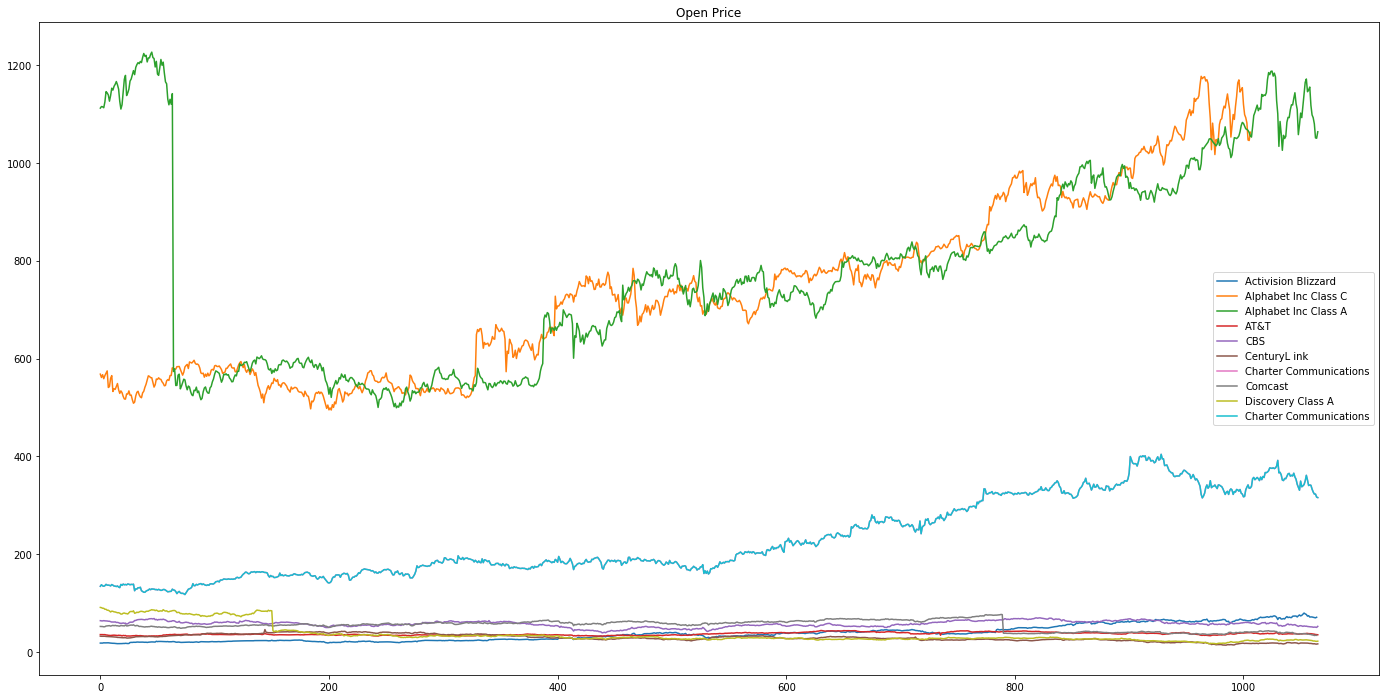

In [9]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from functools import reduce



Activision_Blizzard['Open'].plot(label='Activision Blizzard',figsize=(24,12),title='Open Price')
Alphabet_Inc_Class_C['Open'].plot(label='Alphabet Inc Class C')
Alphabet_Inc_Class_A['Open'].plot(label='Alphabet Inc Class A')
ATT['Open'].plot(label='AT&T')
CBS['Open'].plot(label='CBS')
CenturyLink['Open'].plot(label='CenturyL ink')
Charter_Communications['Open'].plot(label='Charter Communications')
Comcast['Open'].plot(label='Comcast')
Discovery_Class_A['Open'].plot(label='Discovery Class A ')
Charter_Communications['Open'].plot(label='Charter Communications')
plt.legend()








In [10]:
Activision_Blizzard['Volume'].argmax()

418

In [40]:
#Activision_Blizzard = Activision_Blizzard[['Date','Close']]
ATT

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2013-12-31,35.17,35.2800,34.9600,35.16,18425400.0,0.00,1.0,28.590317,28.679738,28.419604,28.582188,18425400.0
1,2014-01-02,35.24,35.2900,34.9500,34.95,20229900.0,0.00,1.0,28.647221,28.687867,28.411475,28.411475,20229900.0
2,2014-01-03,35.15,35.1600,34.6100,34.80,24618300.0,0.00,1.0,28.574059,28.582188,28.135083,28.289537,24618300.0
3,2014-01-06,35.01,35.0500,34.8000,34.96,20791500.0,0.00,1.0,28.460250,28.492767,28.289537,28.419604,20791500.0
4,2014-01-07,35.13,35.1500,34.9050,34.95,25725100.0,0.00,1.0,28.557800,28.574059,28.374894,28.411475,25725100.0
5,2014-01-08,34.45,34.6000,34.1000,34.24,37745500.0,0.46,1.0,28.381252,28.504828,28.092908,28.208246,37745500.0
6,2014-01-09,34.24,34.2400,33.5100,33.54,36082200.0,0.00,1.0,28.208246,28.208246,27.606843,27.631558,36082200.0
7,2014-01-10,33.74,33.8100,33.5100,33.62,25342100.0,0.00,1.0,27.796326,27.853995,27.606843,27.697465,25342100.0
8,2014-01-13,33.59,33.6500,33.2000,33.30,29281000.0,0.00,1.0,27.672750,27.722181,27.351453,27.433837,29281000.0
9,2014-01-14,33.33,33.5500,33.1600,33.48,22883600.0,0.00,1.0,27.458552,27.639797,27.318500,27.582128,22883600.0


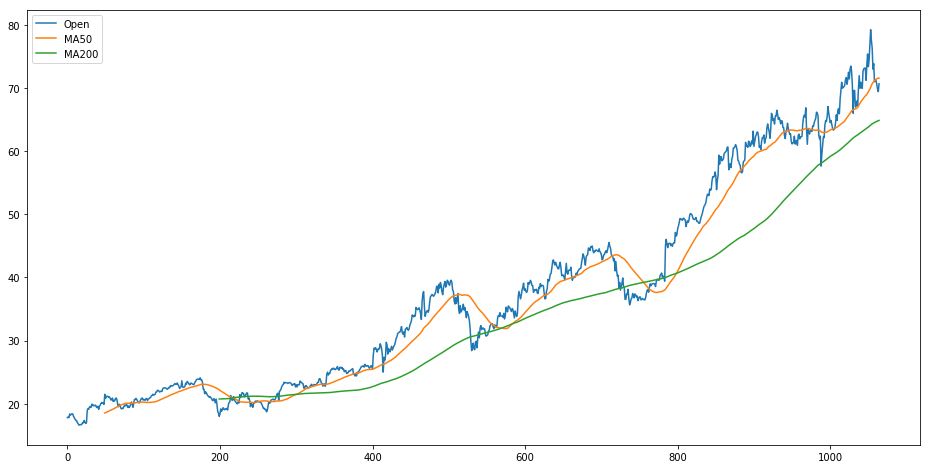

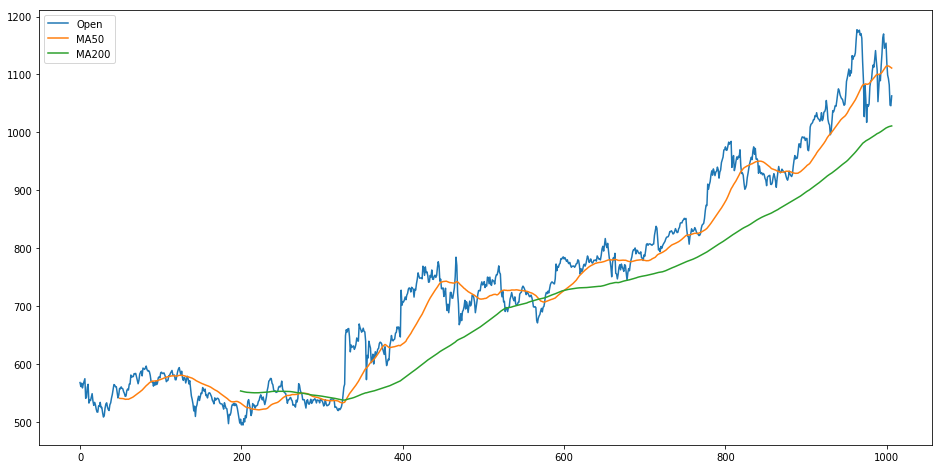

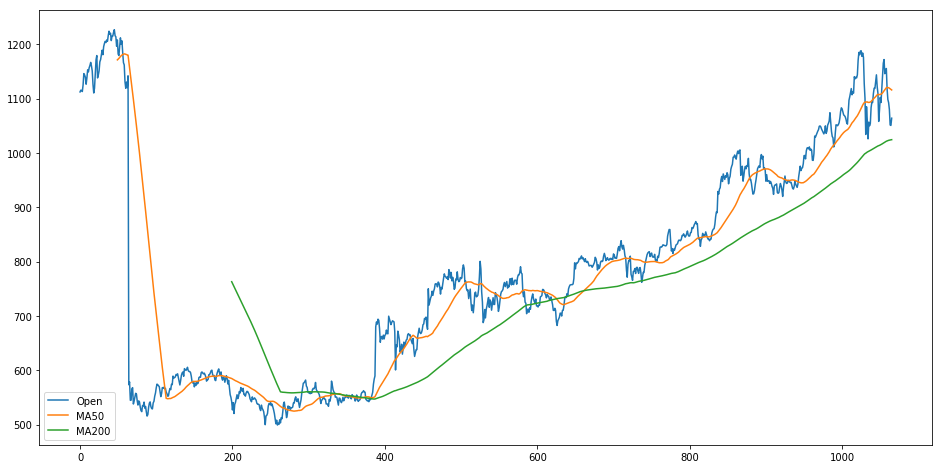

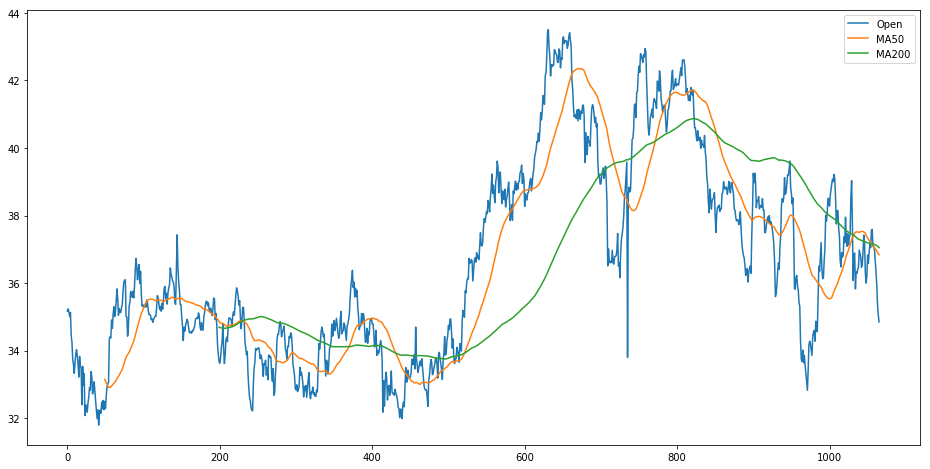

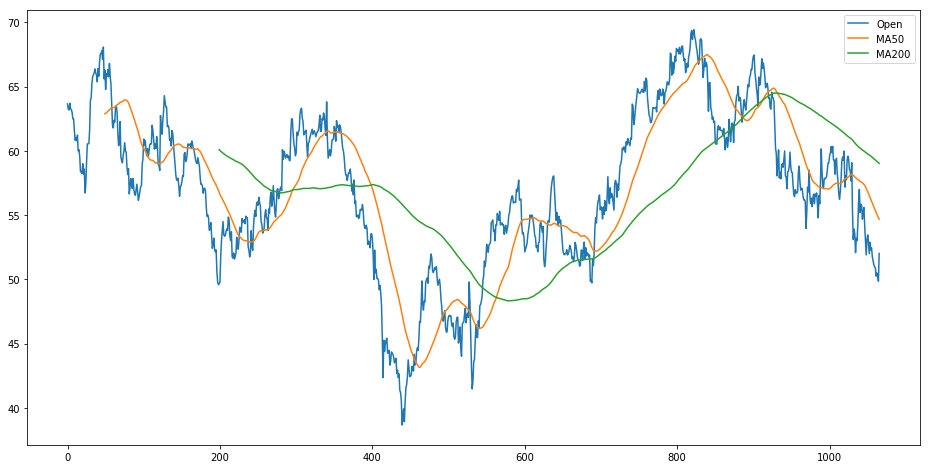

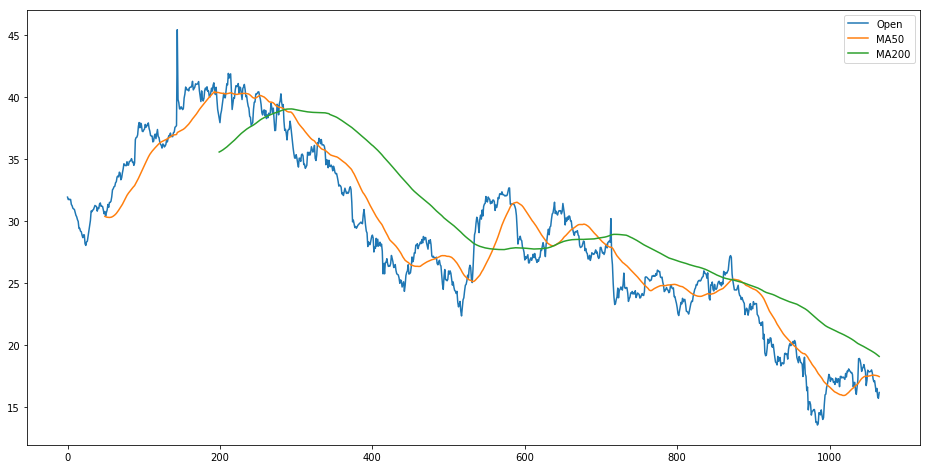

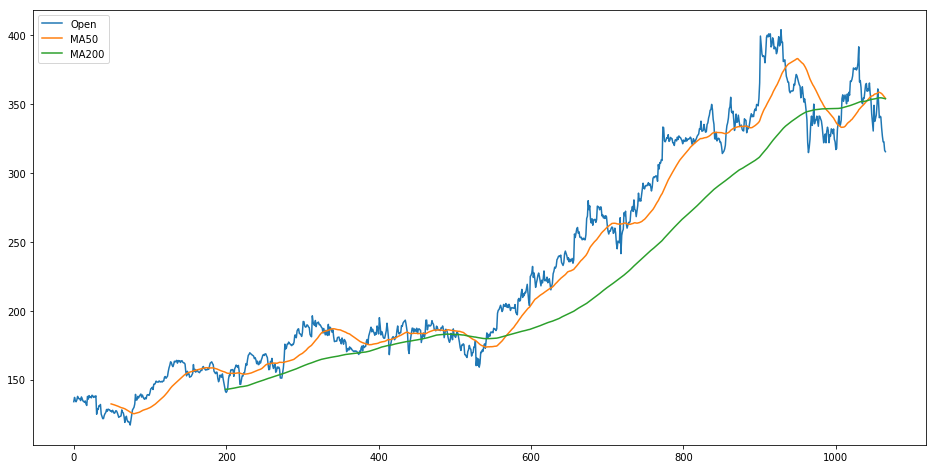

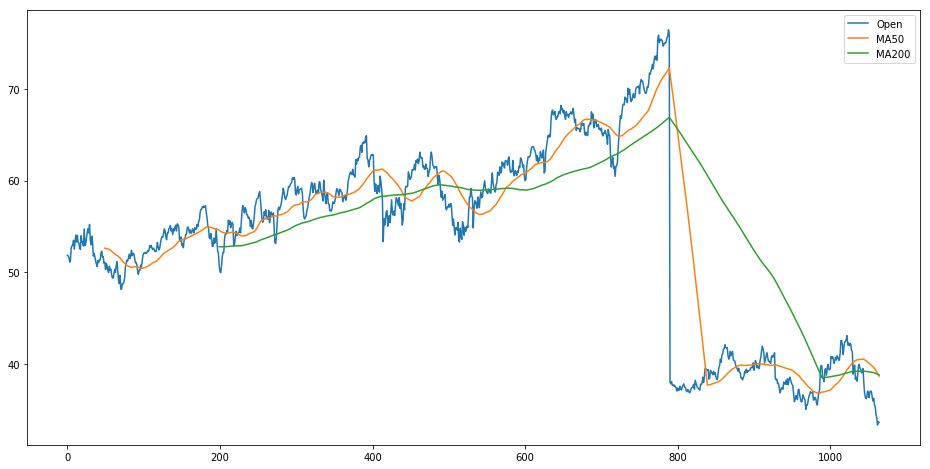

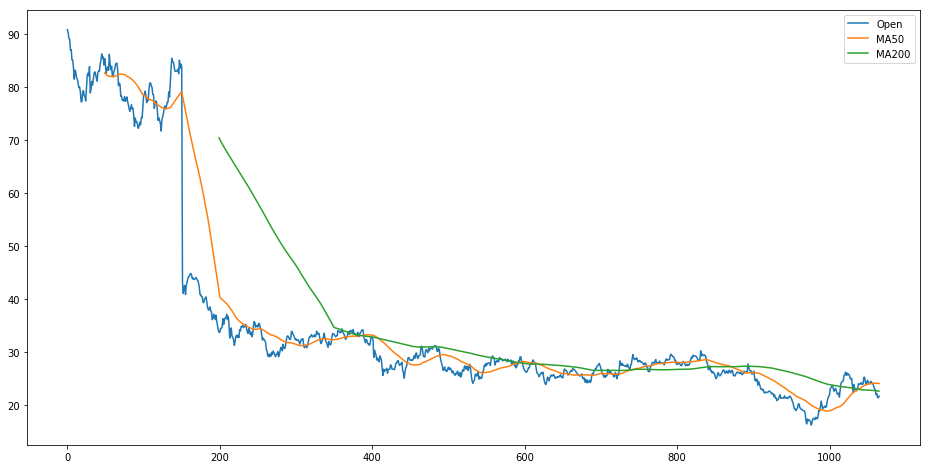

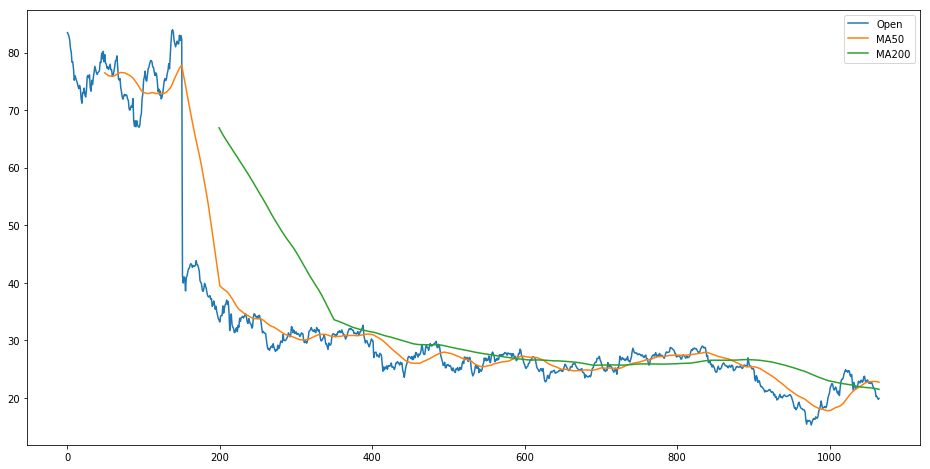

In [11]:
Activision_Blizzard['MA50'] = Activision_Blizzard['Open'].rolling(50).mean()
Activision_Blizzard['MA200'] = Activision_Blizzard['Open'].rolling(200).mean()
Activision_Blizzard[['Open','MA50','MA200']].plot(label='Activision Blizzard',figsize=(16,8))

Alphabet_Inc_Class_C['MA50'] = Alphabet_Inc_Class_C['Open'].rolling(50).mean()
Alphabet_Inc_Class_C['MA200'] = Alphabet_Inc_Class_C['Open'].rolling(200).mean()
Alphabet_Inc_Class_C[['Open','MA50','MA200']].plot(label='Alphabet Inc Class C',figsize=(16,8))

Alphabet_Inc_Class_A['MA50'] = Alphabet_Inc_Class_A['Open'].rolling(50).mean()
Alphabet_Inc_Class_A['MA200'] = Alphabet_Inc_Class_A['Open'].rolling(200).mean()
Alphabet_Inc_Class_A[['Open','MA50','MA200']].plot(label='Alphabet Inc Class A',figsize=(16,8))

ATT['MA50'] = ATT['Open'].rolling(50).mean()
ATT['MA200'] = ATT['Open'].rolling(200).mean()
ATT[['Open','MA50','MA200']].plot(label='AT&T',figsize=(16,8))

CBS['MA50'] = CBS['Open'].rolling(50).mean()
CBS['MA200'] = CBS['Open'].rolling(200).mean()
CBS[['Open','MA50','MA200']].plot(label='CBS',figsize=(16,8))

CenturyLink['MA50'] = CenturyLink['Open'].rolling(50).mean()
CenturyLink['MA200'] = CenturyLink['Open'].rolling(200).mean()
CenturyLink[['Open','MA50','MA200']].plot(label='Century Link',figsize=(16,8))

Charter_Communications['MA50'] = Charter_Communications['Open'].rolling(50).mean()
Charter_Communications['MA200'] = Charter_Communications['Open'].rolling(200).mean()
Charter_Communications[['Open','MA50','MA200']].plot(label='Charter Communications',figsize=(16,8))

Comcast['MA50'] = Comcast['Open'].rolling(50).mean()
Comcast['MA200'] = Comcast['Open'].rolling(200).mean()
Comcast[['Open','MA50','MA200']].plot(label='Comcast',figsize=(16,8))



Discovery_Class_A['MA50'] = Discovery_Class_A['Open'].rolling(50).mean()
Discovery_Class_A['MA200'] = Discovery_Class_A['Open'].rolling(200).mean()
Discovery_Class_A[['Open','MA50','MA200']].plot(label='Discovery Class A',figsize=(16,8))

Discovery_Class_C['MA50'] = Discovery_Class_C['Open'].rolling(50).mean()
Discovery_Class_C['MA200'] = Discovery_Class_C['Open'].rolling(200).mean()
Discovery_Class_C[['Open','MA50','MA200']].plot(label='Discovery Class C',figsize=(16,8))